In [40]:
#import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.templates.default = 'plotly_white'
import geopandas as gpd
from geopy.geocoders import Nominatim

In [25]:
#Load the dataset
df = pd.read_csv('housing_data.csv')

In [4]:
df.head()

Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0           0       SC60       RL           65     8450   Pave   NaN      Reg   
1           1       SC20       RL           80     9600   Pave   NaN      Reg   
2           2       SC60       RL           68    11250   Pave   NaN      IR1   
3           3       SC70       RL           60     9550   Pave   NaN      IR1   
4           4       SC60       RL           84    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0     No    No          No       0    Feb   
1         Lvl    AllPub  ...        0     No    No          No       0    May   
2         Lvl    AllPub  ...        0     No    No          No       0    Sep   
3         Lvl    AllPub  ...        0     No    No          No       0    Feb   
4         Lvl    AllPub  ...        0     No    No          No       0    Dec   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
#Check if there is null value in the dataset
df.isnull().sum()

Unnamed: 0       0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# dropped columns are Id, Alley, PoolQC, Fence, MiscFeature
df2 = df[[column for column in df if df[column].count() / len(df) >= 0.3]]
del df2['Fence']
print("List of dropped columns:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')
df = df2

List of dropped columns: Alley, Fence, 



In [8]:
df.shape
print(f"The total number of rows : {df.shape[0]}   Total number of columns : {df.shape[1]}")

The total number of rows : 1460   Total number of columns : 79


In [9]:
#get overall statistics about the dataset
df.describe()

Unnamed: 0  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean    729.500000    57.623288   10516.828082     6.099315     5.575342   
std     421.610009    34.664304    9981.264932     1.382997     1.112799   
min       0.000000     0.000000    1300.000000     1.000000     1.000000   
25%     364.750000    42.000000    7553.500000     5.000000     5.000000   
50%     729.500000    63.000000    9478.500000     6.000000     5.000000   
75%    1094.250000    79.000000   11601.500000     7.000000     6.000000   
max    1459.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.117123   443.639726    46.549315  ...   
std      30.202904     20.645407   180.731373   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   164.250000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    472.980137    94.244521    46.660274      21.954110     3.409589   
std     213.804841   125.338794    66.256028      61.119149    29.317331   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     334.500000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    25.000000       0.000000     0.000000   
75%     576.000000   168.000000    68.000000       0.000000     0.000000   
max    1418.000000   857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       YrSold      SalePrice  
count  1460.000000  1460.000000   1460.000000  1460.000000    1460.000000  
mean     15.060959     2.758904     43.489041  2007.815753  180921.195890  
std      55.757415    40.177307    496.123024     1.328095   79442.502883  
min       0.000000     0.000000      0.000000  2006.000000   34900.000000  
25%       0.000000     0.000000      0.000000  2007.000000  129975.000000  
50%       0.000000     0.000000      0.000000  2008.000000  163000.000000  
75%       0.000000     0.000000      0.000000  2009.000000  214000.000000  
max     480.000000   738.000000  15500.000000  2010.000000  755000.000000  

[8 rows x 36 columns]

<Axes: xlabel='SalePrice', ylabel='Count'>

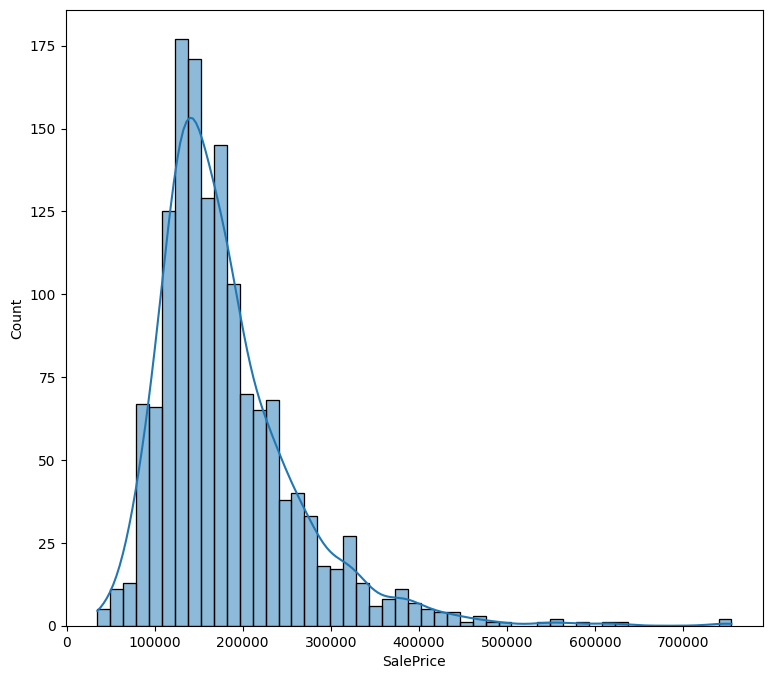

In [10]:
plt.figure(figsize=(9, 8))
sns.histplot(df['SalePrice'], kde=True)

**Observations:**
 - There are 36 numerical columns reported and 45 categorical columns are reported
 - **SalePrice:**
   - The Q1 ranges from 34900 to 129975 i.e, The first 25 % points are reported in the range of 34900 to 129975.
   - The Q2 ranges from 129975 to 163000 i.e, The second 50 % points are reported in the range of 129975 to 163000.
   - The Q3 ranges from 163000 to 214000 i.e, The third 75 % points are reported in the range of 163000 to 214000.
   - The Q4 ranges from 214000 to 755000 i.e, The fourth max % points are reported in the range of 214000 to 755000.
   - The Inter-quartile range calculated for SalePrice 214000 - 129975 = 84025


   **In the given information, it is observed that the distribution of the prices (SalePrice) is skewed to the right, and there are outliers present, particularly those exceeding approximately $500,000.**  

## **Univariate Analysis**

In [11]:
#Before doing analysis, seprate numerical and categorical columns
def seprate_categorical_and_numerical(df):
    categorical_list,numerical_list = [],[]
    for col in df.columns.tolist():
      print("*"*50)
      print(f"Data Type for {col} is {df[col].dtypes}")
      if df[col].dtypes == "object":
          categorical_list.append(col)
      else:    
        numerical_list.append(col)
    return     categorical_list, numerical_list

In [12]:
categorical_list,numerical_list = seprate_categorical_and_numerical(df)

**************************************************
Data Type for Unnamed: 0 is int64
**************************************************
Data Type for MSSubClass is object
**************************************************
Data Type for MSZoning is object
**************************************************
Data Type for LotFrontage is int64
**************************************************
Data Type for LotArea is int64
**************************************************
Data Type for Street is object
**************************************************
Data Type for LotShape is object
**************************************************
Data Type for LandContour is object
**************************************************
Data Type for Utilities is object
**************************************************
Data Type for LotConfig is object
**************************************************
Data Type for LandSlope is object
**************************************************
Data Type for Neig

In [13]:
numerical_list

['Unnamed: 0',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'YrSold',
 'SalePrice']

In [14]:
df.describe().columns

Index(['Unnamed: 0', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YrSold', 'SalePrice'],
      dtype='object')

(array([  2.,   3.,  20., 116., 397., 374., 319., 168.,  43.,  18.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

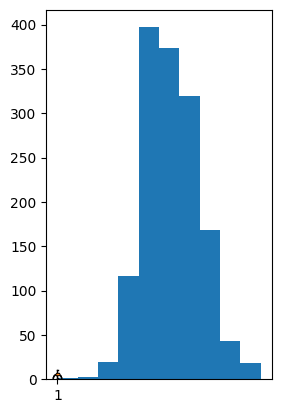

In [15]:
plt.subplot(1,2,1)
plt.boxplot(df['OverallQual'])
plt.subplot(1,2,1)
plt.hist(df['OverallQual'])

**************************************************
Logs for Unnamed: 0
IQR for Unnamed: 0 is inter_quartile_range


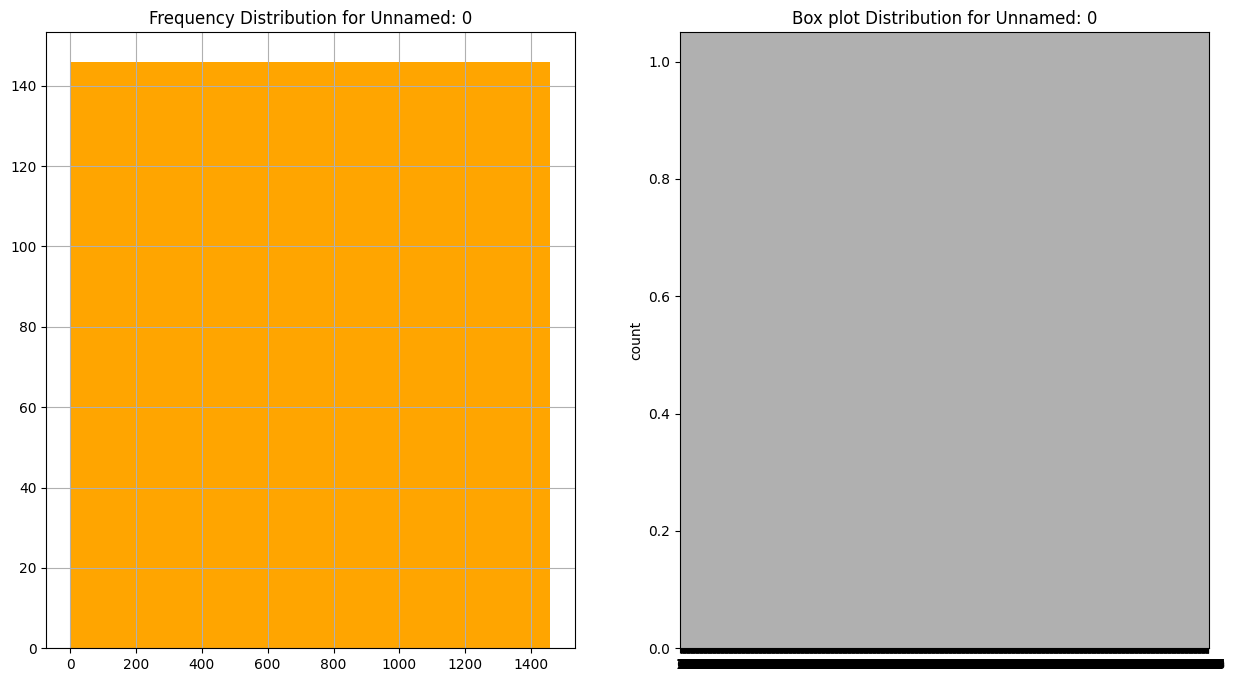

**************************************************
**************************************************
Logs for LotFrontage
IQR for LotFrontage is inter_quartile_range


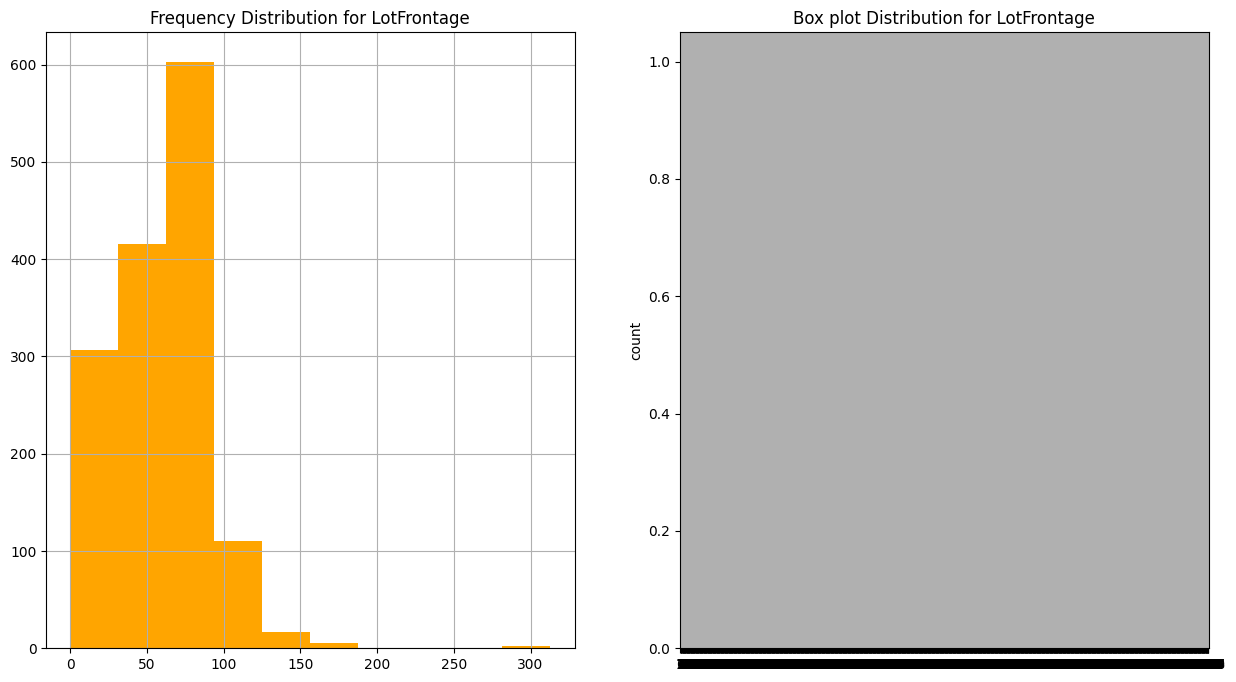

**************************************************
**************************************************
Logs for LotArea
IQR for LotArea is inter_quartile_range


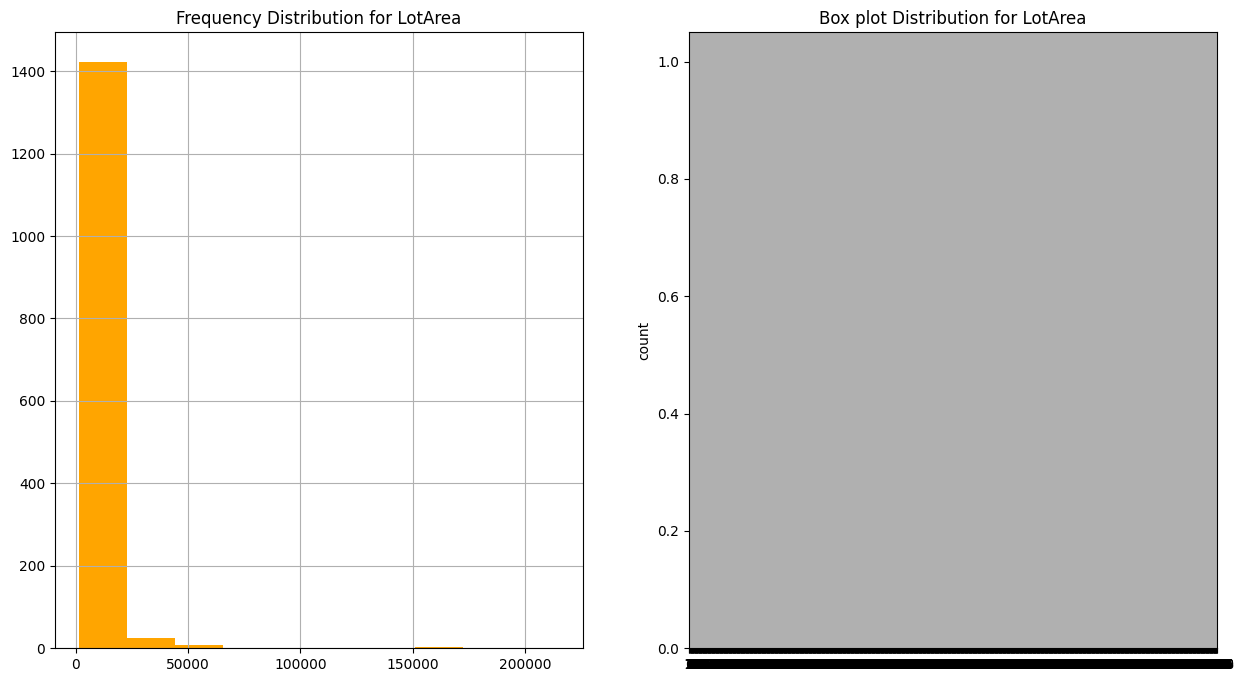

**************************************************
**************************************************
Logs for OverallQual
IQR for OverallQual is inter_quartile_range


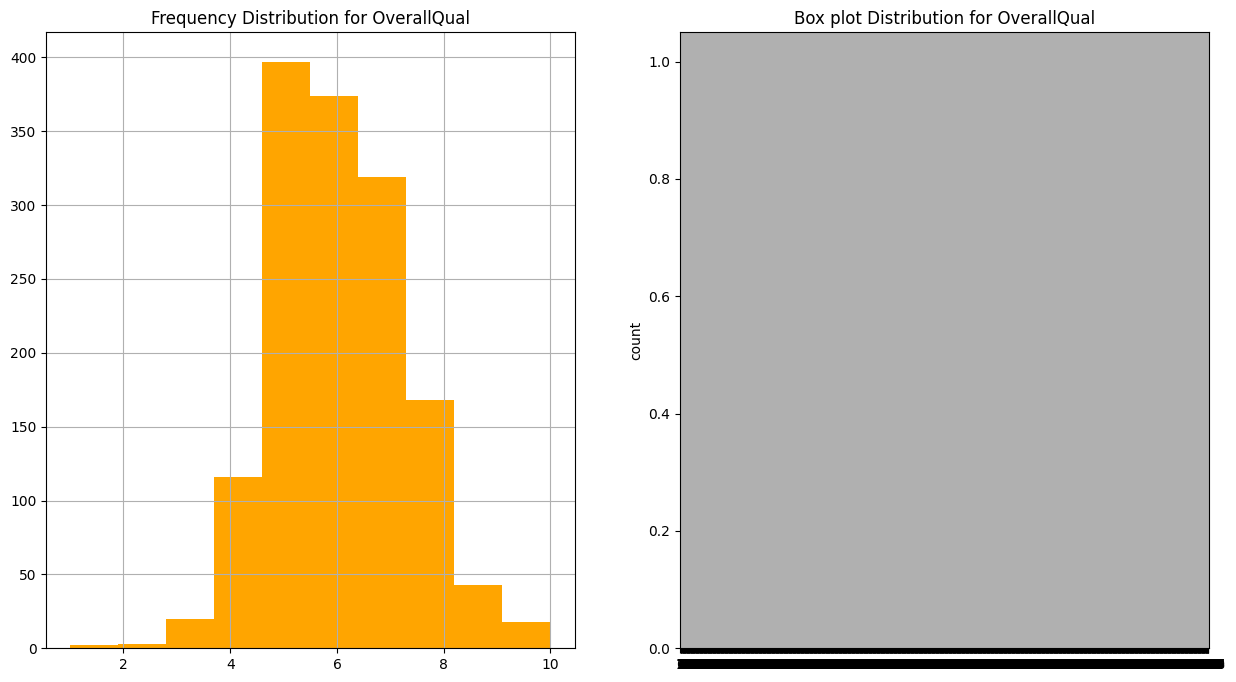

**************************************************
**************************************************
Logs for OverallCond
IQR for OverallCond is inter_quartile_range


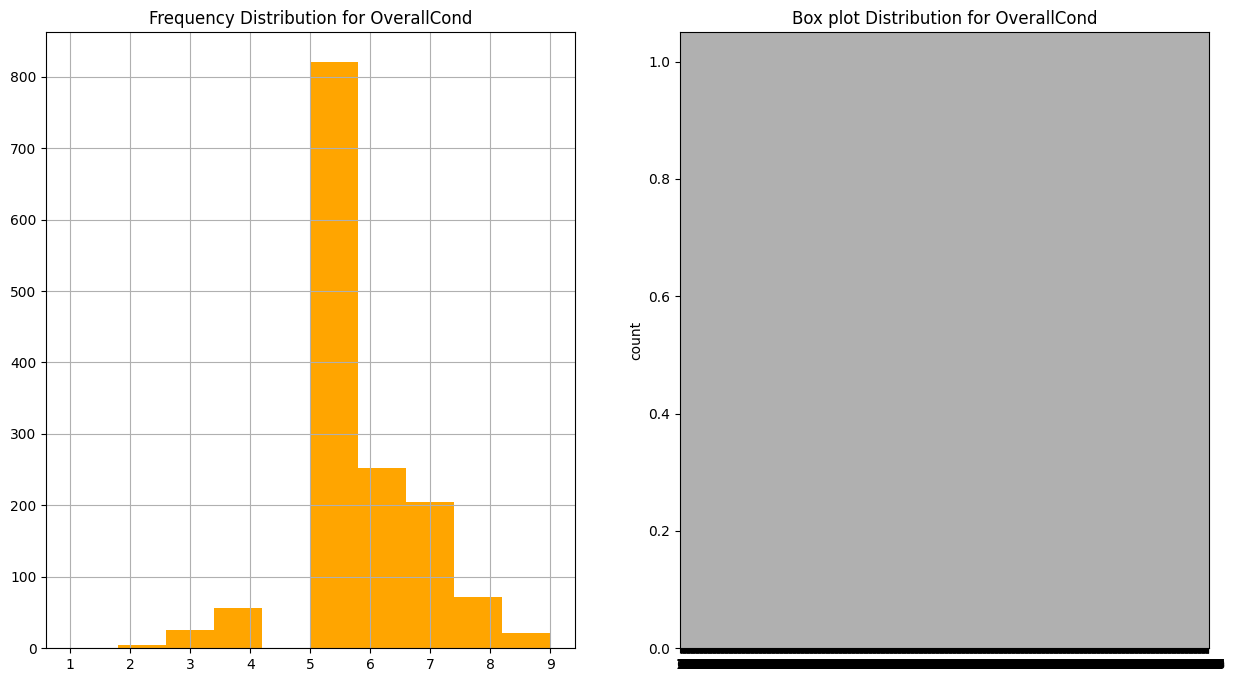

**************************************************
**************************************************
Logs for YearBuilt
IQR for YearBuilt is inter_quartile_range


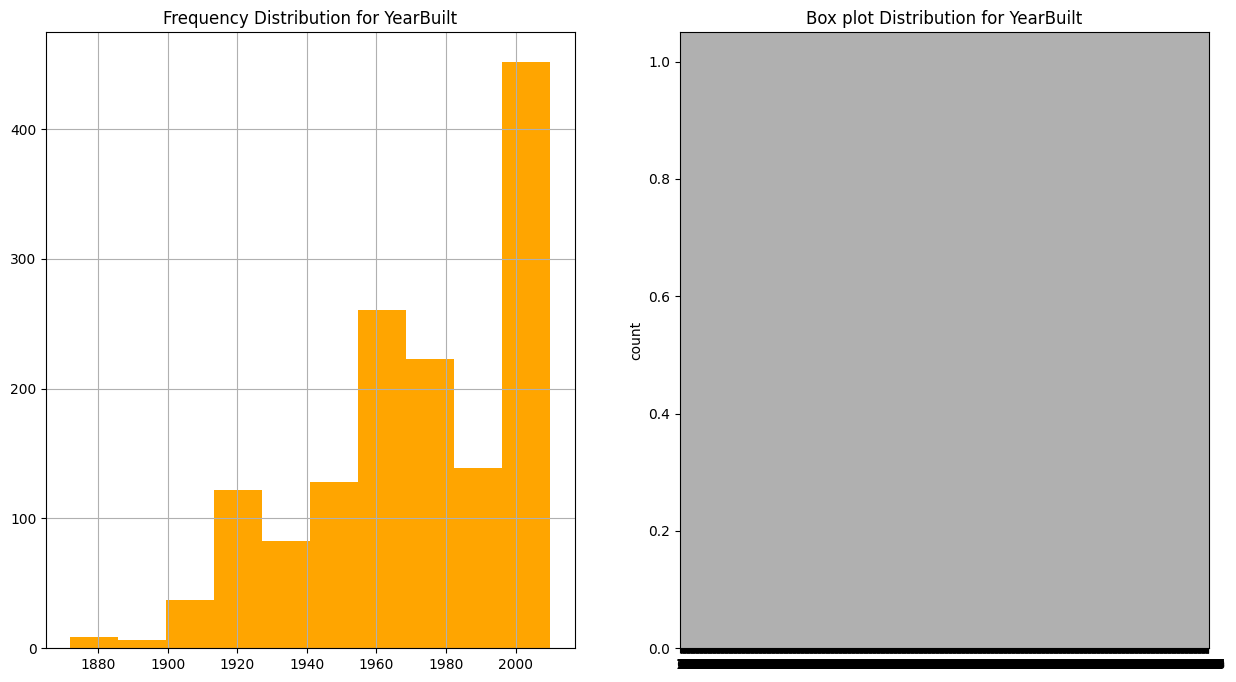

**************************************************
**************************************************
Logs for YearRemodAdd
IQR for YearRemodAdd is inter_quartile_range


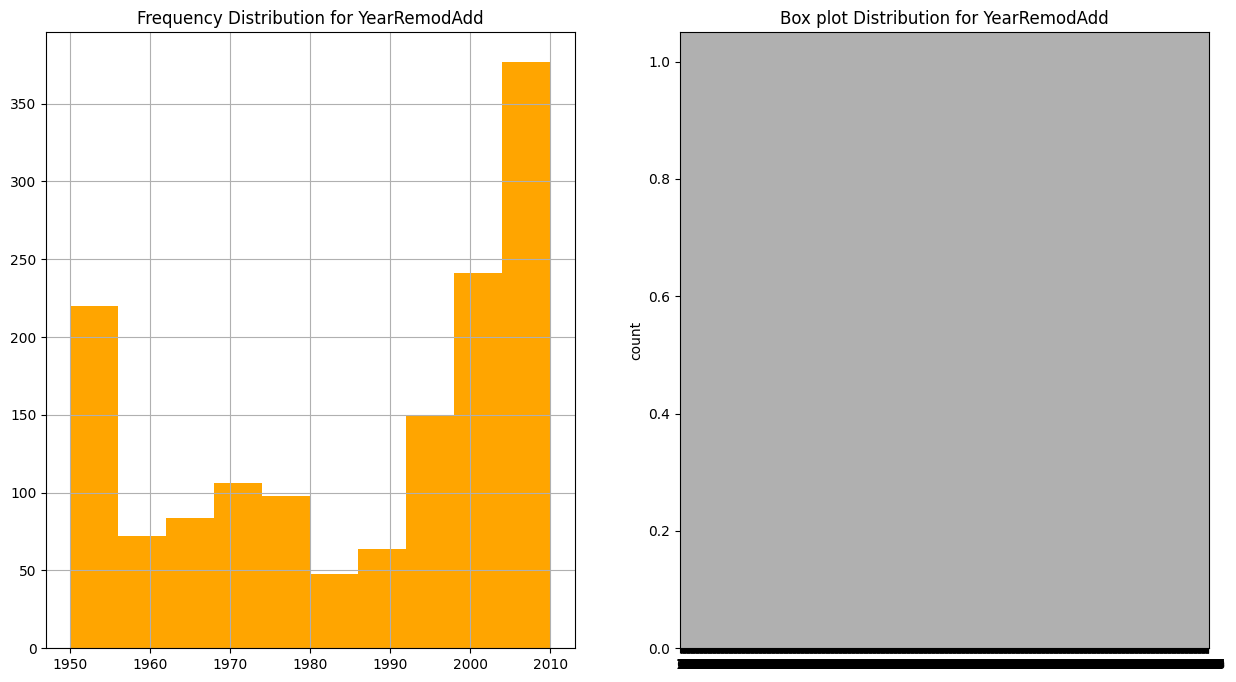

**************************************************
**************************************************
Logs for MasVnrArea
IQR for MasVnrArea is inter_quartile_range


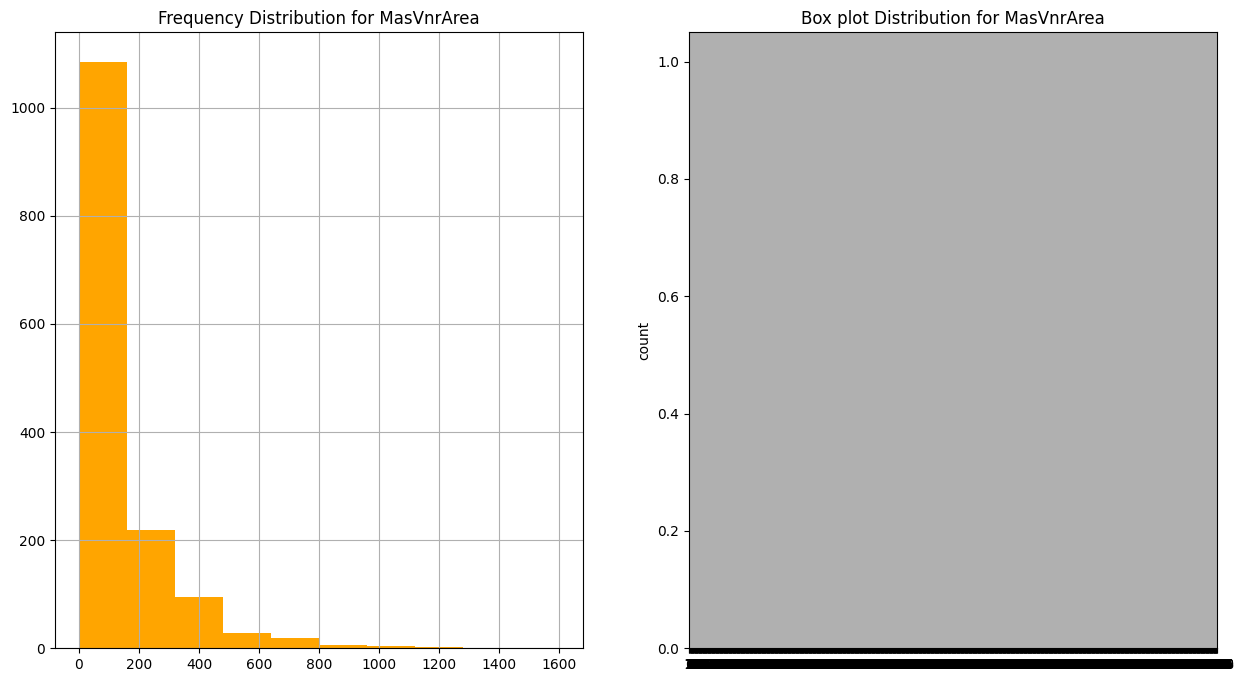

**************************************************
**************************************************
Logs for BsmtFinSF1
IQR for BsmtFinSF1 is inter_quartile_range


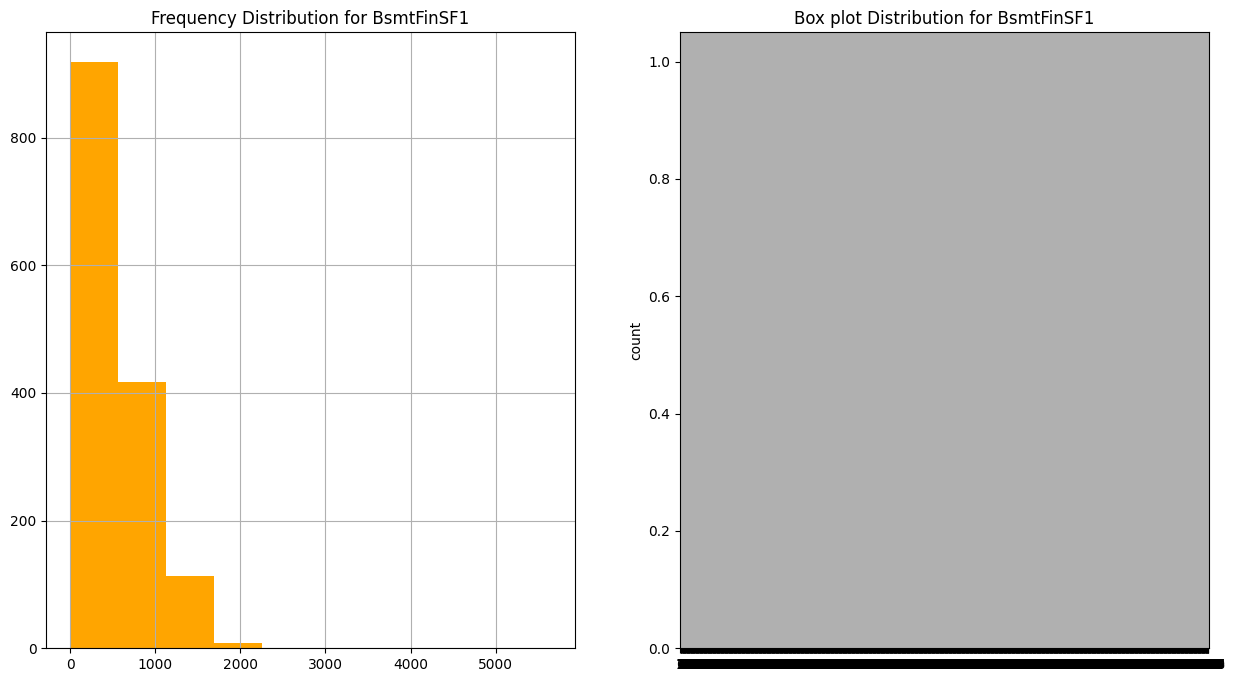

**************************************************
**************************************************
Logs for BsmtFinSF2
IQR for BsmtFinSF2 is inter_quartile_range


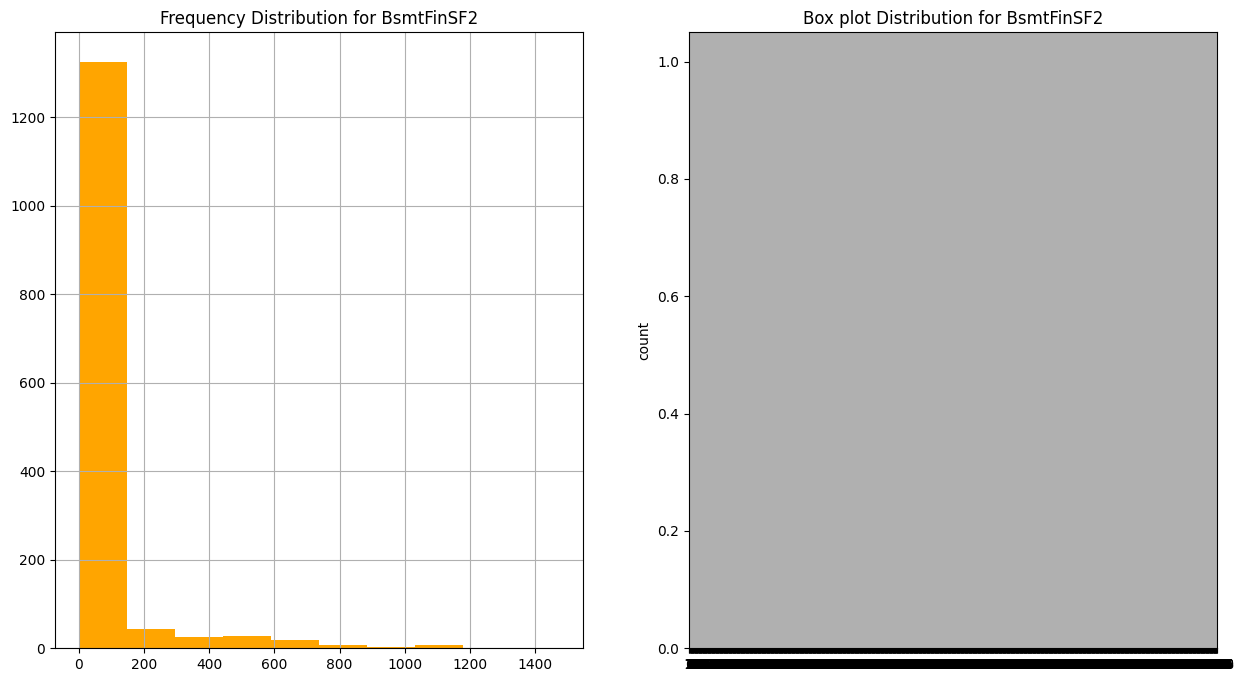

**************************************************
**************************************************
Logs for BsmtUnfSF
IQR for BsmtUnfSF is inter_quartile_range


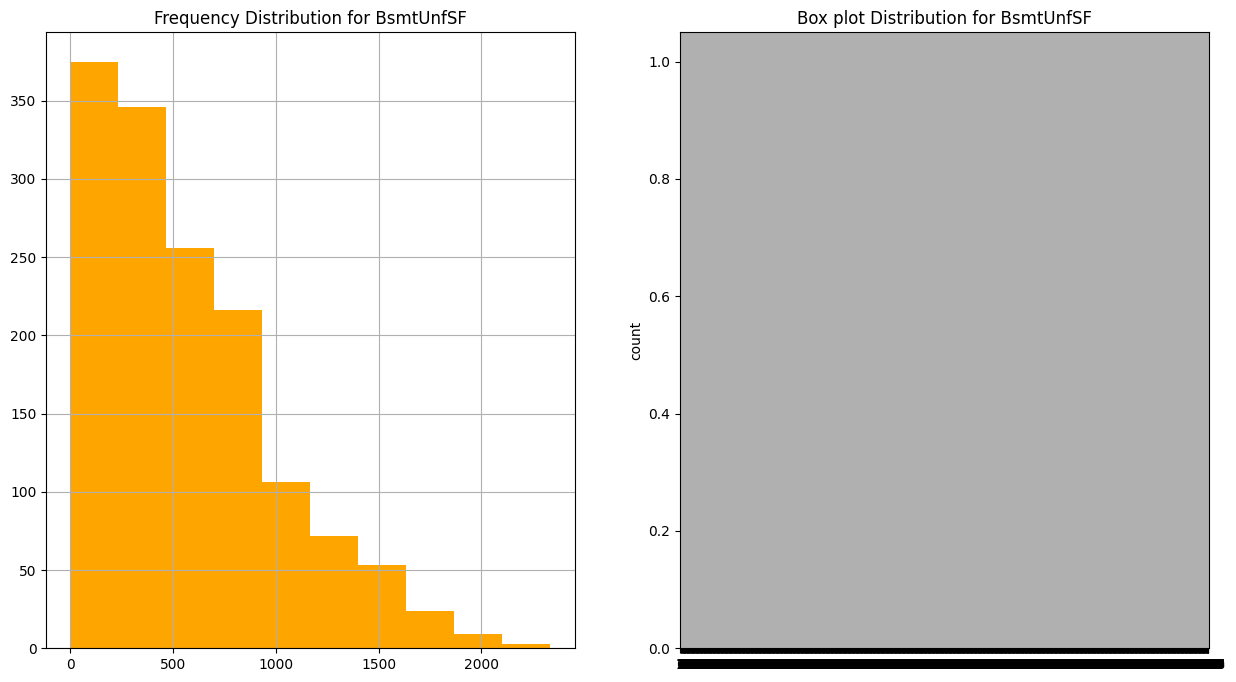

**************************************************
**************************************************
Logs for TotalBsmtSF
IQR for TotalBsmtSF is inter_quartile_range


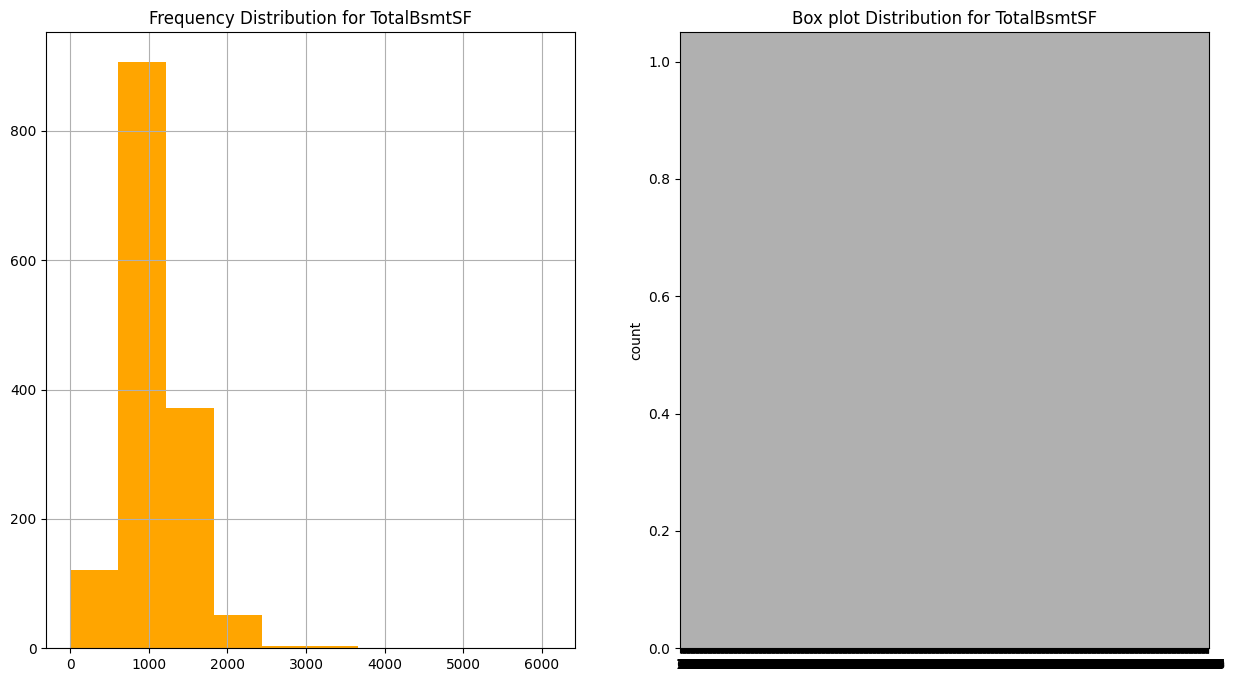

**************************************************
**************************************************
Logs for 1stFlrSF
IQR for 1stFlrSF is inter_quartile_range


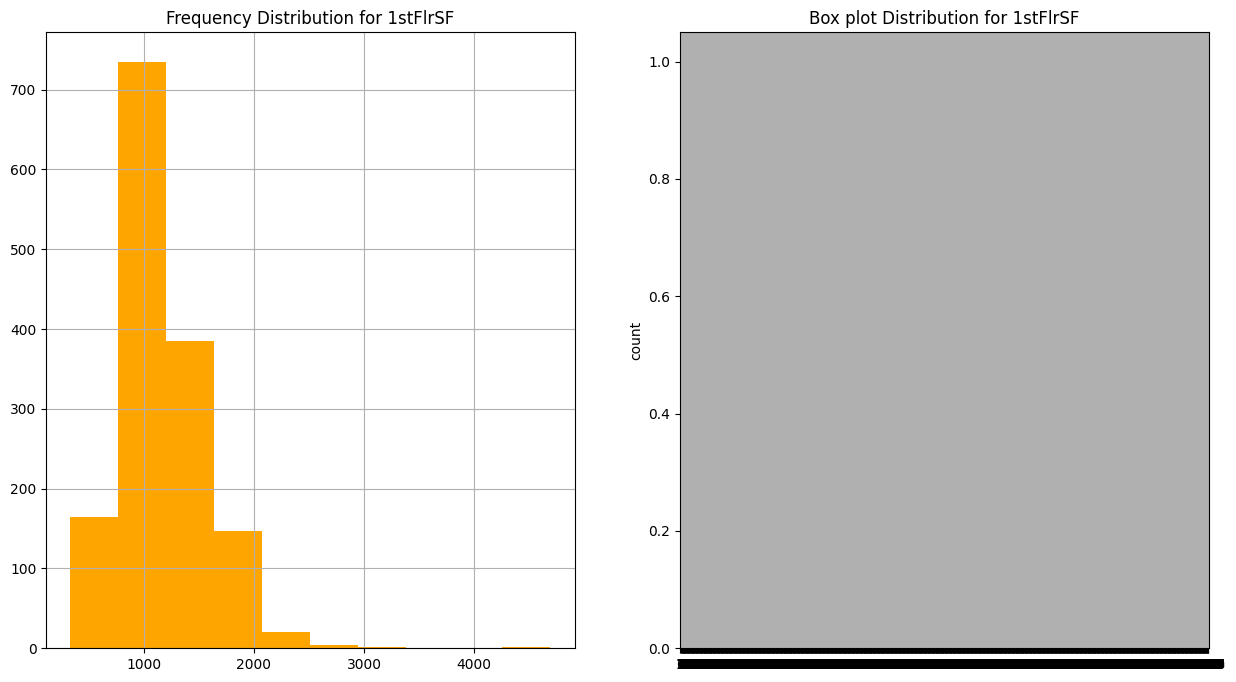

**************************************************
**************************************************
Logs for 2ndFlrSF
IQR for 2ndFlrSF is inter_quartile_range


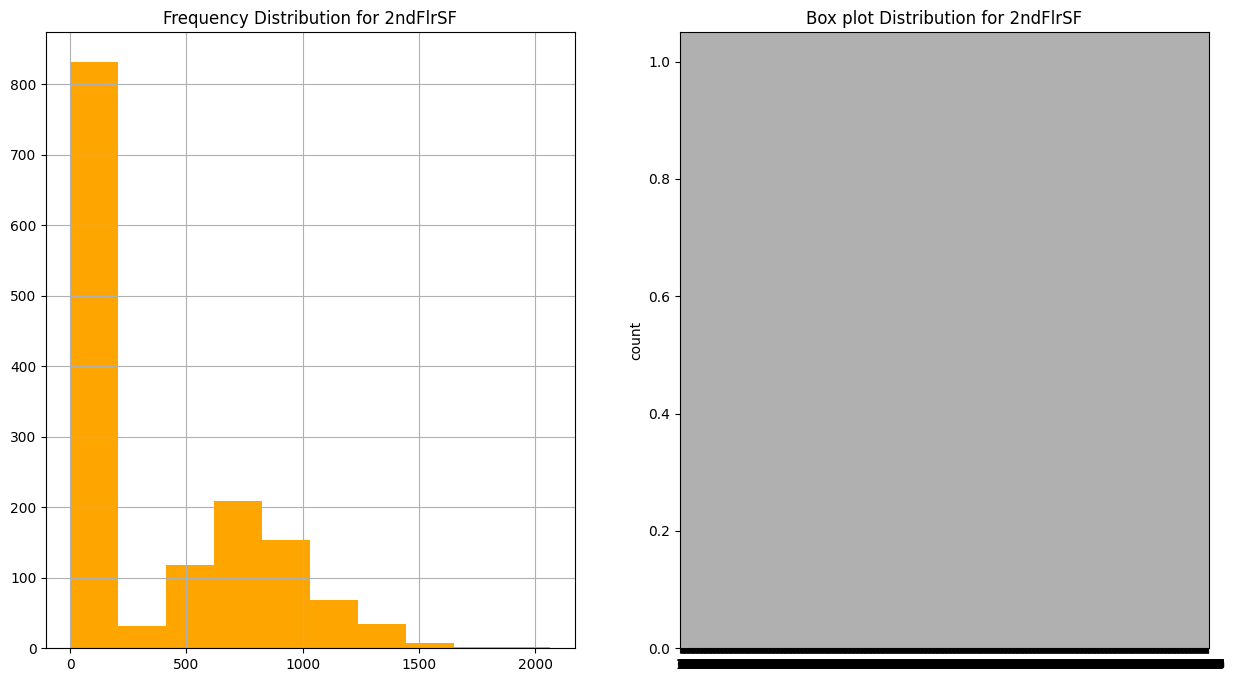

**************************************************
**************************************************
Logs for LowQualFinSF
IQR for LowQualFinSF is inter_quartile_range


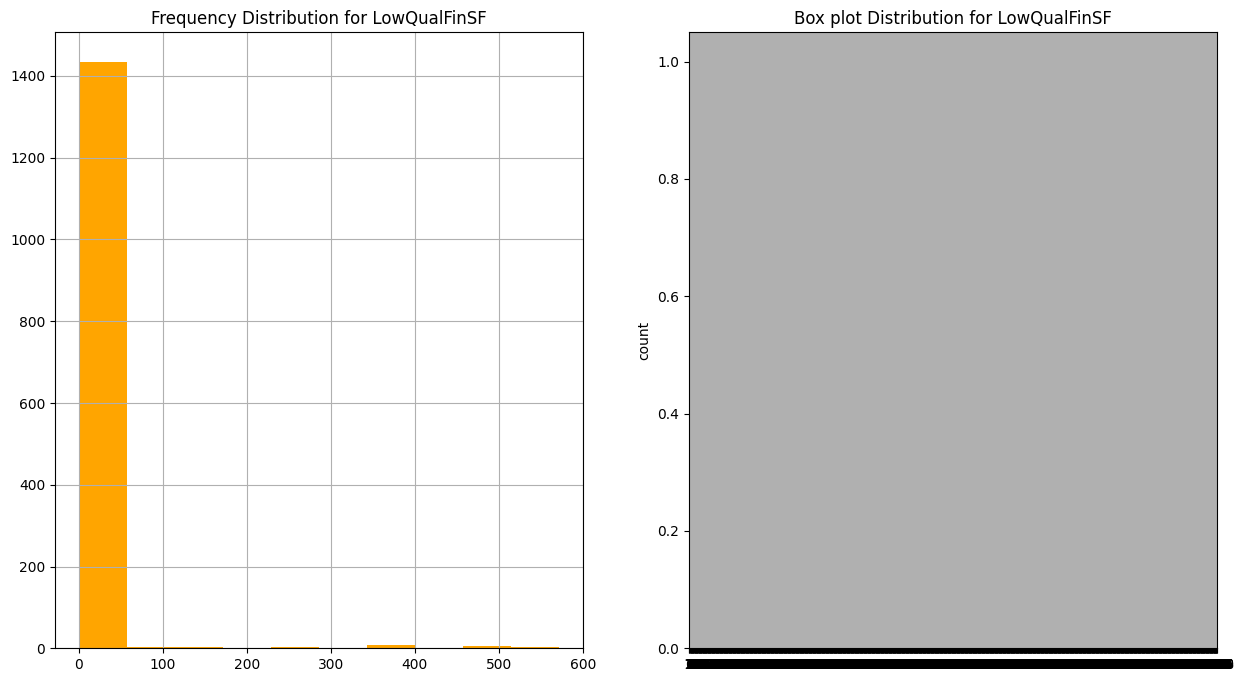

**************************************************
**************************************************
Logs for GrLivArea
IQR for GrLivArea is inter_quartile_range


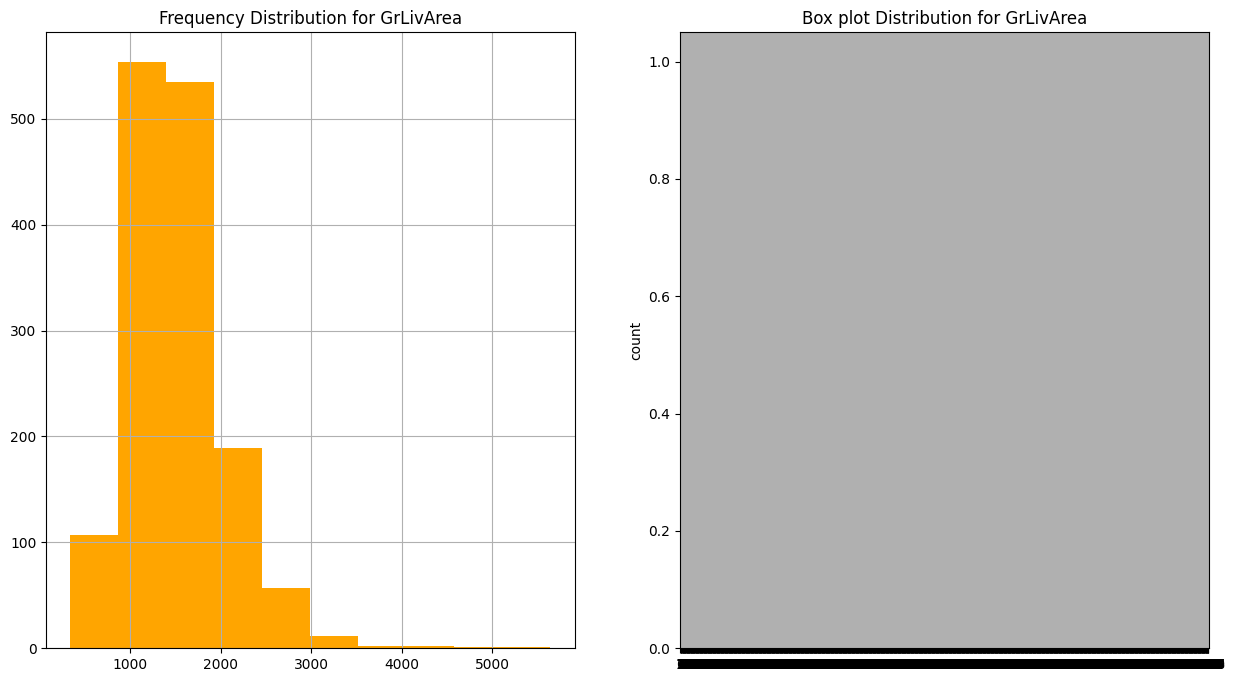

**************************************************
**************************************************
Logs for BsmtFullBath
IQR for BsmtFullBath is inter_quartile_range


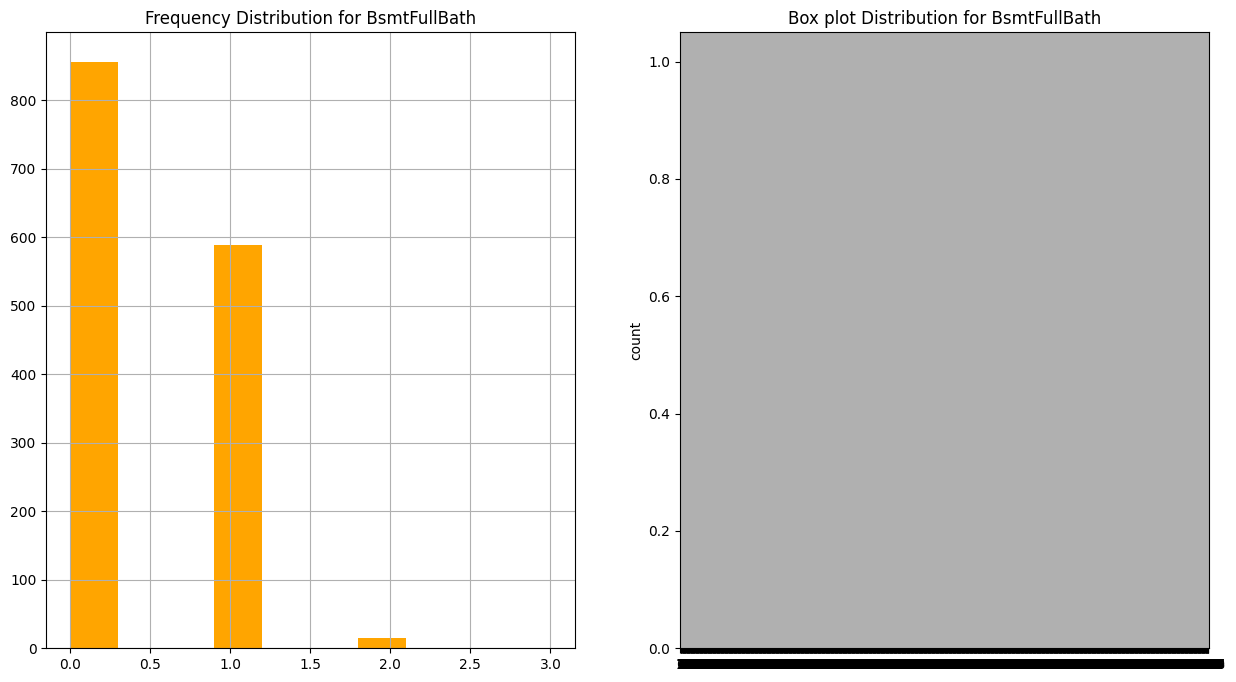

**************************************************
**************************************************
Logs for BsmtHalfBath
IQR for BsmtHalfBath is inter_quartile_range


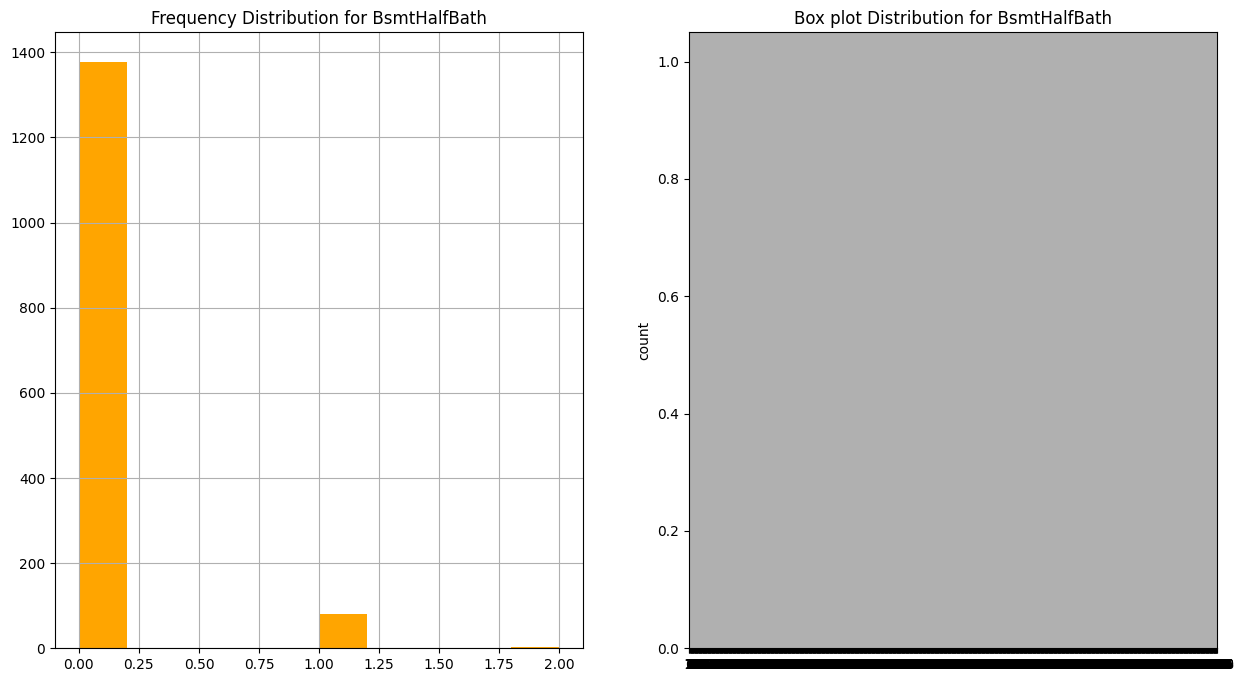

**************************************************
**************************************************
Logs for FullBath
IQR for FullBath is inter_quartile_range


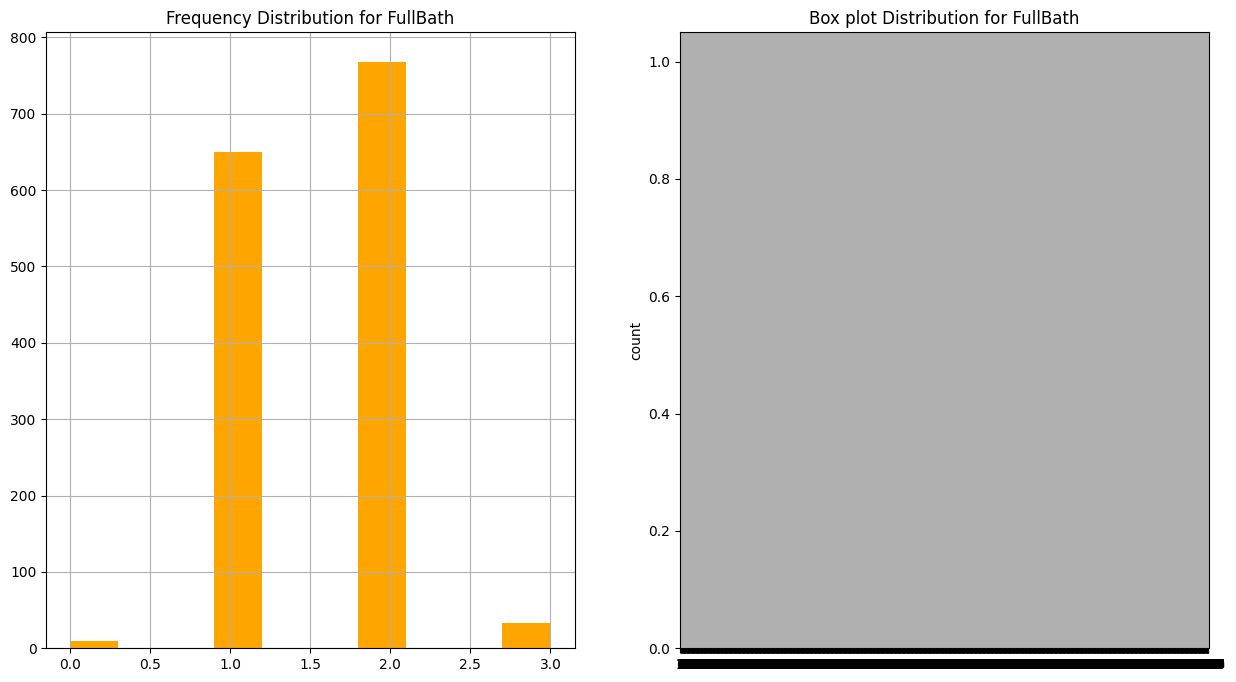

**************************************************
**************************************************
Logs for HalfBath
IQR for HalfBath is inter_quartile_range


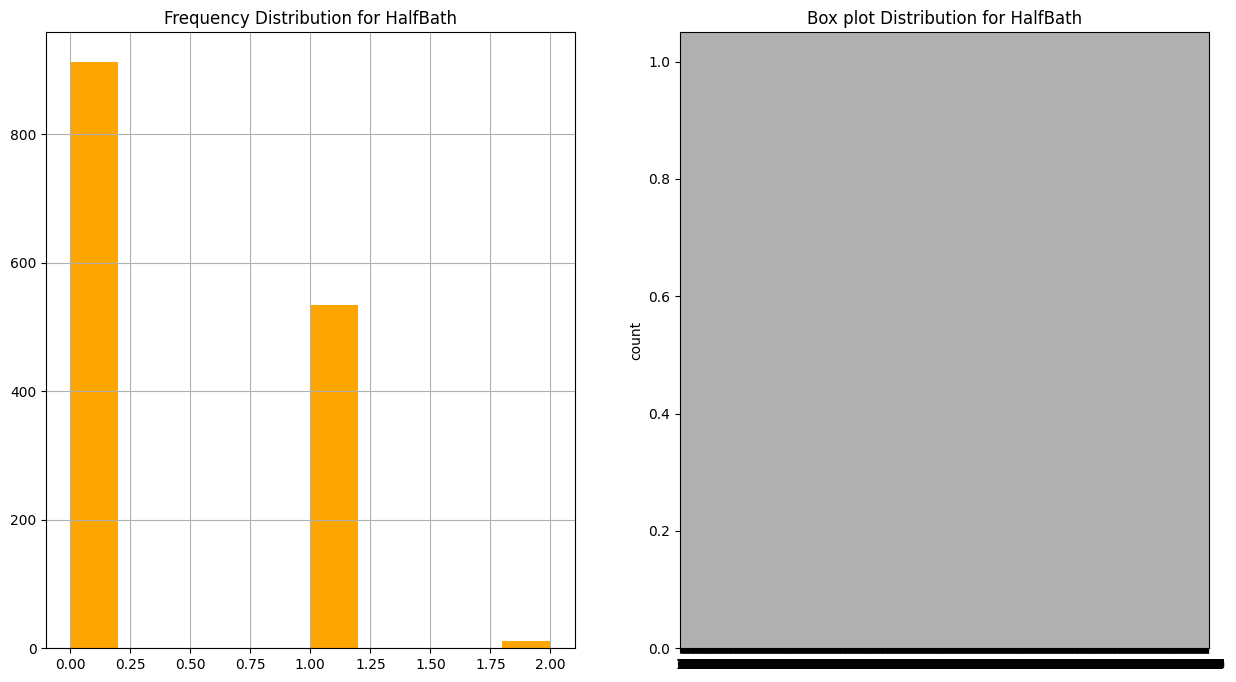

**************************************************
**************************************************
Logs for BedroomAbvGr
IQR for BedroomAbvGr is inter_quartile_range


In [16]:
for col in numerical_list:
    print("*"*50)
    print(f"Logs for {col}")
    q1 =df.describe()[col]["25%"]
    q2 =df.describe()[col]["50%"]
    q3 =df.describe()[col]["75%"]
    q4 =df.describe()[col]["max"]
    inter_quartile_range = q3 - q1
    print(f"IQR for {col} is inter_quartile_range")
    plt.figure(figsize= [15,8])
    plt.subplot(1,2,1)
    plt.hist(df[col], color='orange')
    plt.grid()
    plt.title(f"Frequency Distribution for {col}")
    plt.subplot(1,2,2)
    sns.countplot(df[col], color='darkblue')
    plt.grid()
    plt.title(f"Box plot Distribution for {col}")
    plt.savefig(f"{col}_univariate_analysis.PNG")
    plt.show()
    print("*"*50)

In [ ]:
categorical_list =['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'SaleType',
 'SaleCondition']

**************************************************
Logs for MSSubClass


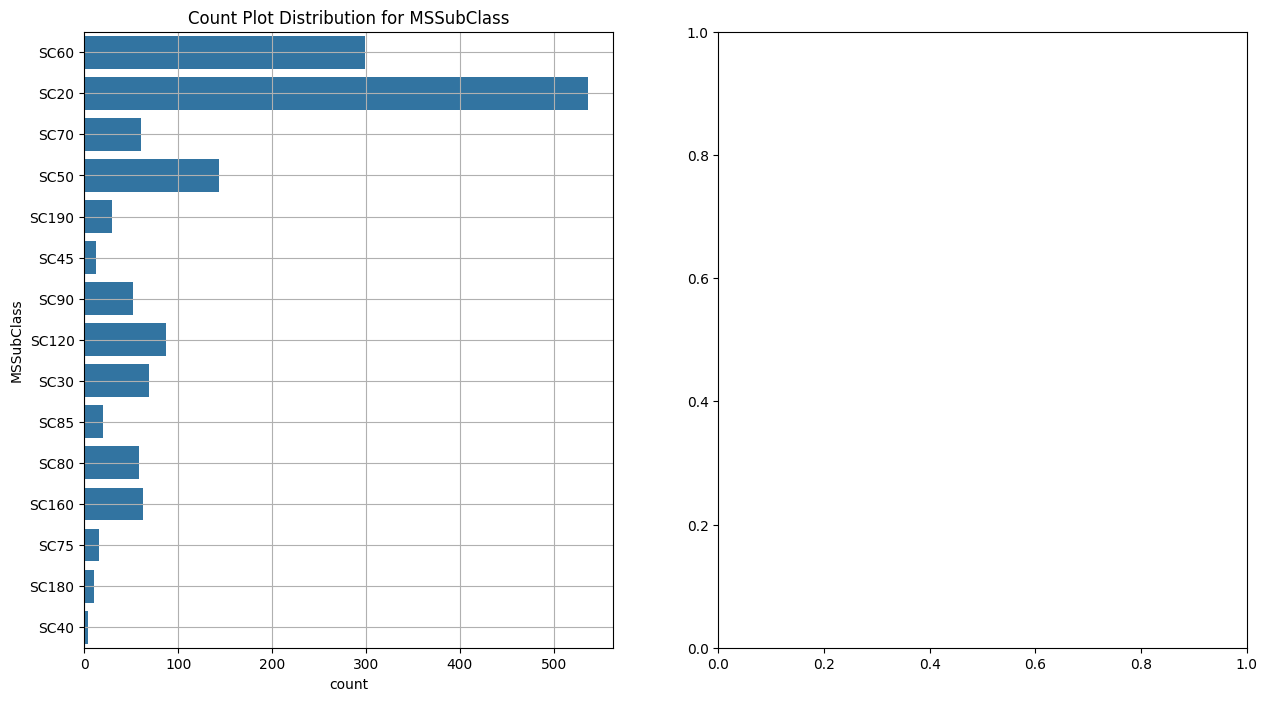

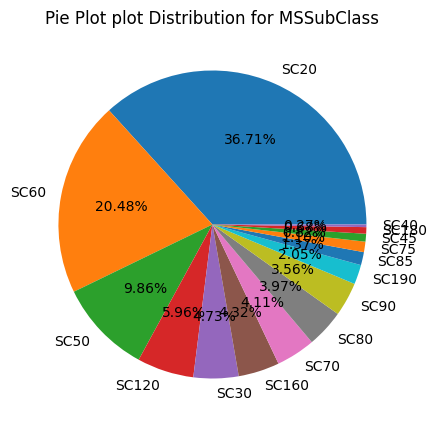

**************************************************
**************************************************
Logs for MSZoning


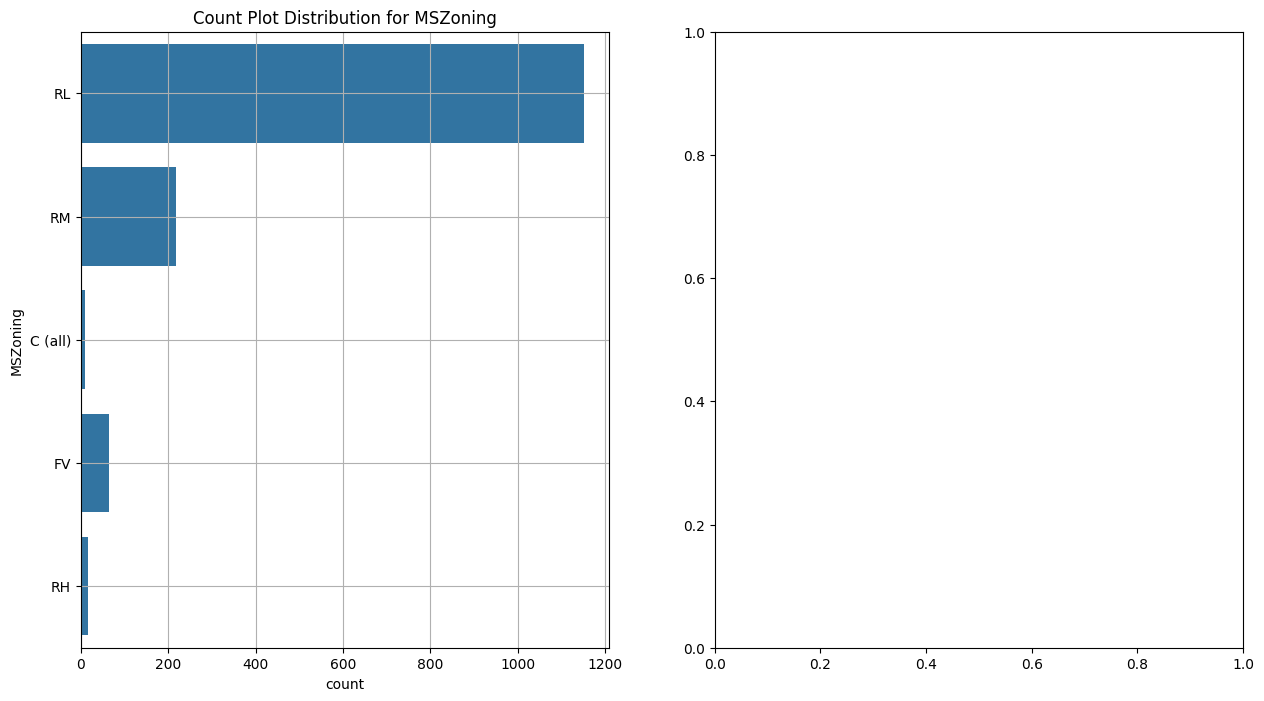

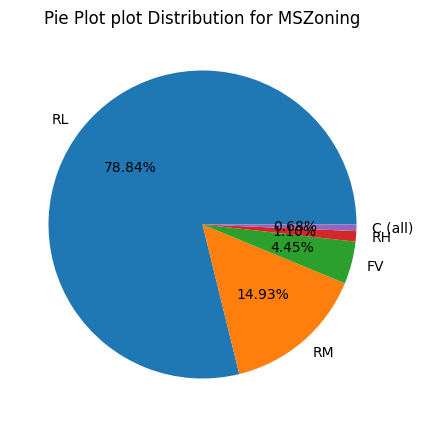

**************************************************
**************************************************
Logs for Street


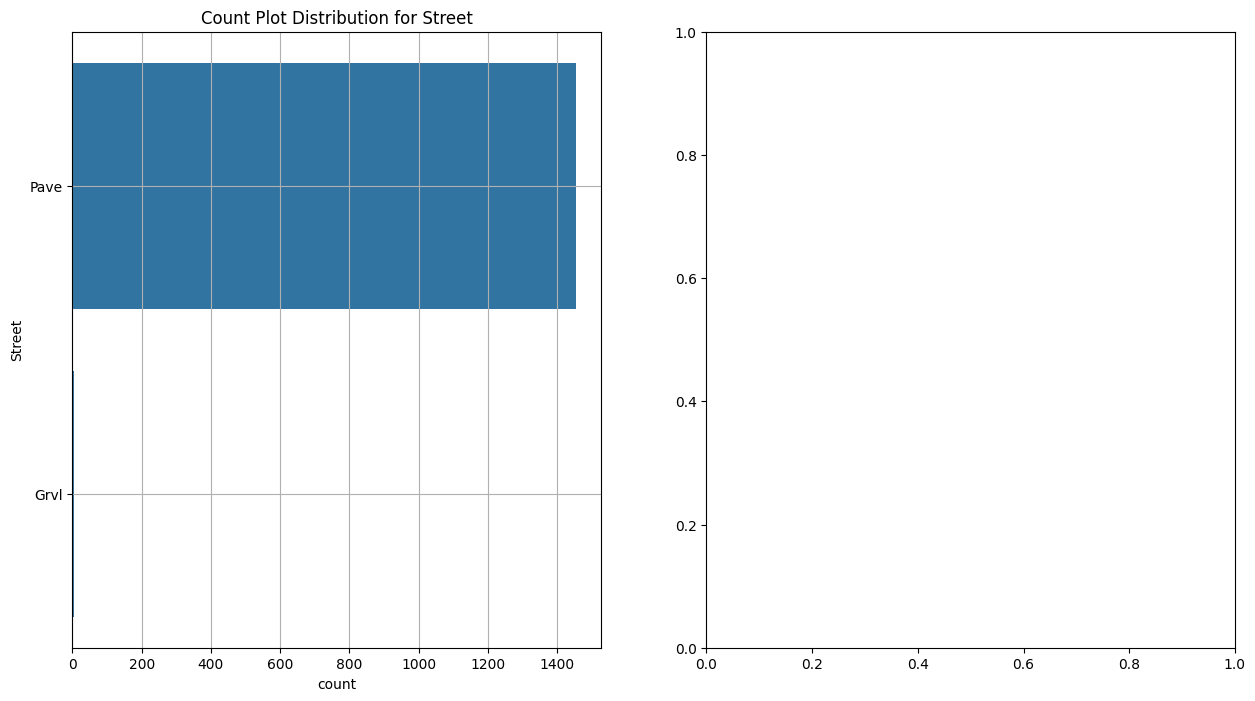

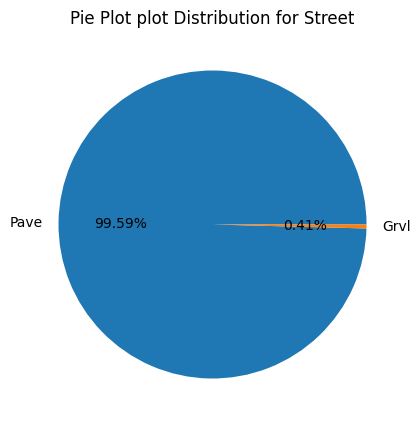

**************************************************
**************************************************
Logs for Alley


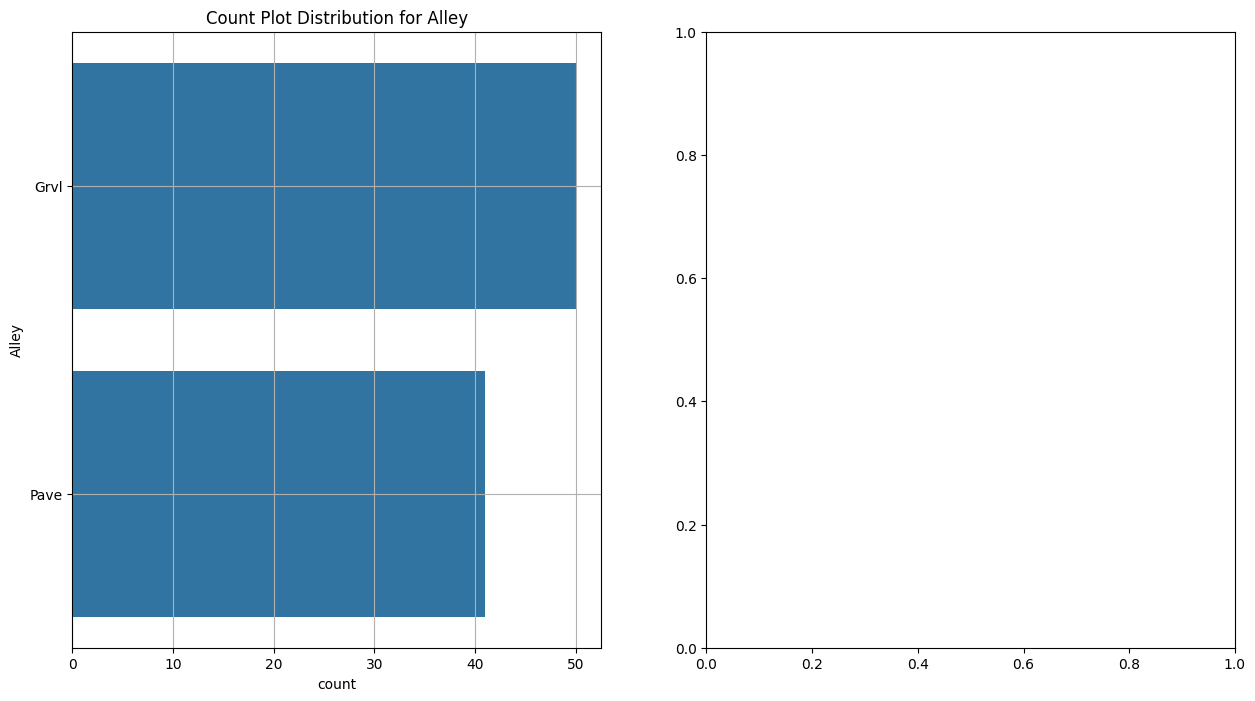

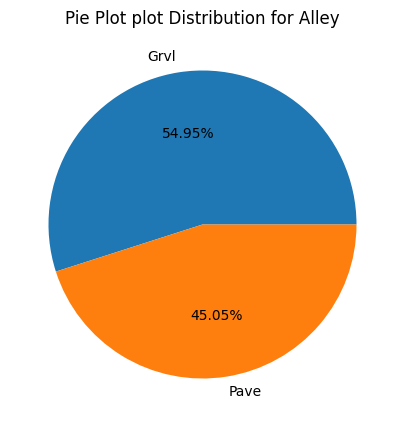

**************************************************
**************************************************
Logs for LotShape


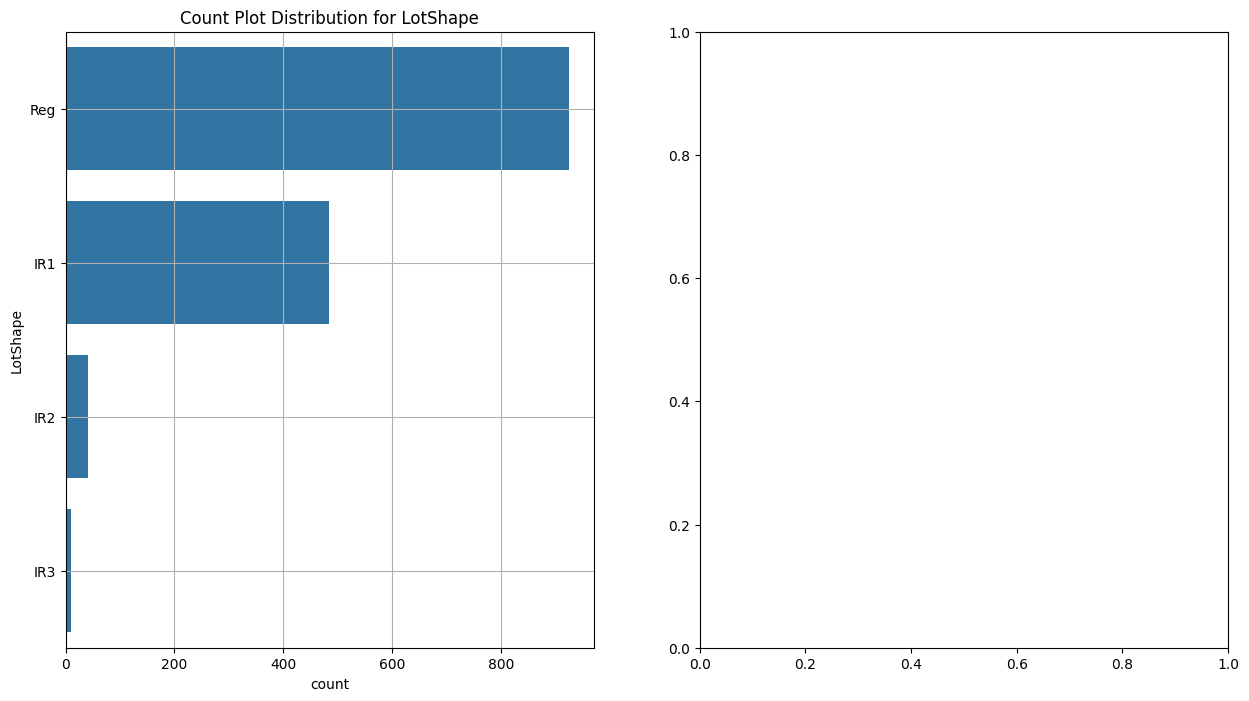

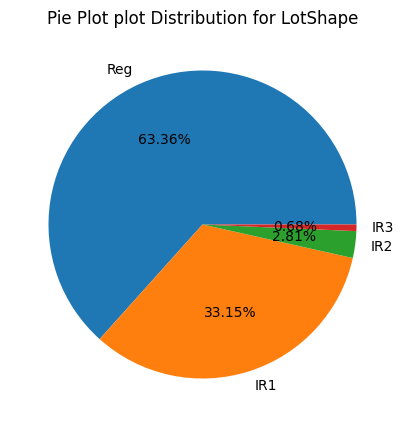

**************************************************
**************************************************
Logs for LandContour


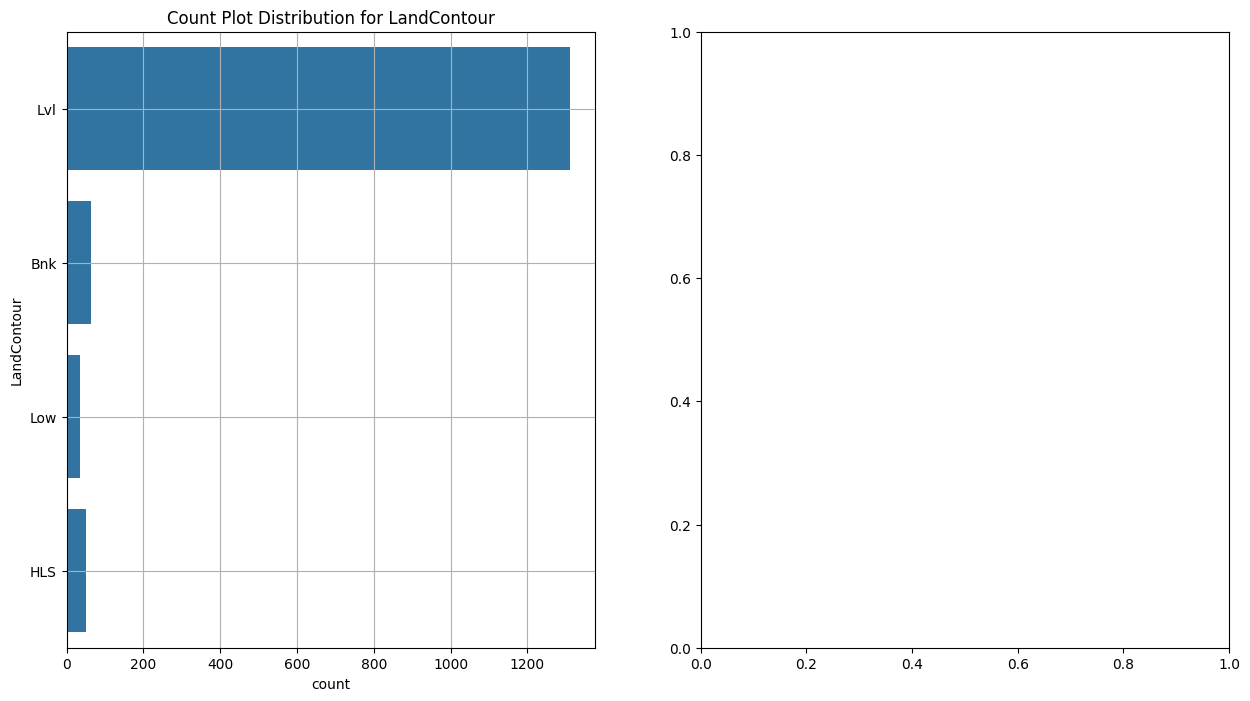

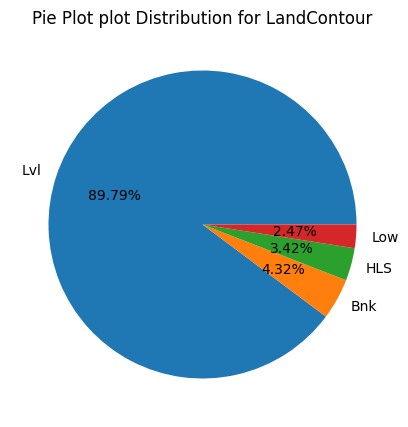

**************************************************
**************************************************
Logs for Utilities


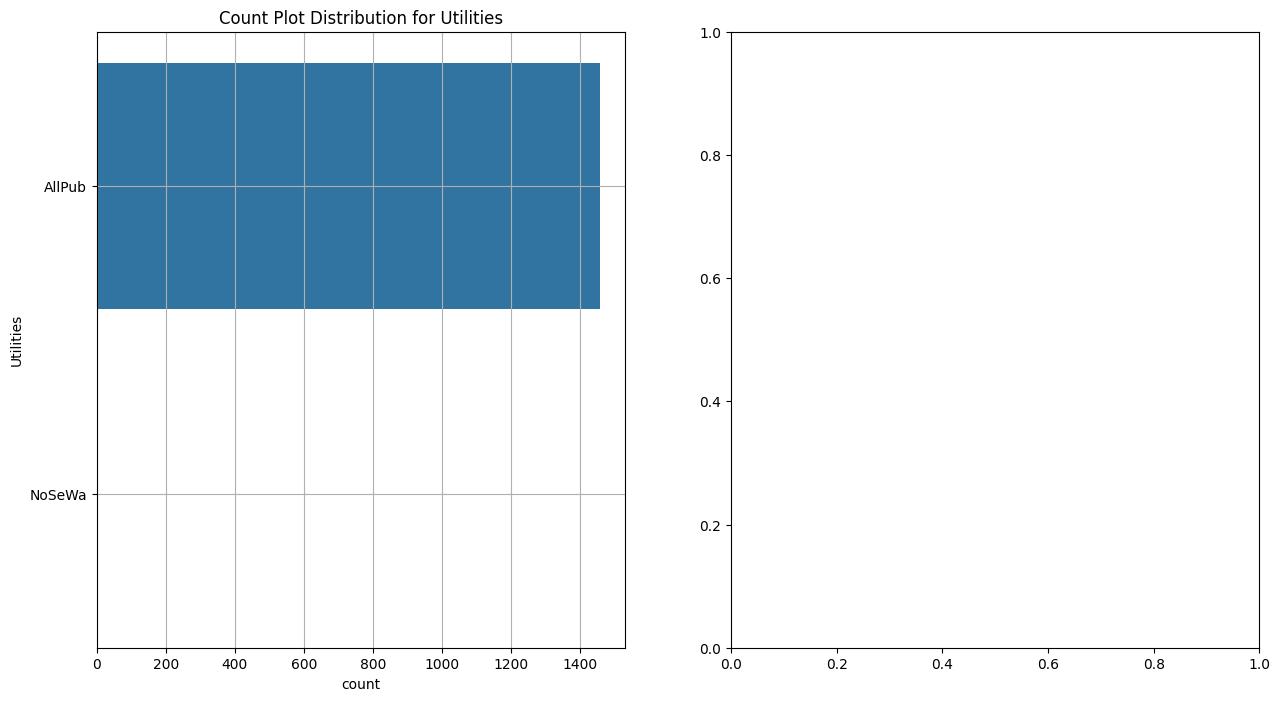

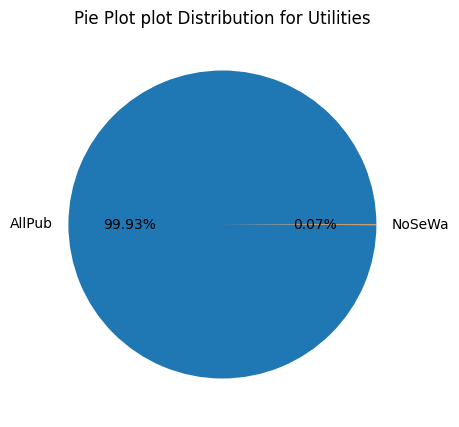

**************************************************
**************************************************
Logs for LotConfig


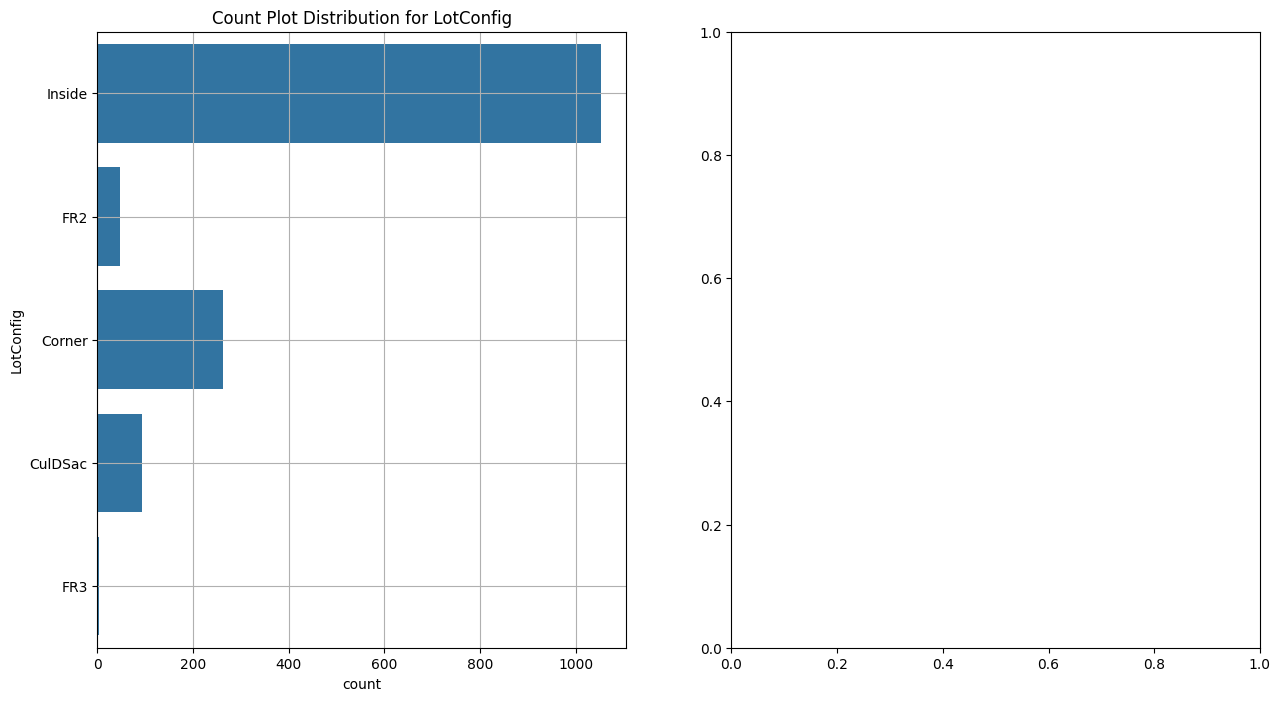

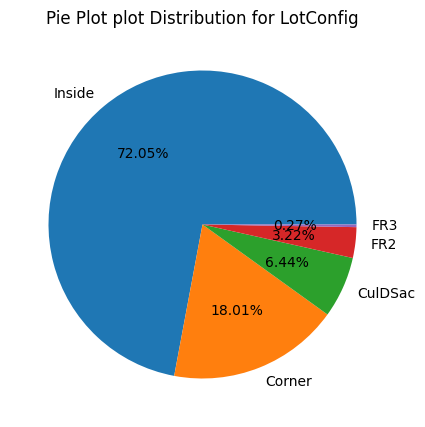

**************************************************
**************************************************
Logs for LandSlope


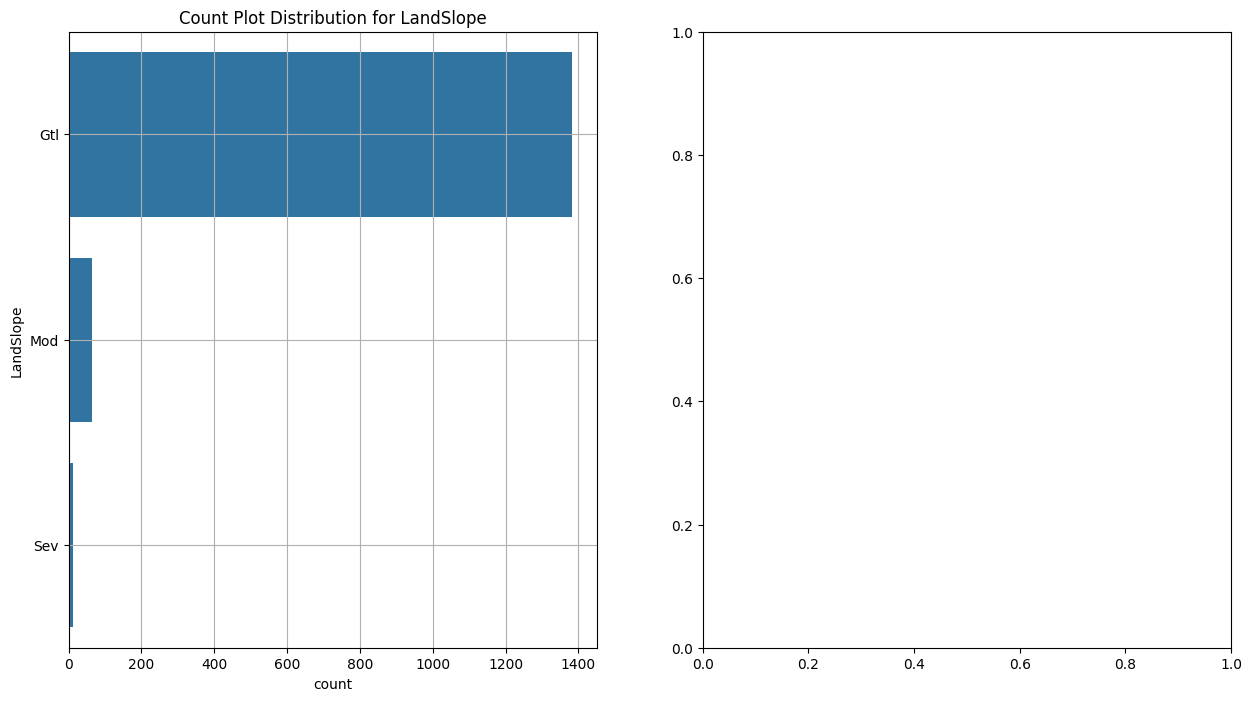

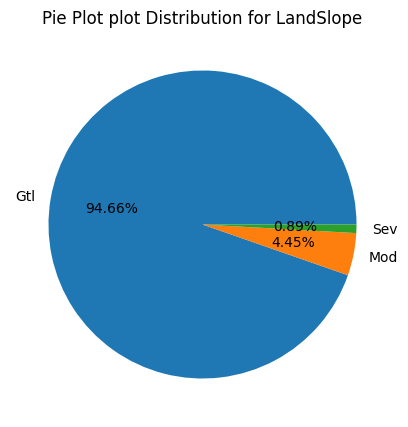

**************************************************
**************************************************
Logs for Neighborhood


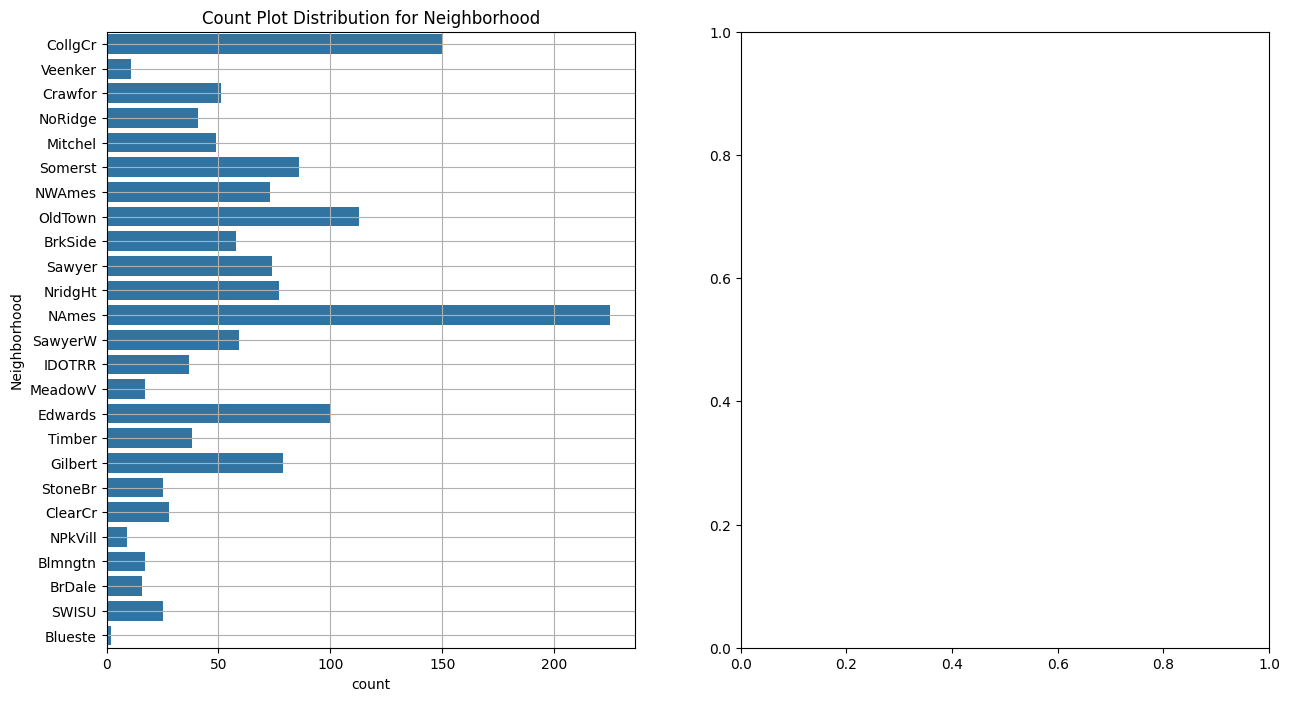

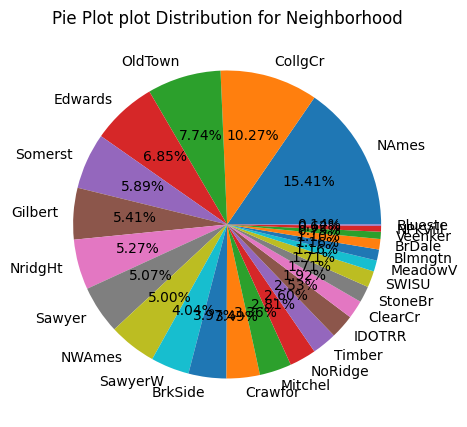

**************************************************
**************************************************
Logs for Condition1


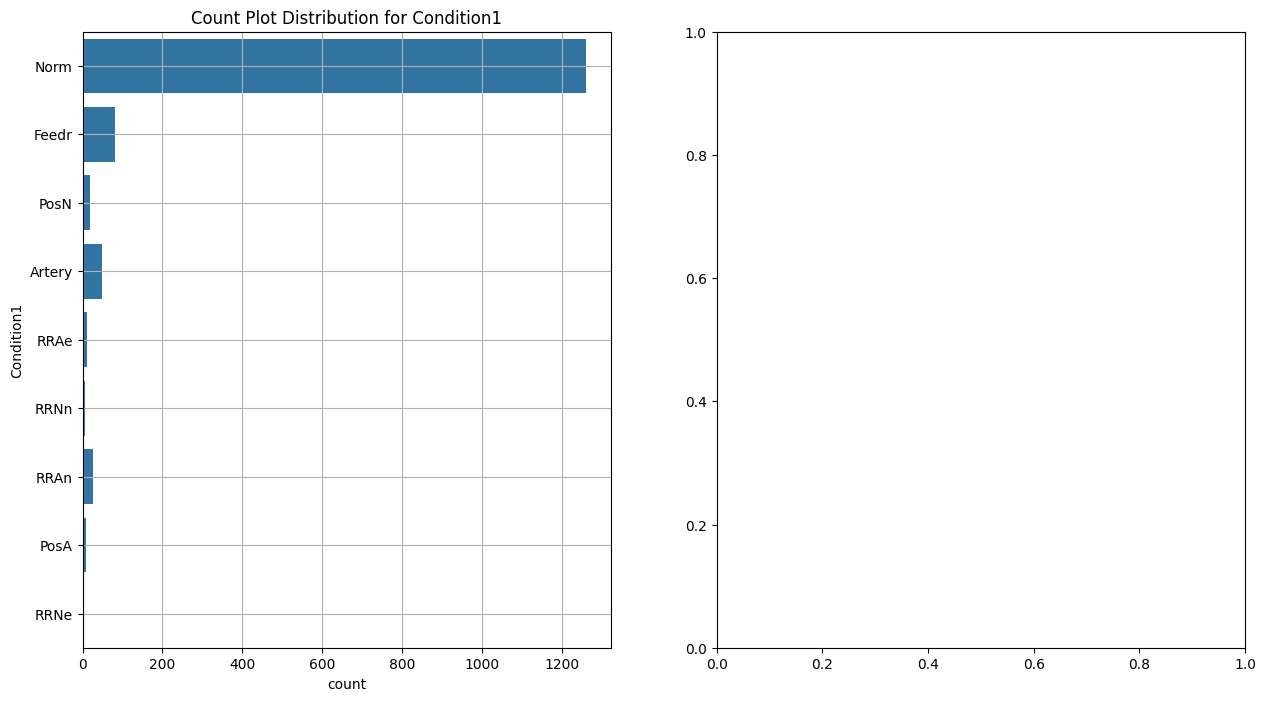

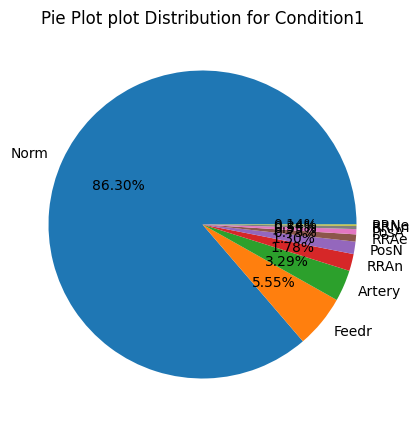

**************************************************
**************************************************
Logs for Condition2


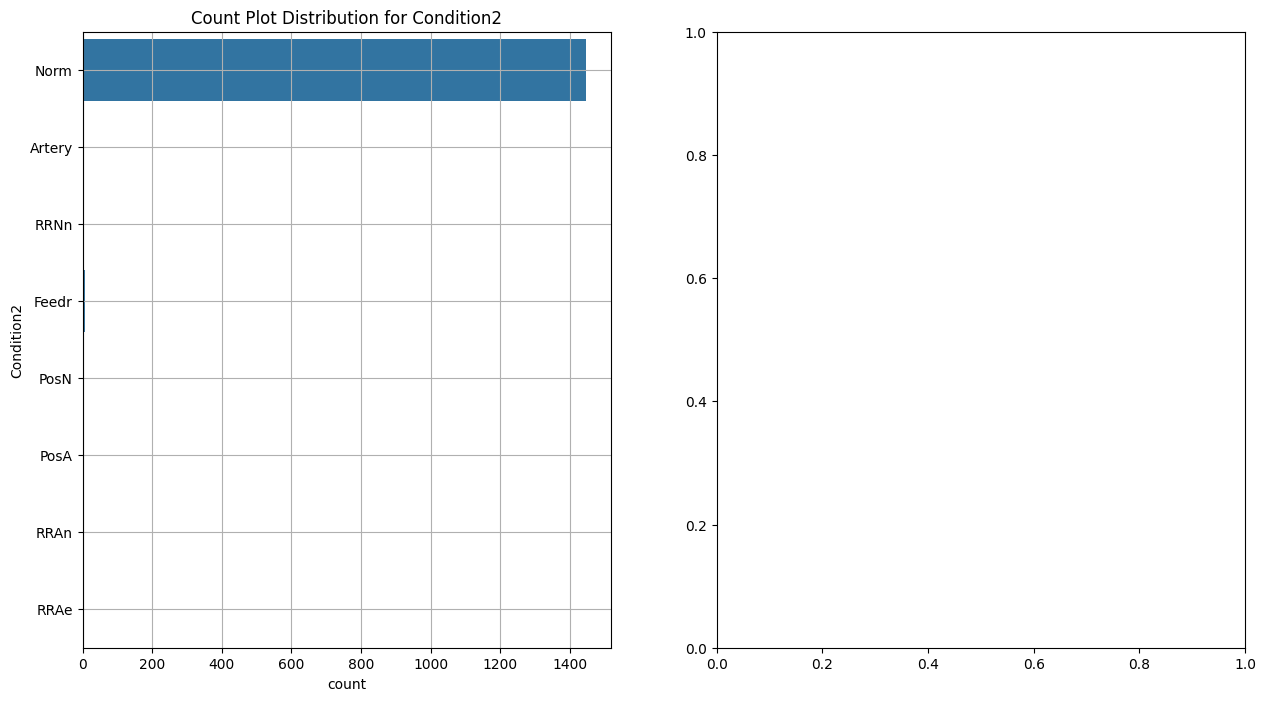

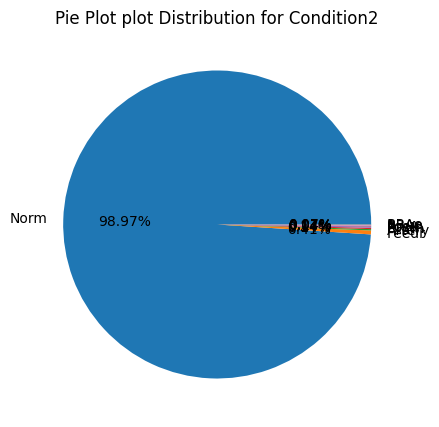

**************************************************
**************************************************
Logs for BldgType


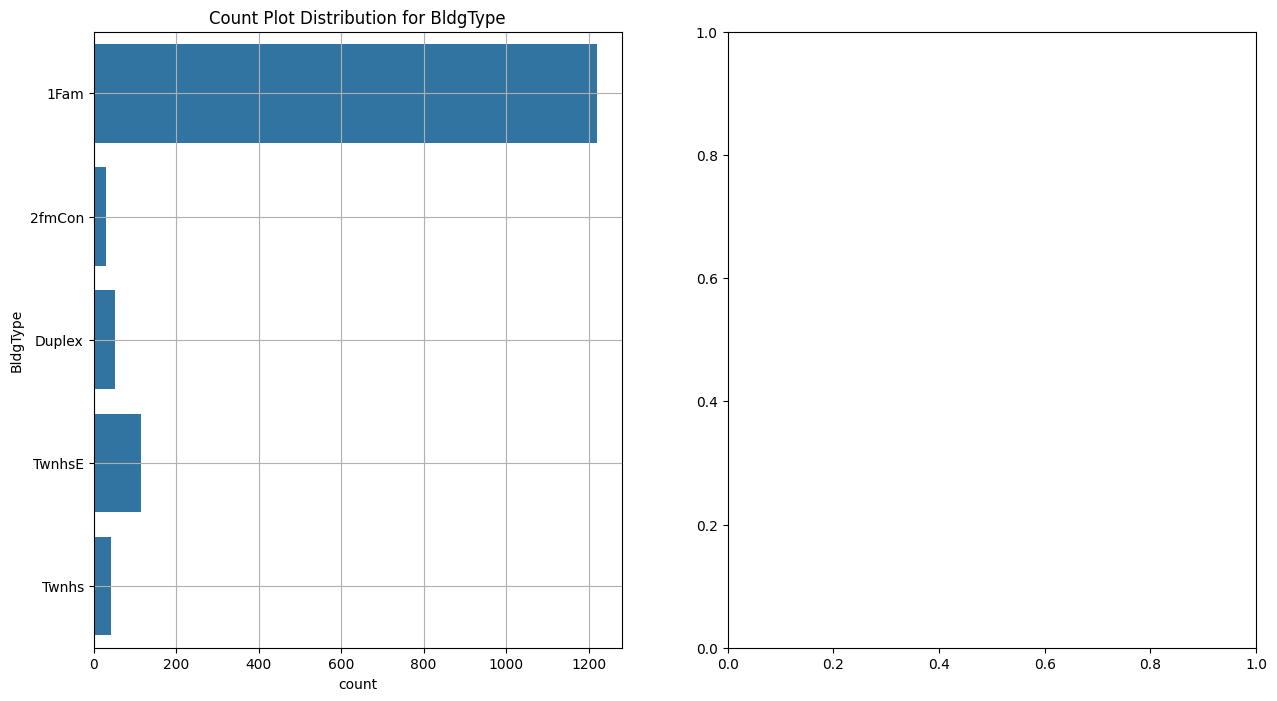

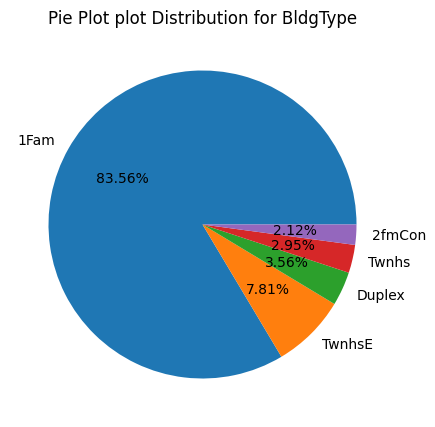

**************************************************
**************************************************
Logs for HouseStyle


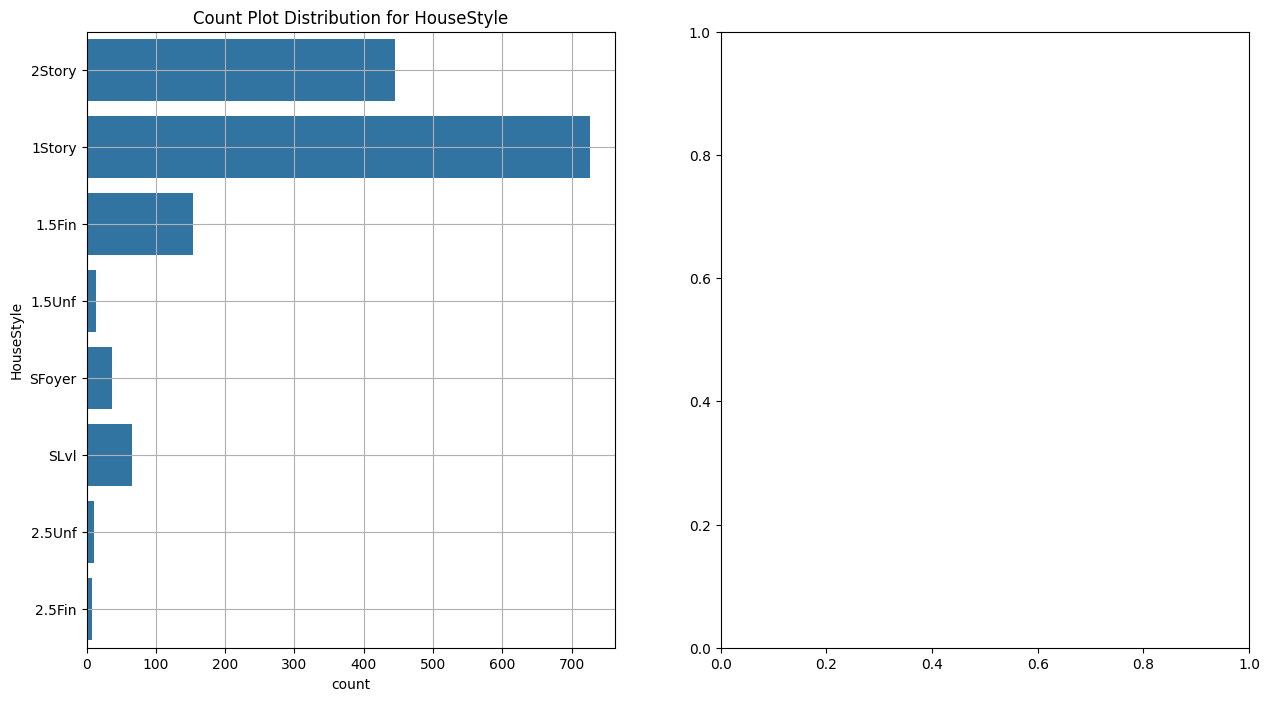

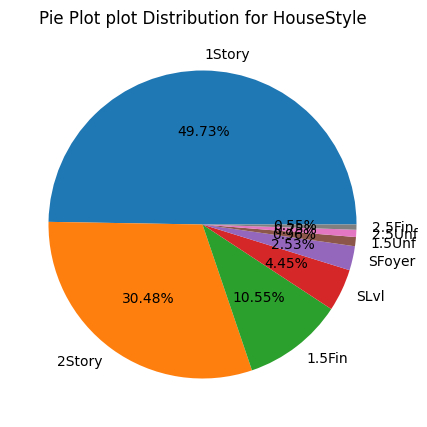

**************************************************
**************************************************
Logs for RoofStyle


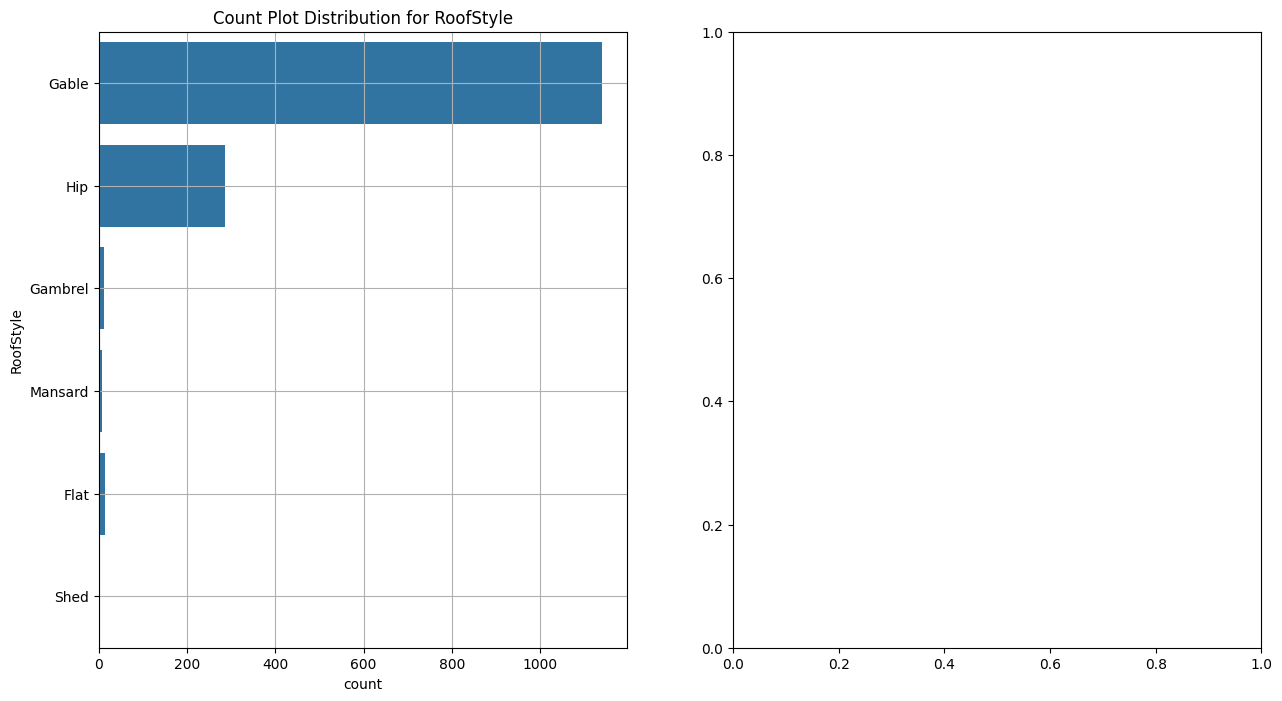

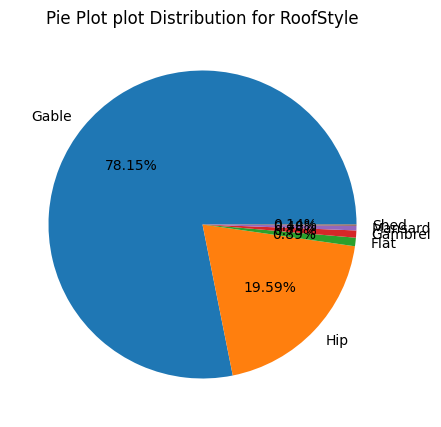

**************************************************
**************************************************
Logs for RoofMatl


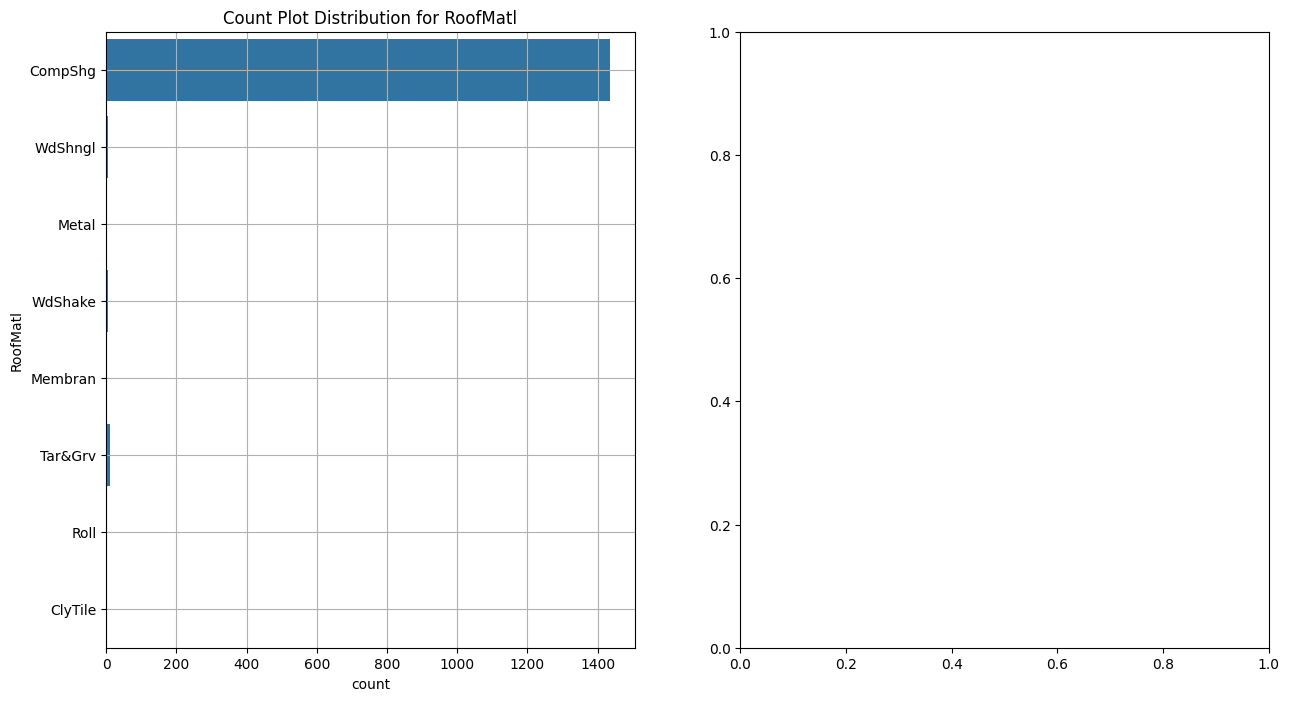

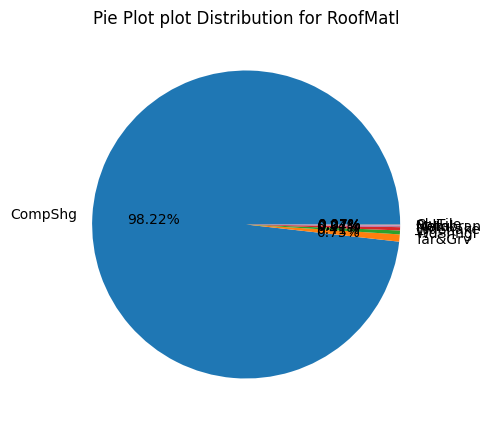

**************************************************
**************************************************
Logs for Exterior1st


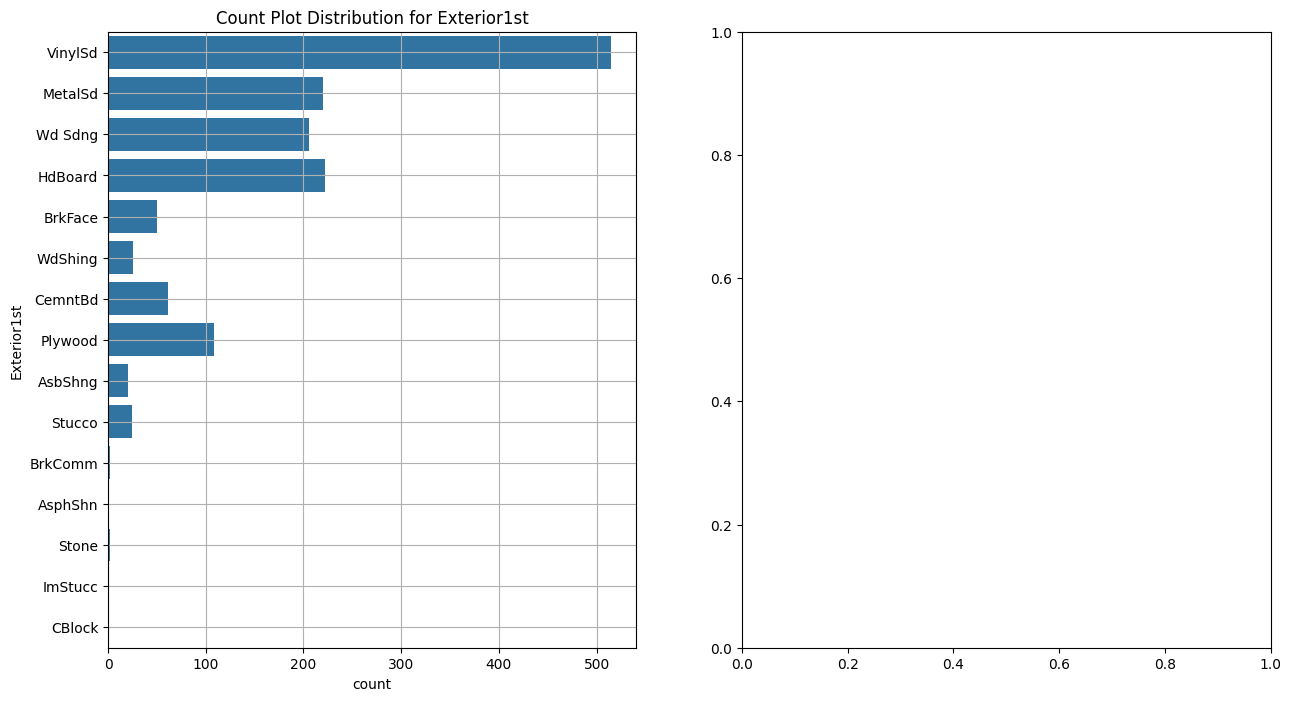

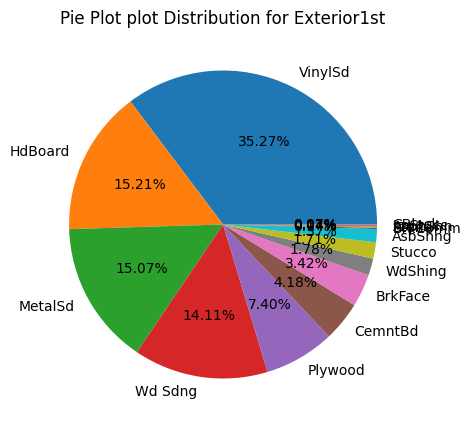

**************************************************
**************************************************
Logs for Exterior2nd


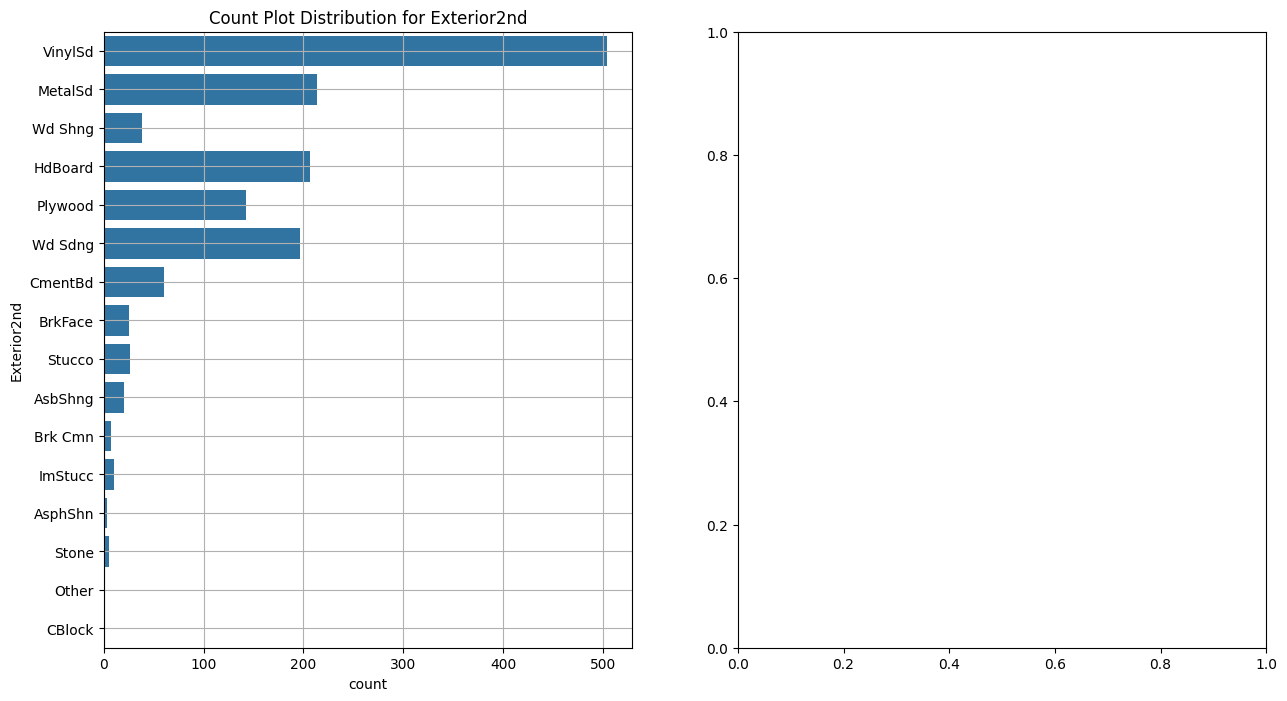

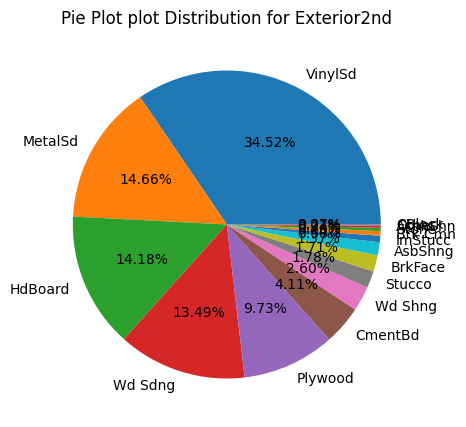

**************************************************
**************************************************
Logs for MasVnrType


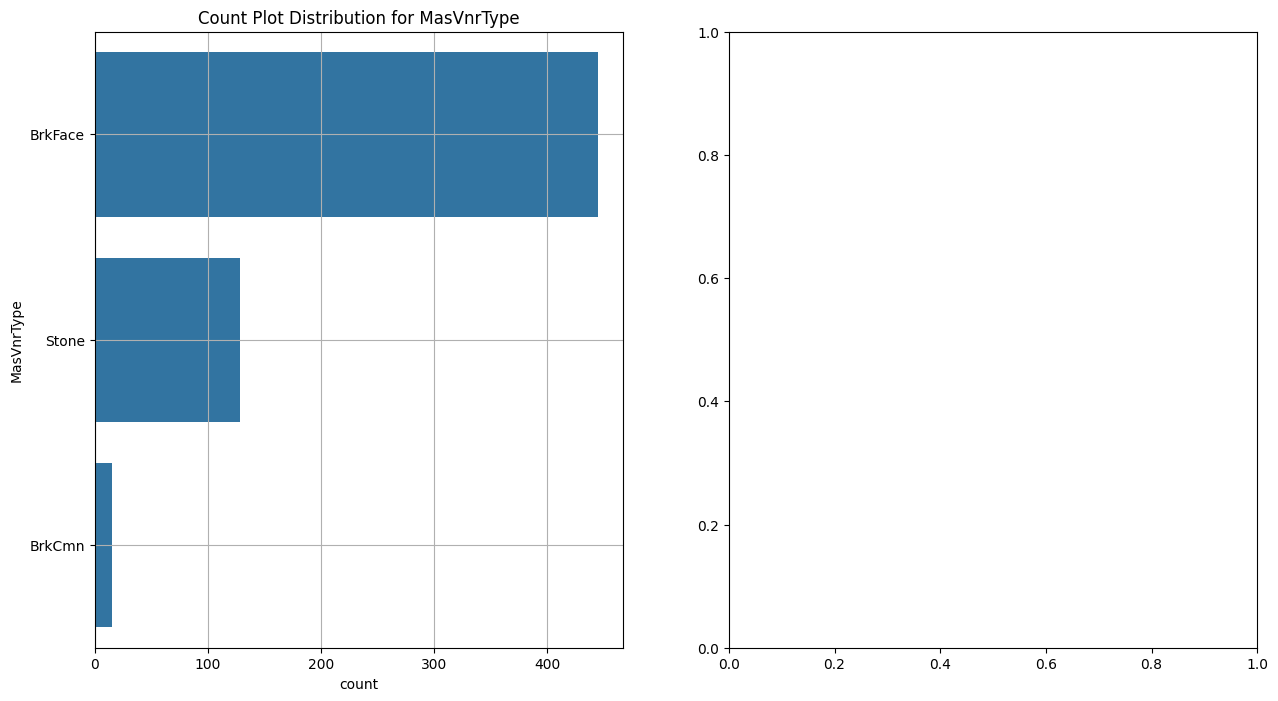

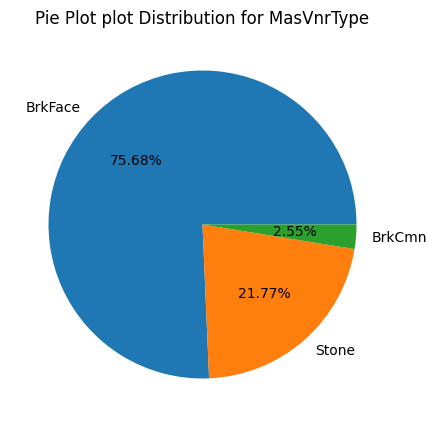

**************************************************
**************************************************
Logs for ExterQual


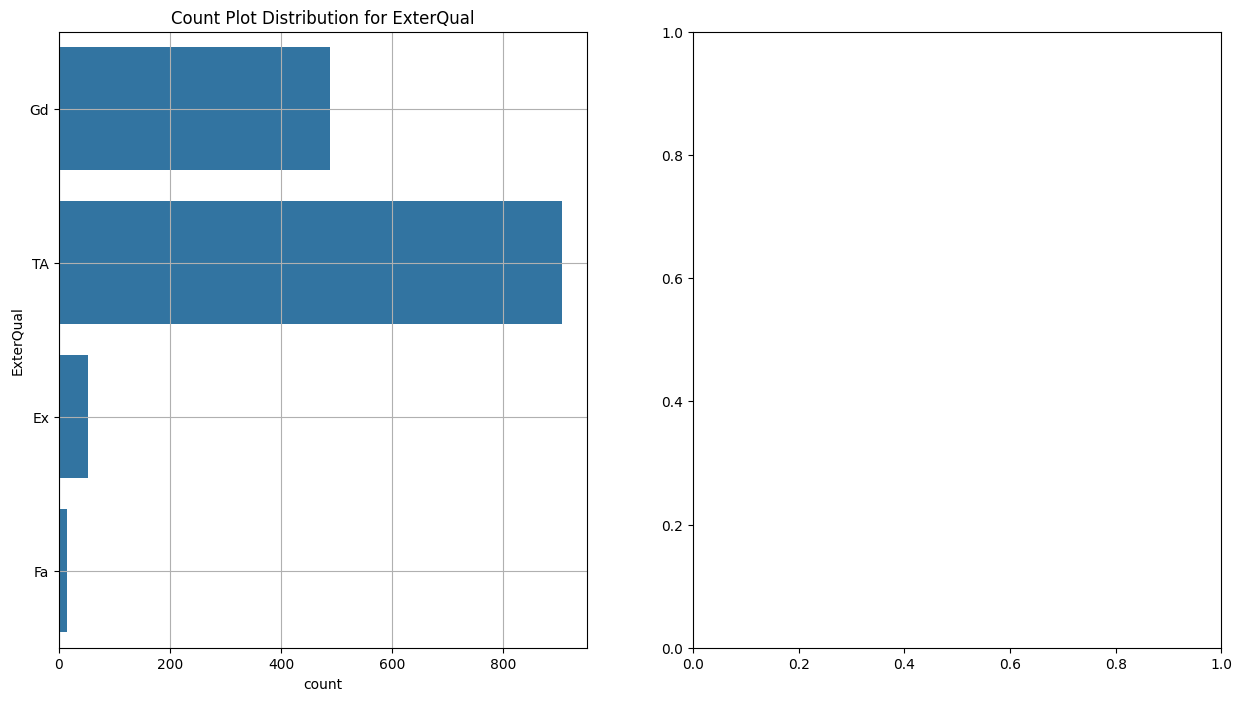

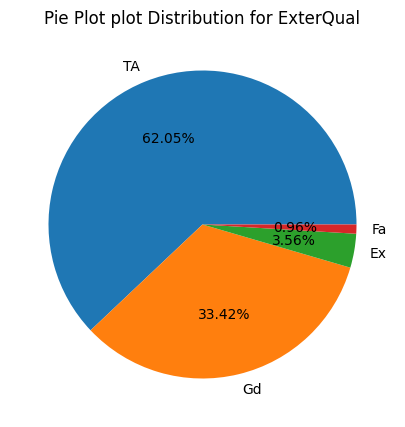

**************************************************
**************************************************
Logs for ExterCond


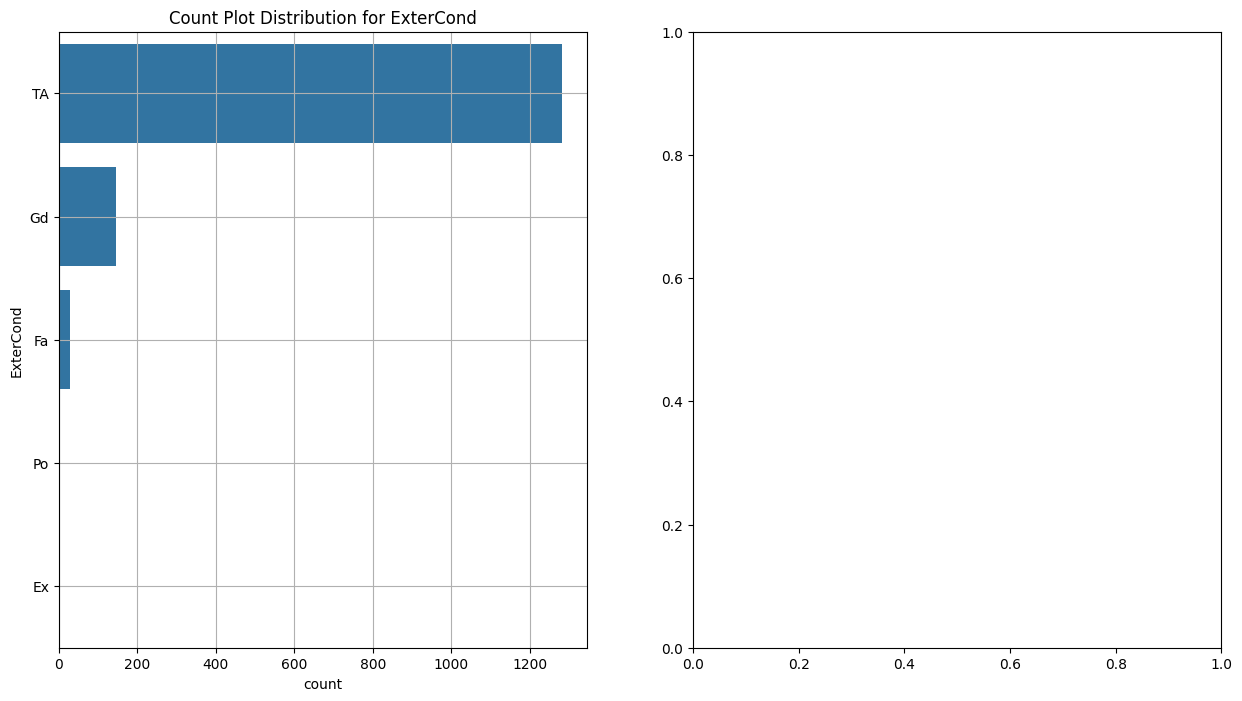

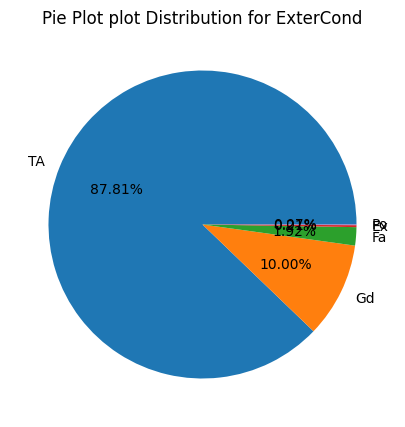

**************************************************
**************************************************
Logs for Foundation


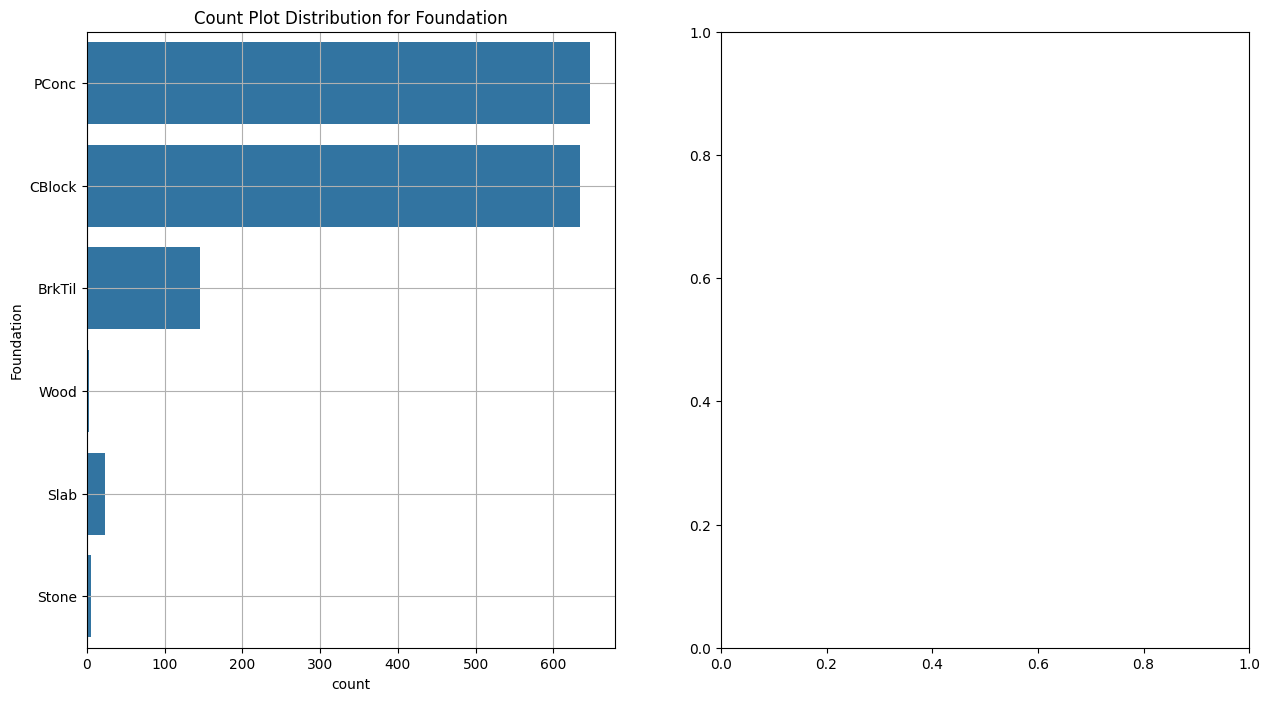

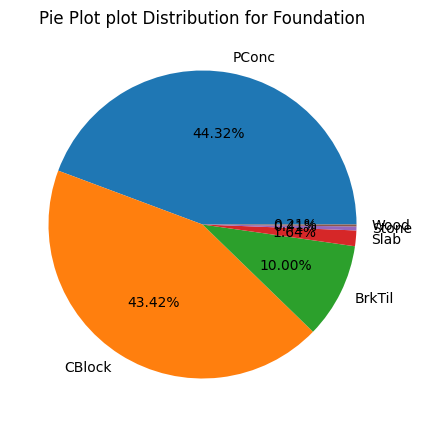

**************************************************
**************************************************
Logs for BsmtQual


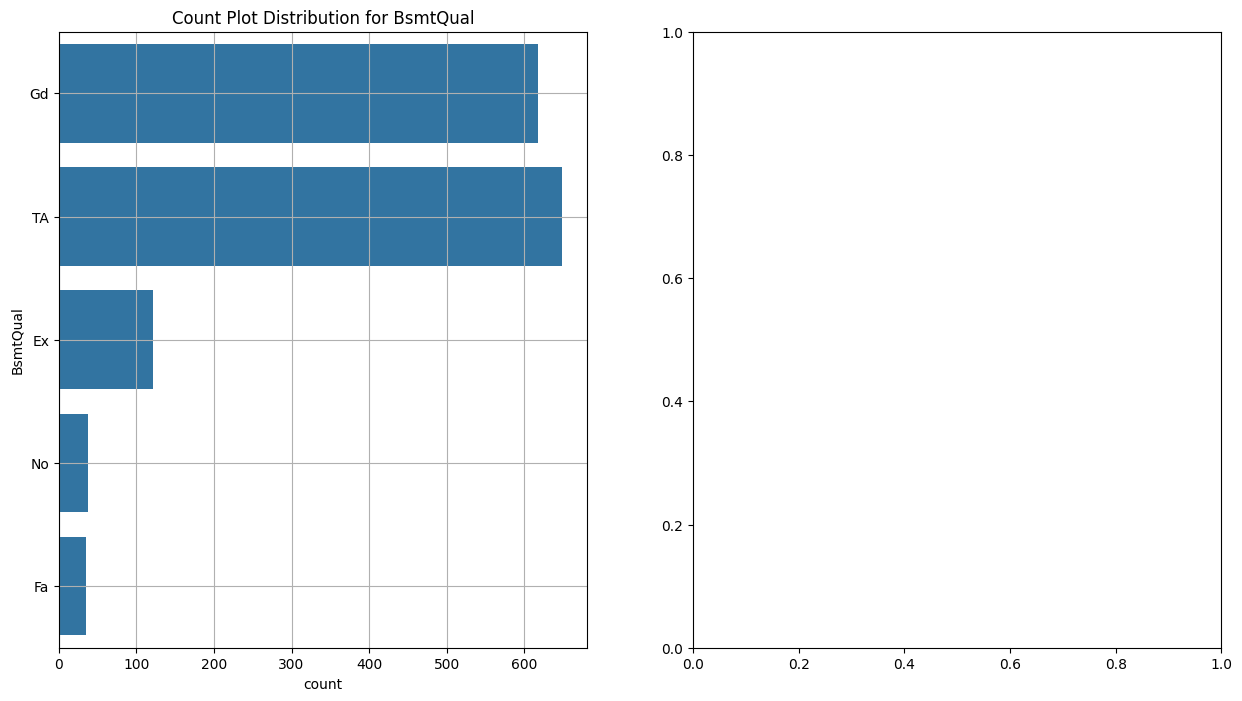

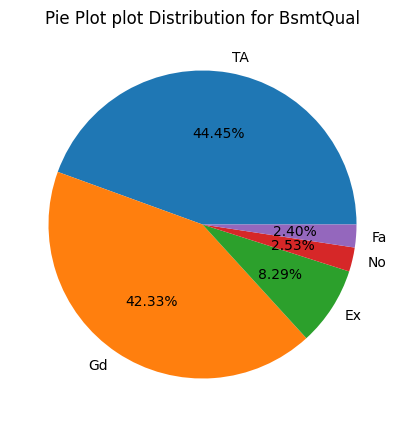

**************************************************
**************************************************
Logs for BsmtCond


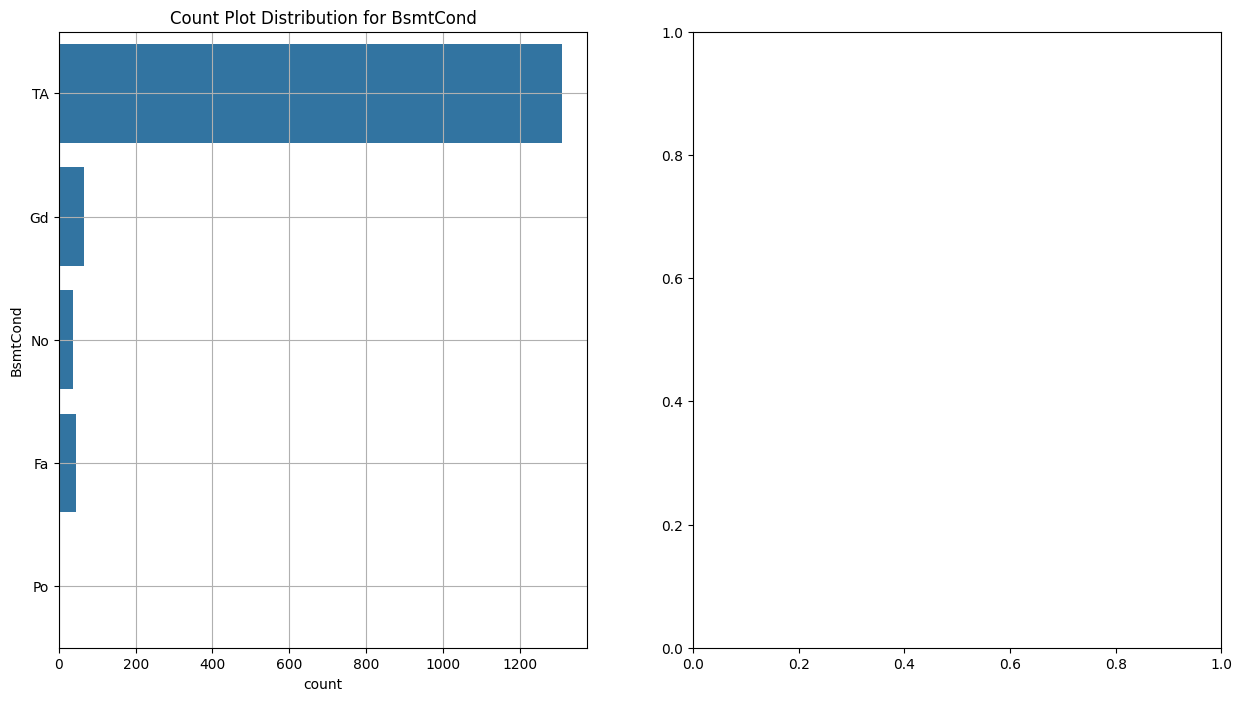

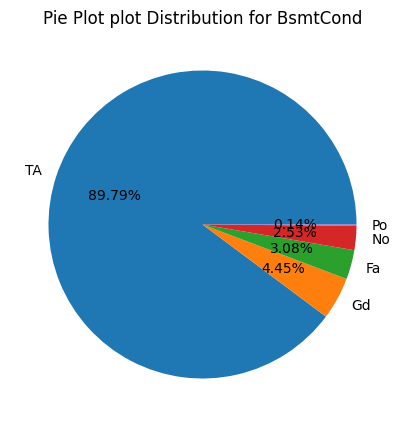

**************************************************
**************************************************
Logs for BsmtExposure


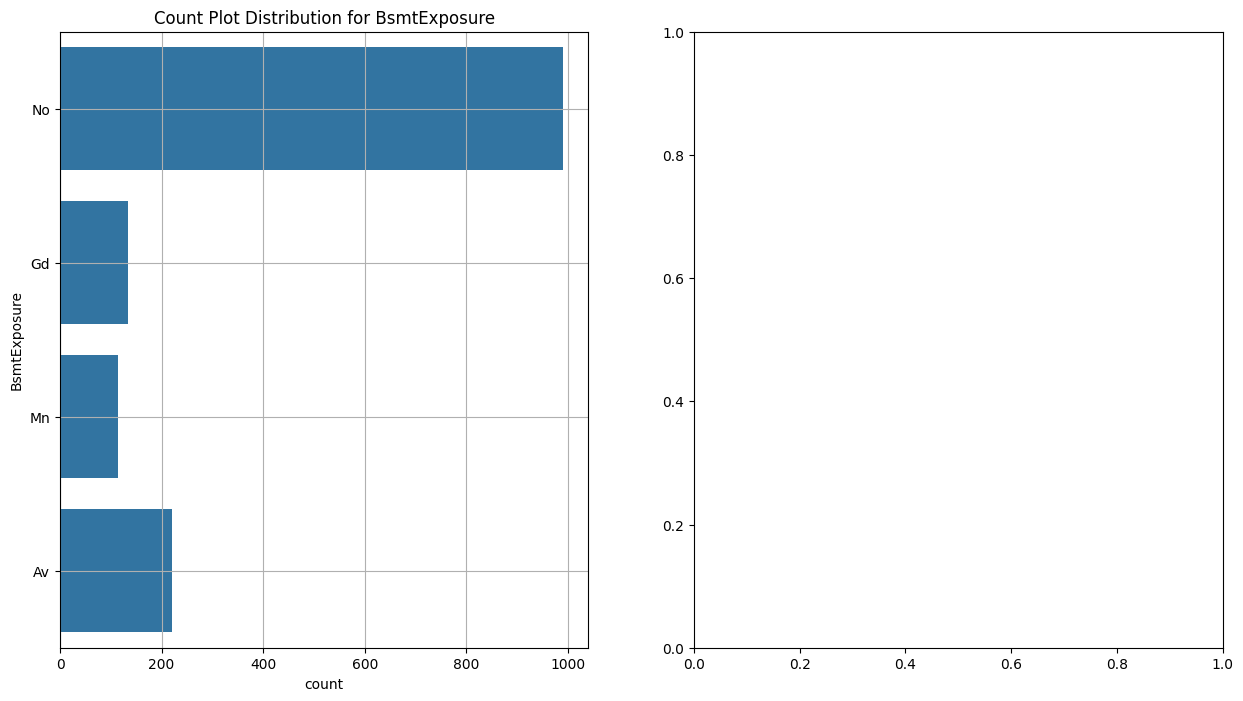

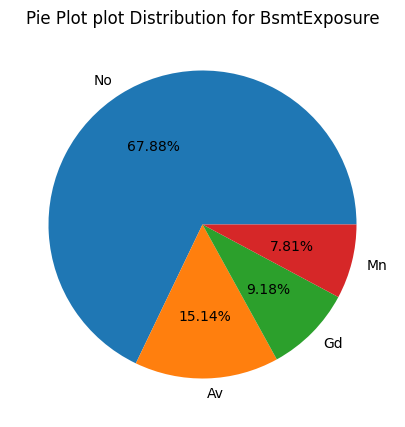

**************************************************
**************************************************
Logs for BsmtFinType1


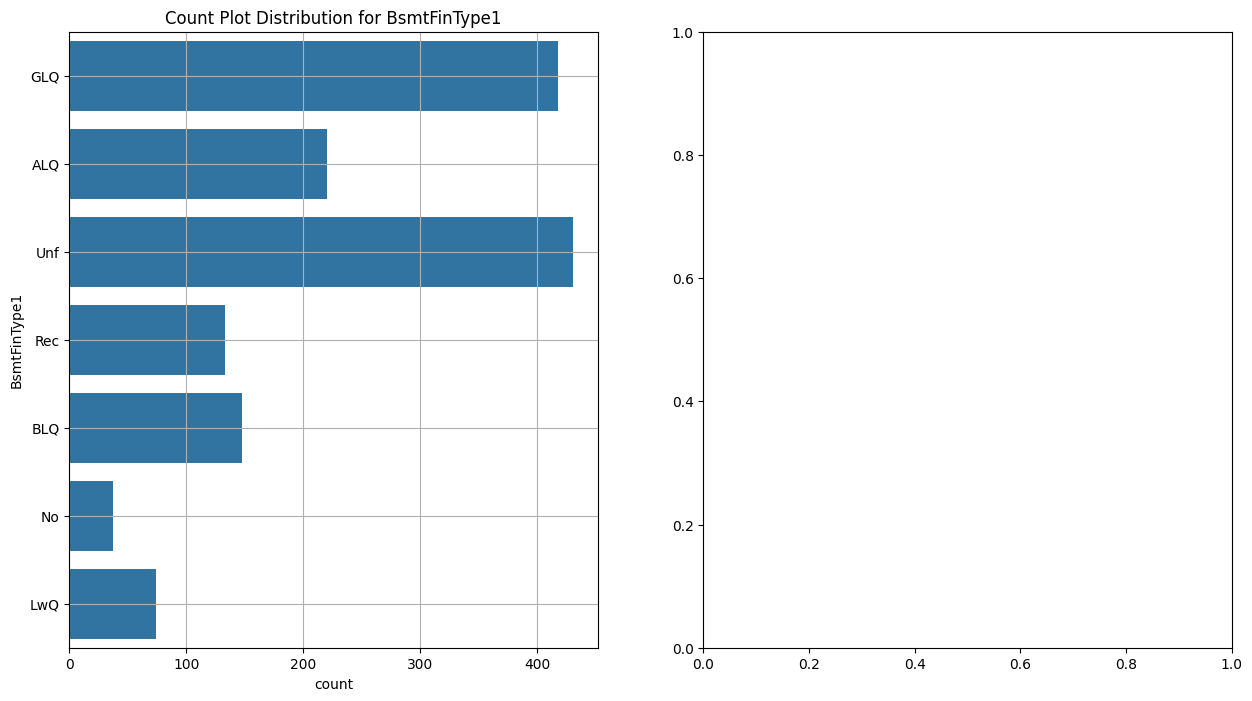

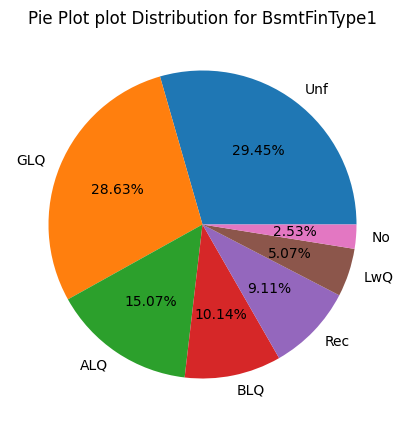

**************************************************
**************************************************
Logs for BsmtFinType2


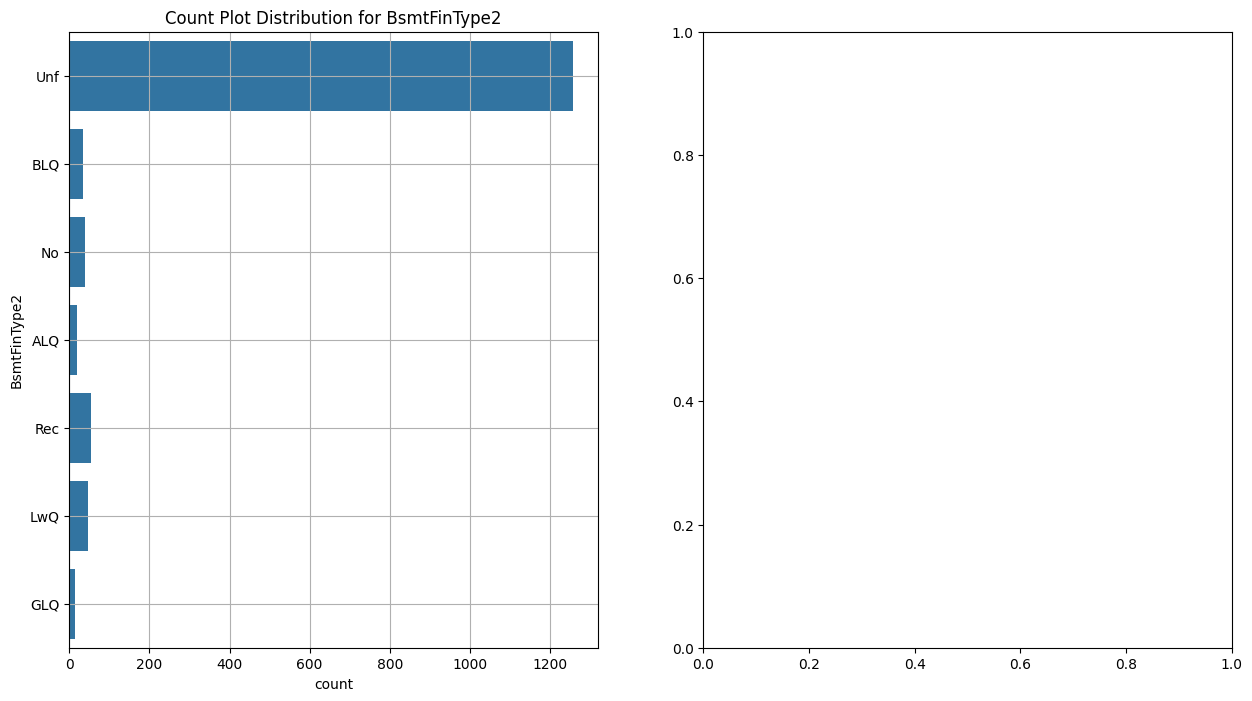

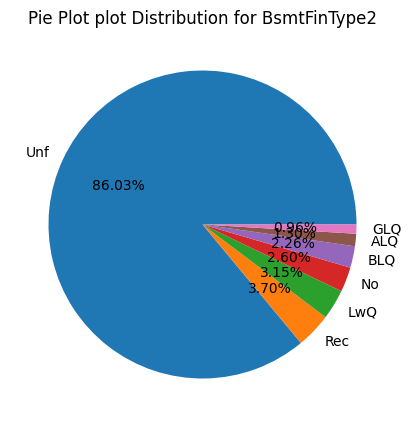

**************************************************
**************************************************
Logs for Heating


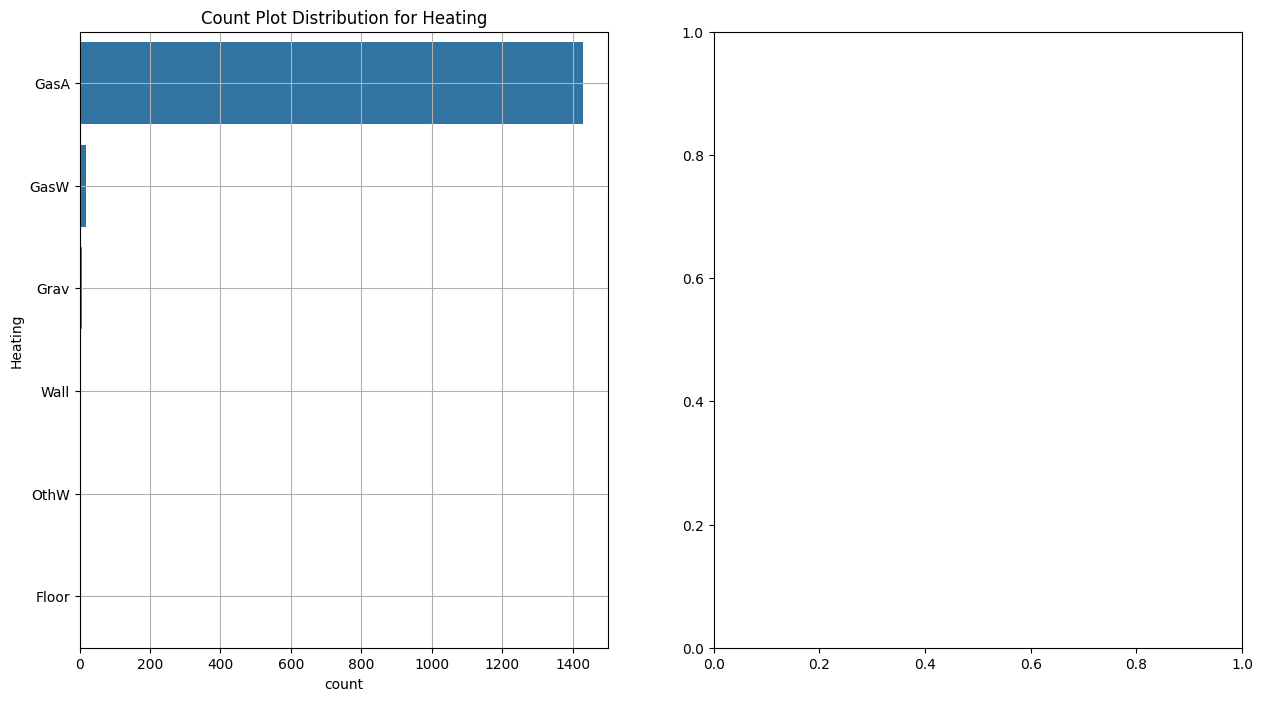

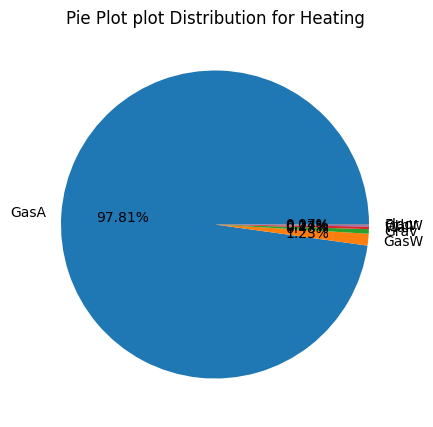

**************************************************
**************************************************
Logs for HeatingQC


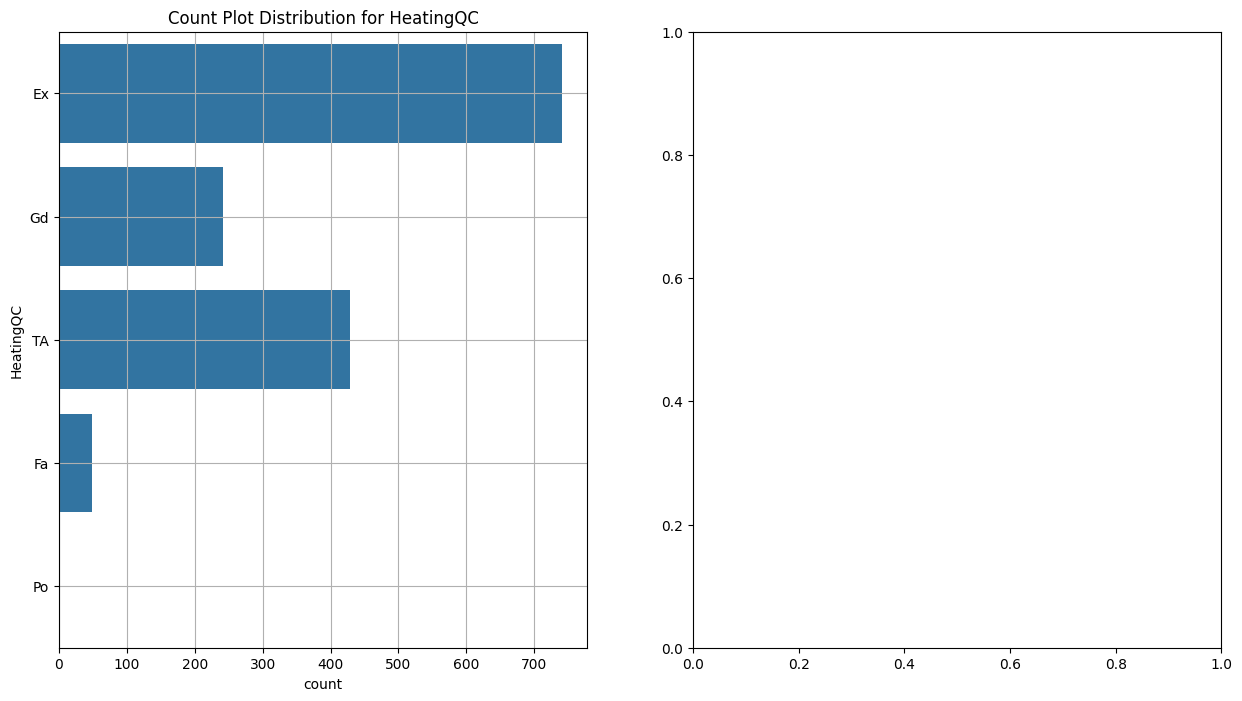

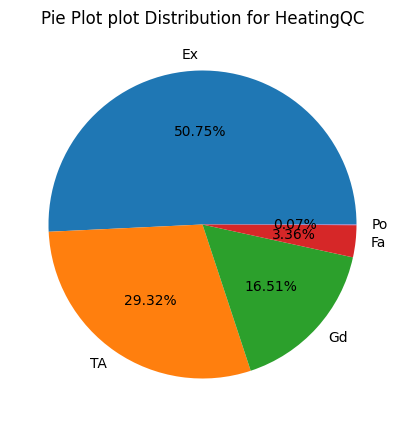

**************************************************
**************************************************
Logs for CentralAir


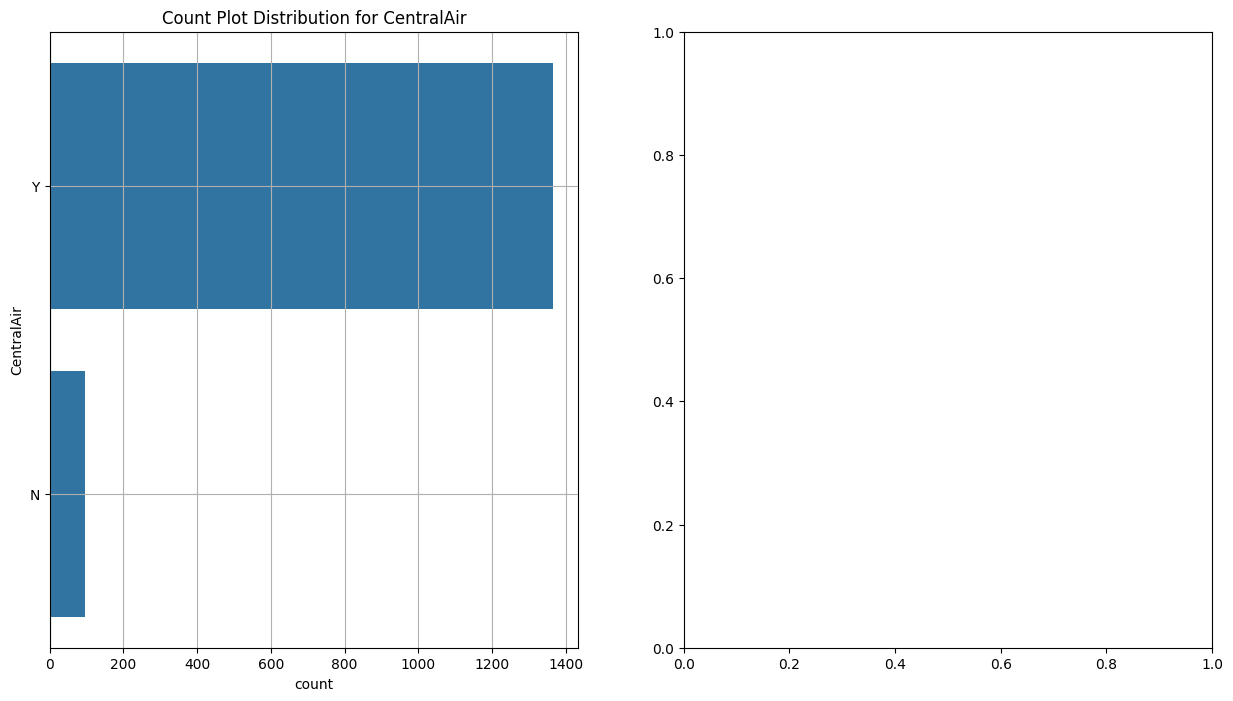

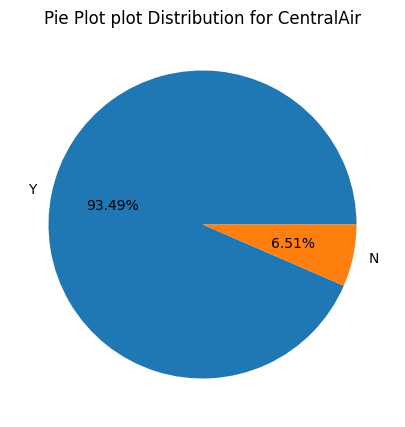

**************************************************
**************************************************
Logs for Electrical


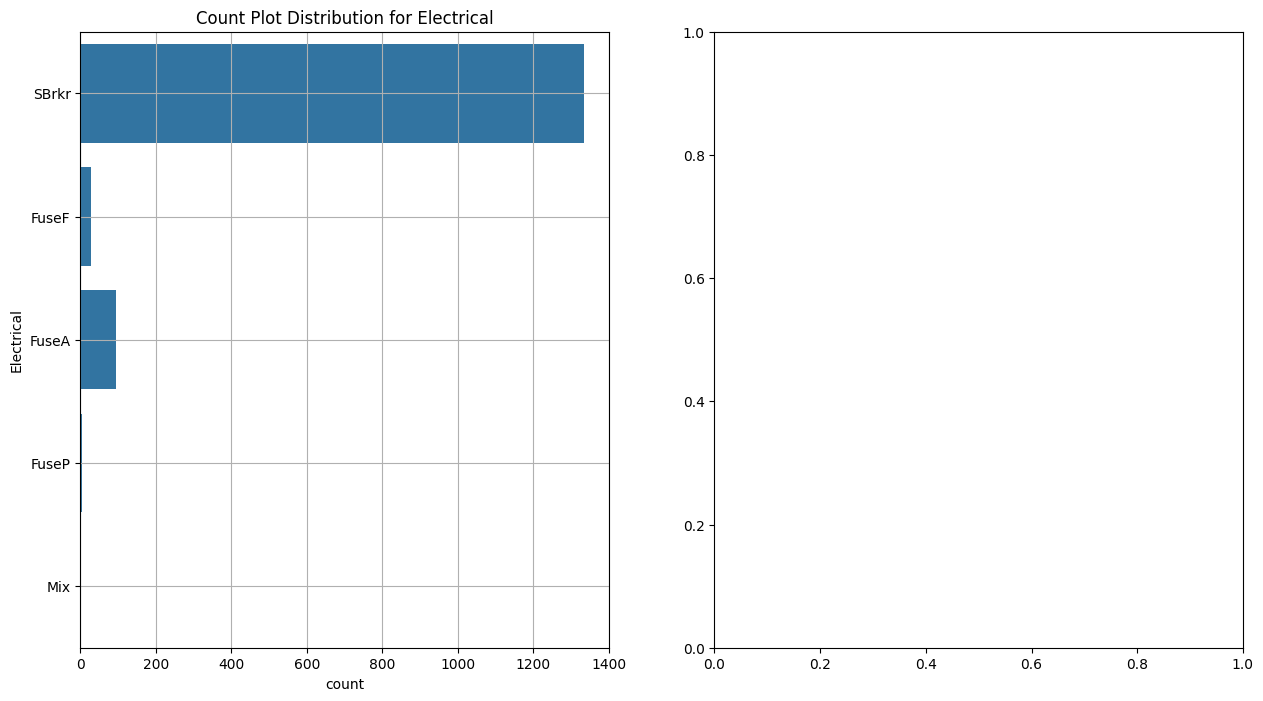

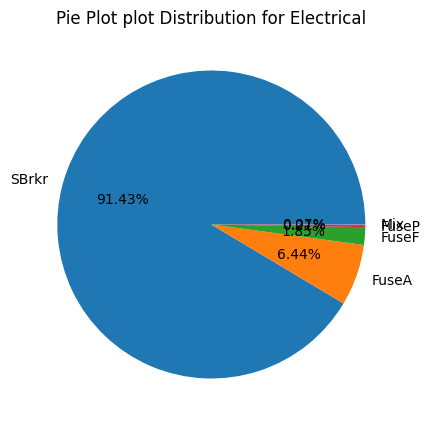

**************************************************
**************************************************
Logs for KitchenQual


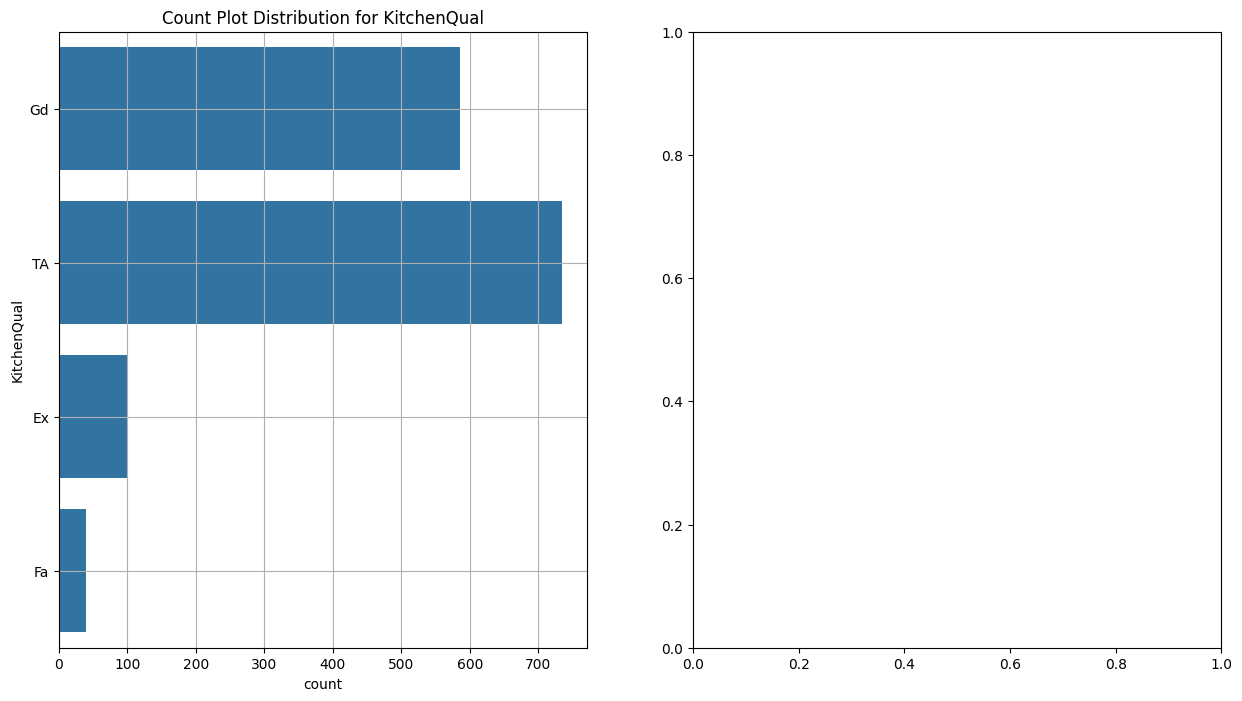

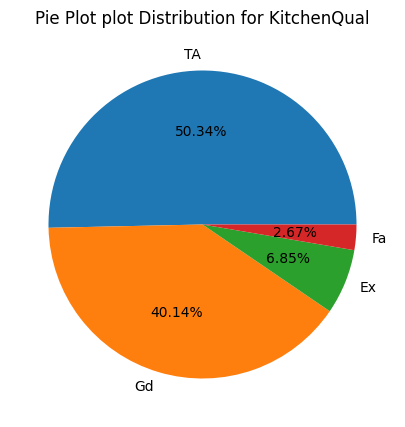

**************************************************
**************************************************
Logs for Functional


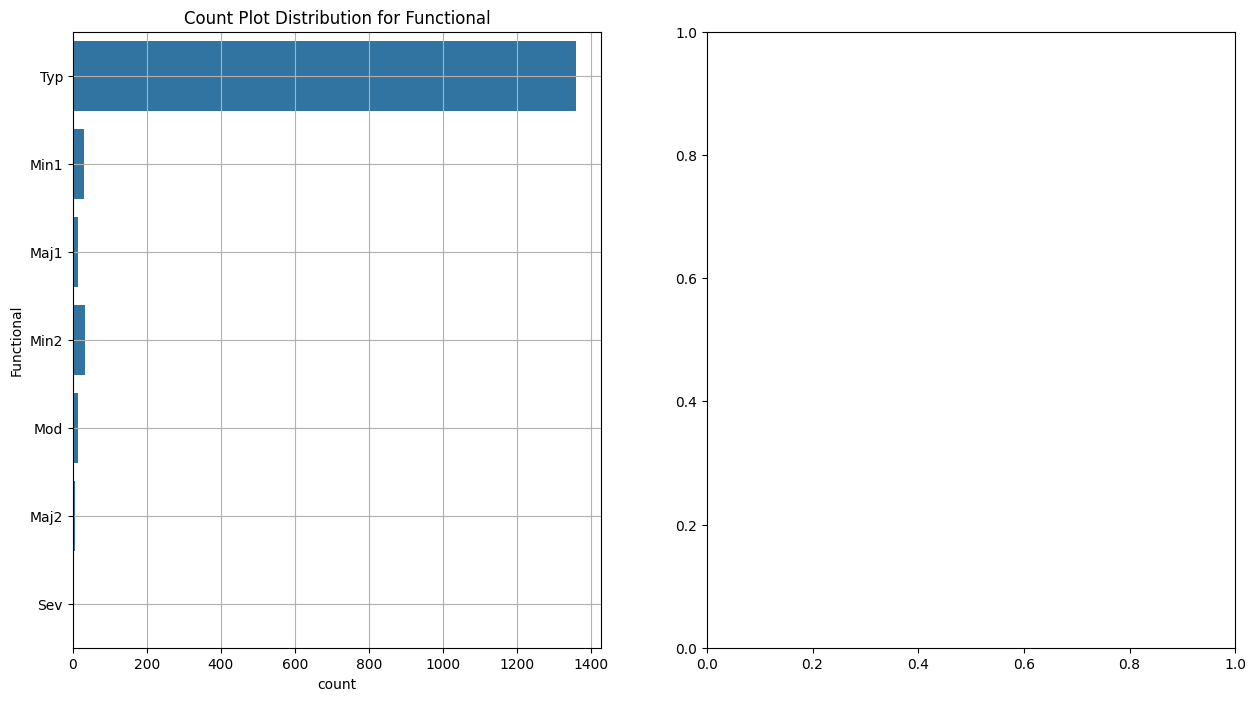

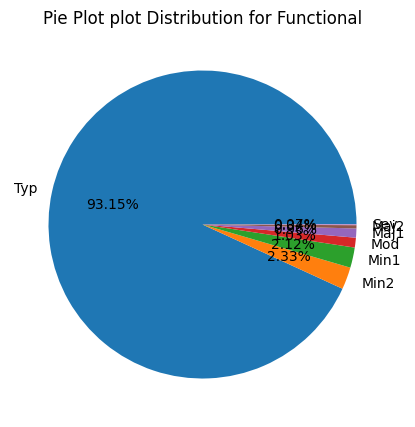

**************************************************
**************************************************
Logs for FireplaceQu


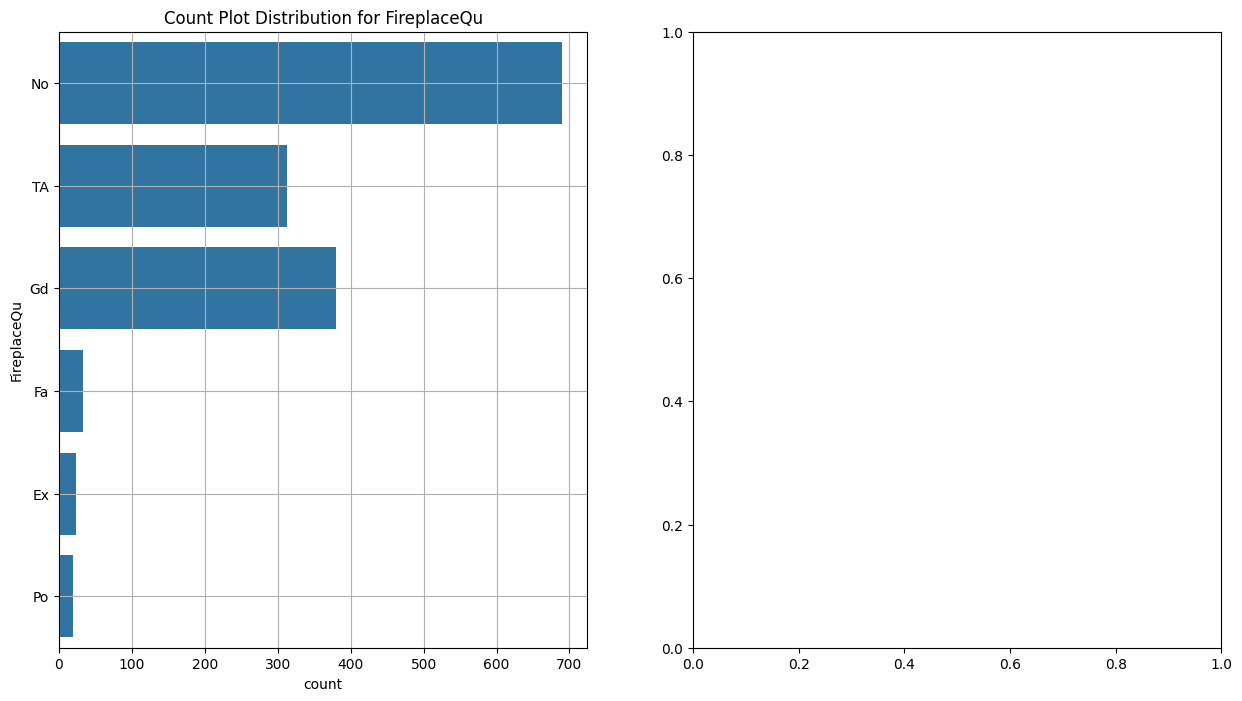

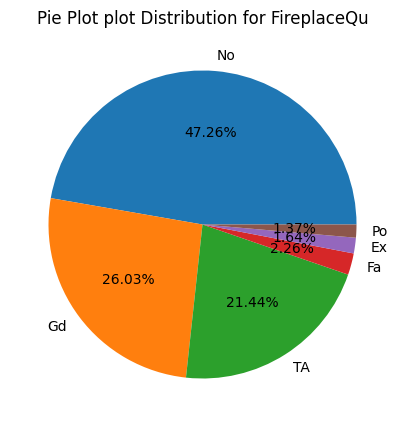

**************************************************
**************************************************
Logs for GarageType


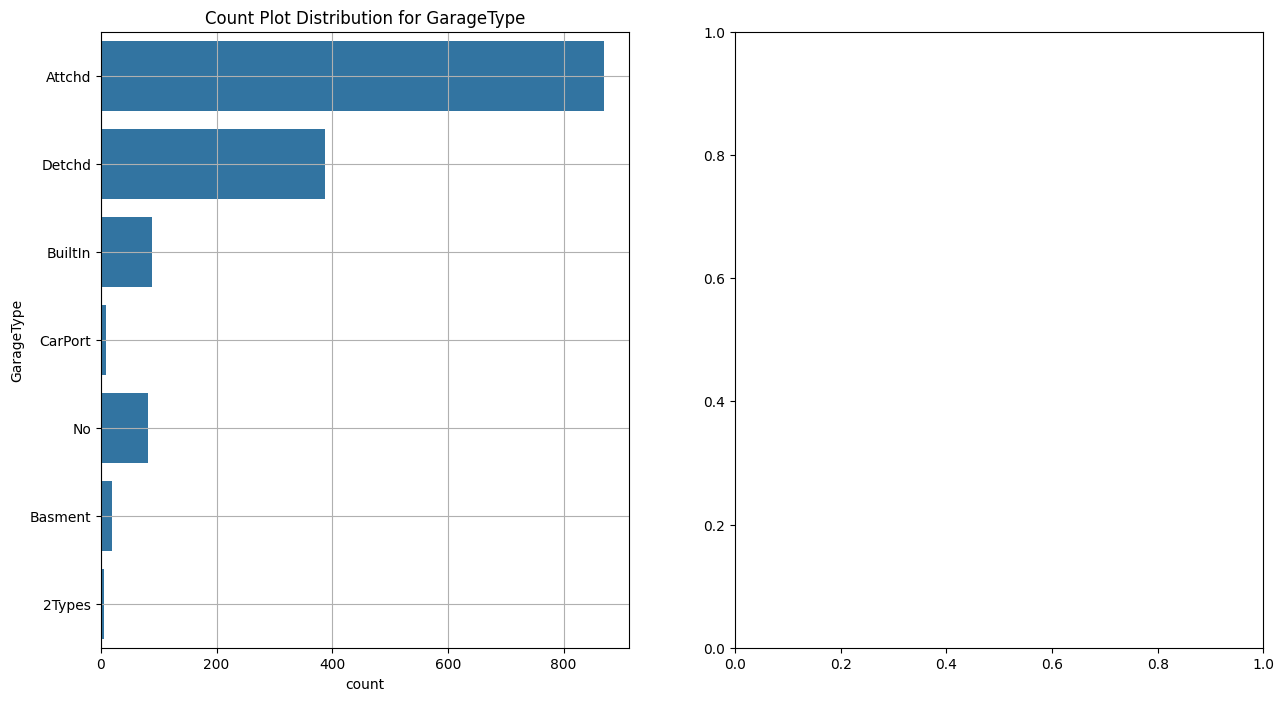

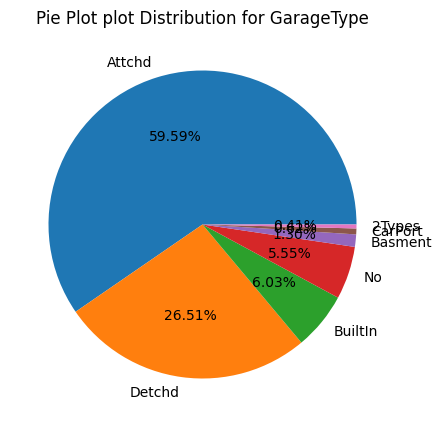

**************************************************
**************************************************
Logs for GarageFinish


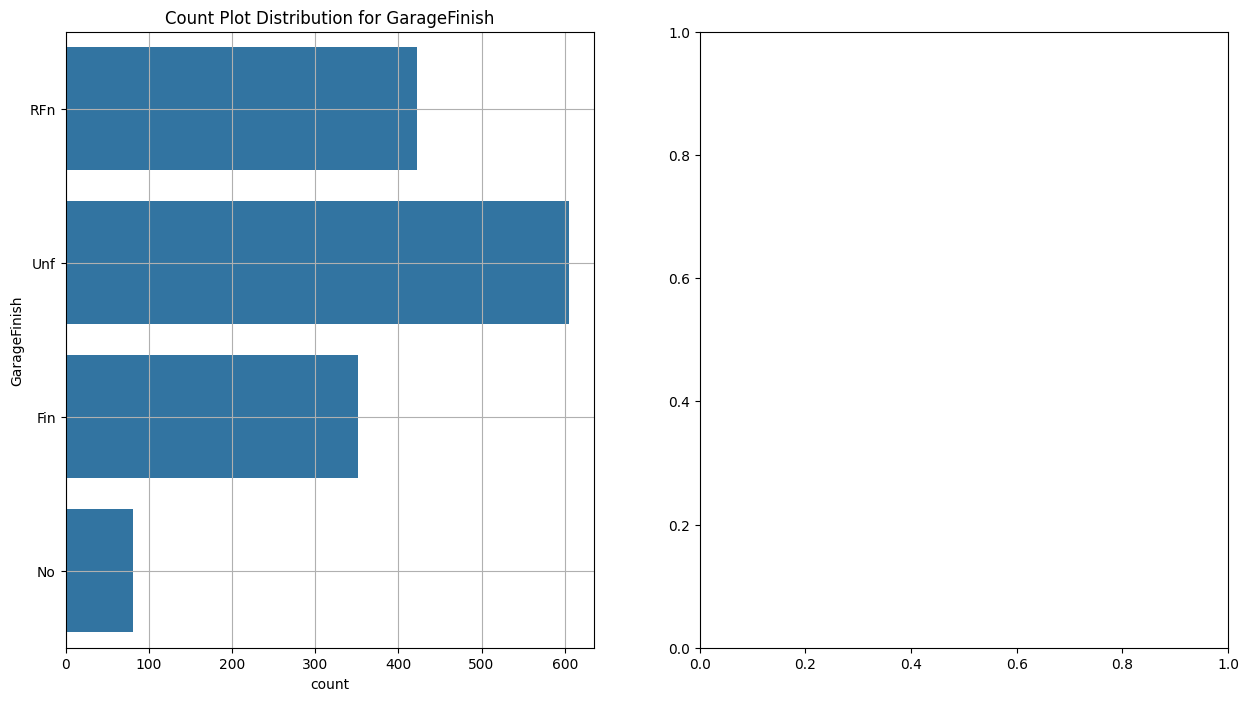

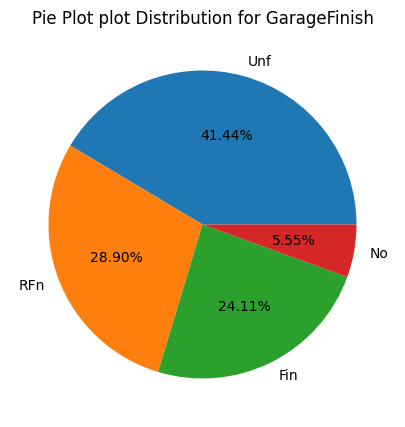

**************************************************
**************************************************
Logs for GarageQual


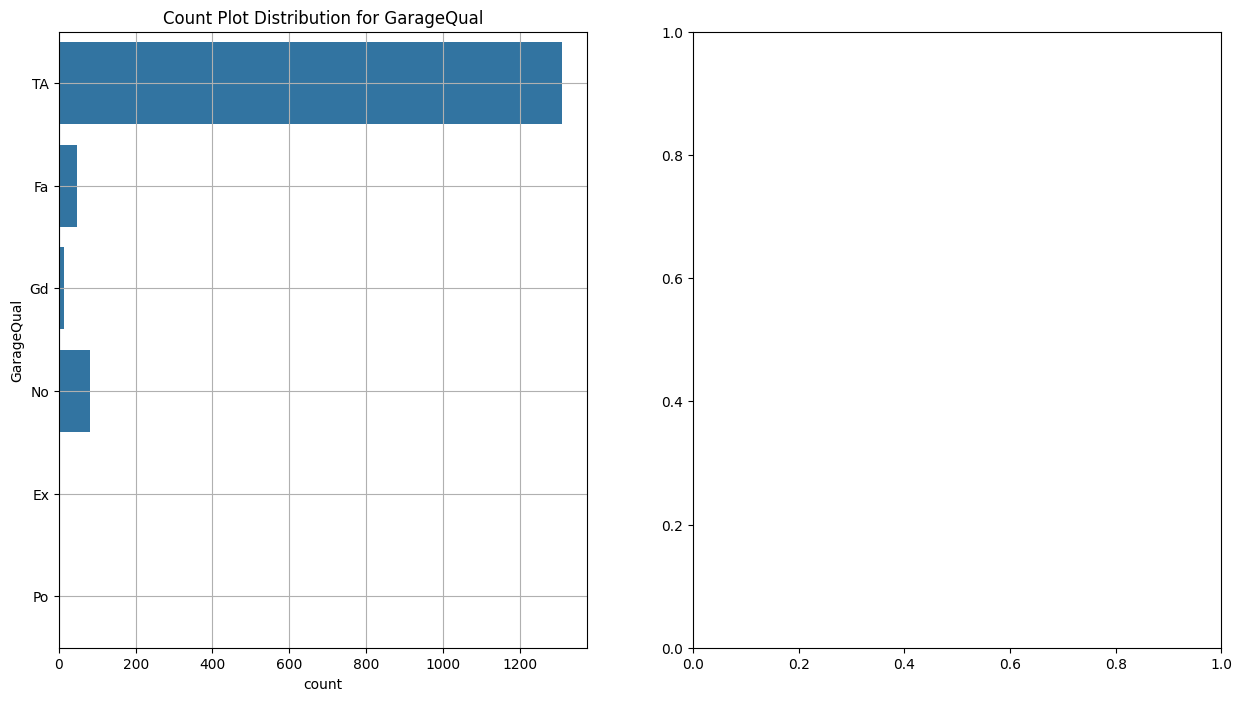

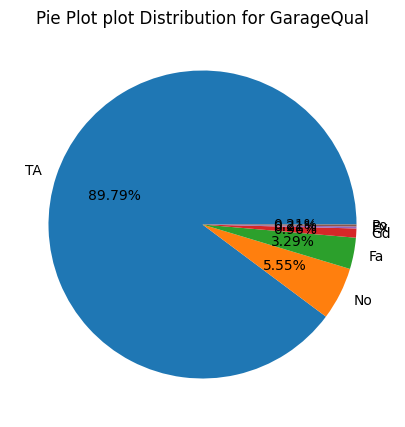

**************************************************
**************************************************
Logs for GarageCond


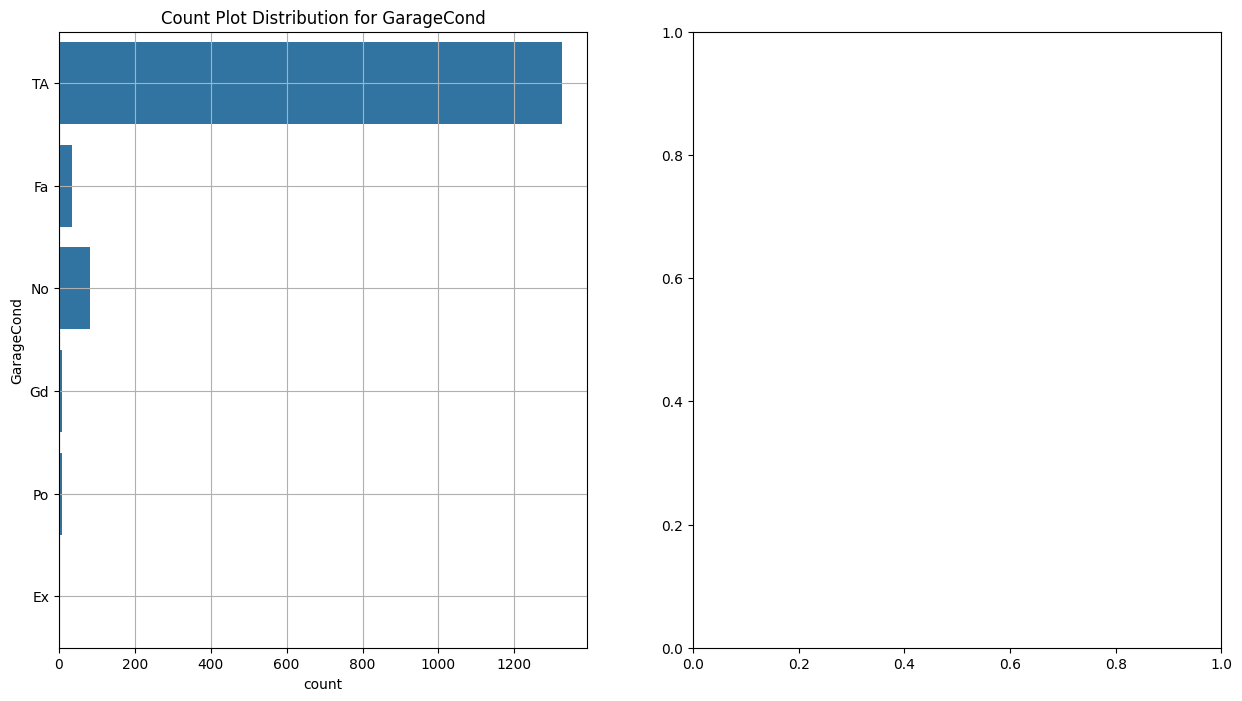

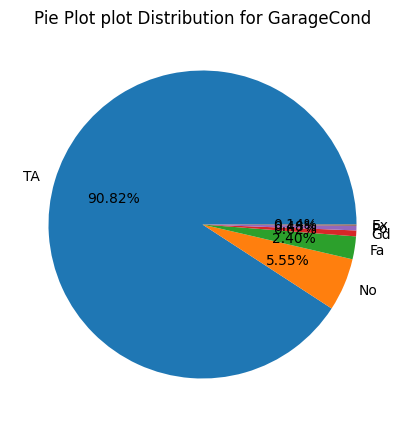

**************************************************
**************************************************
Logs for PavedDrive


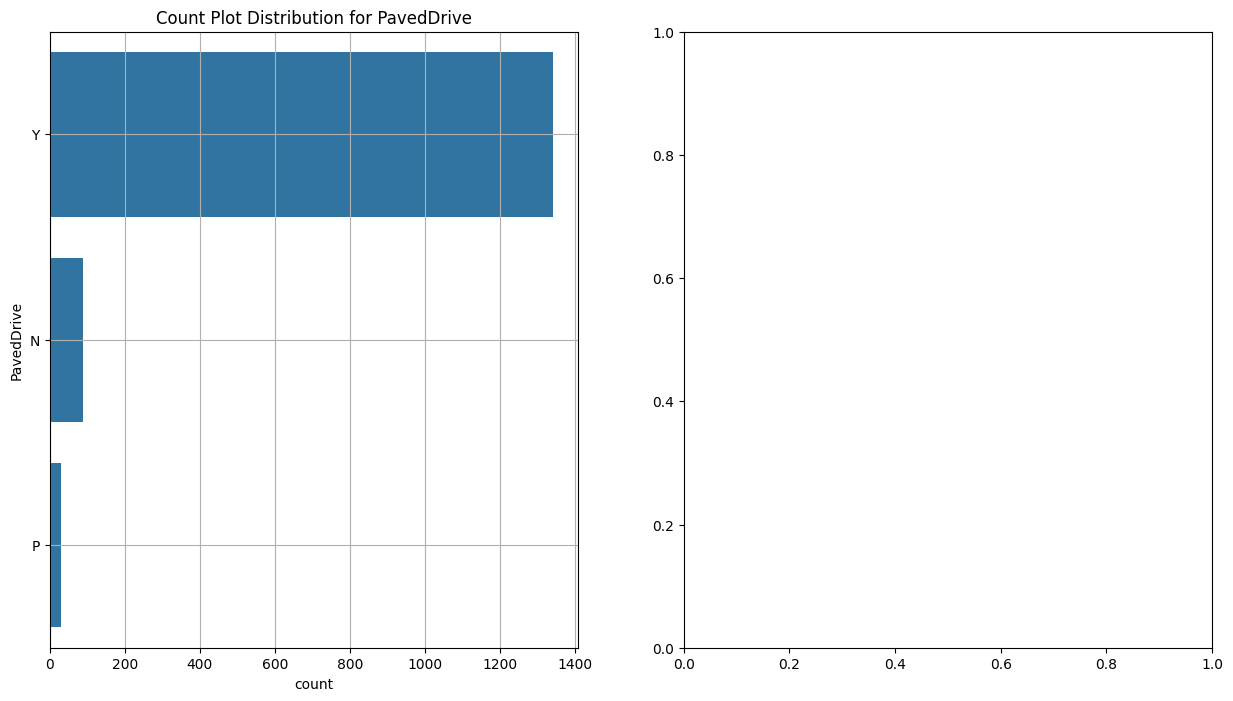

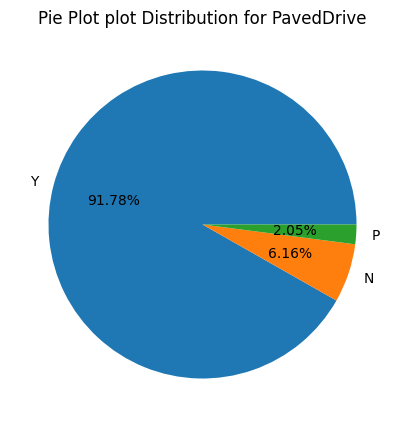

**************************************************
**************************************************
Logs for PoolQC


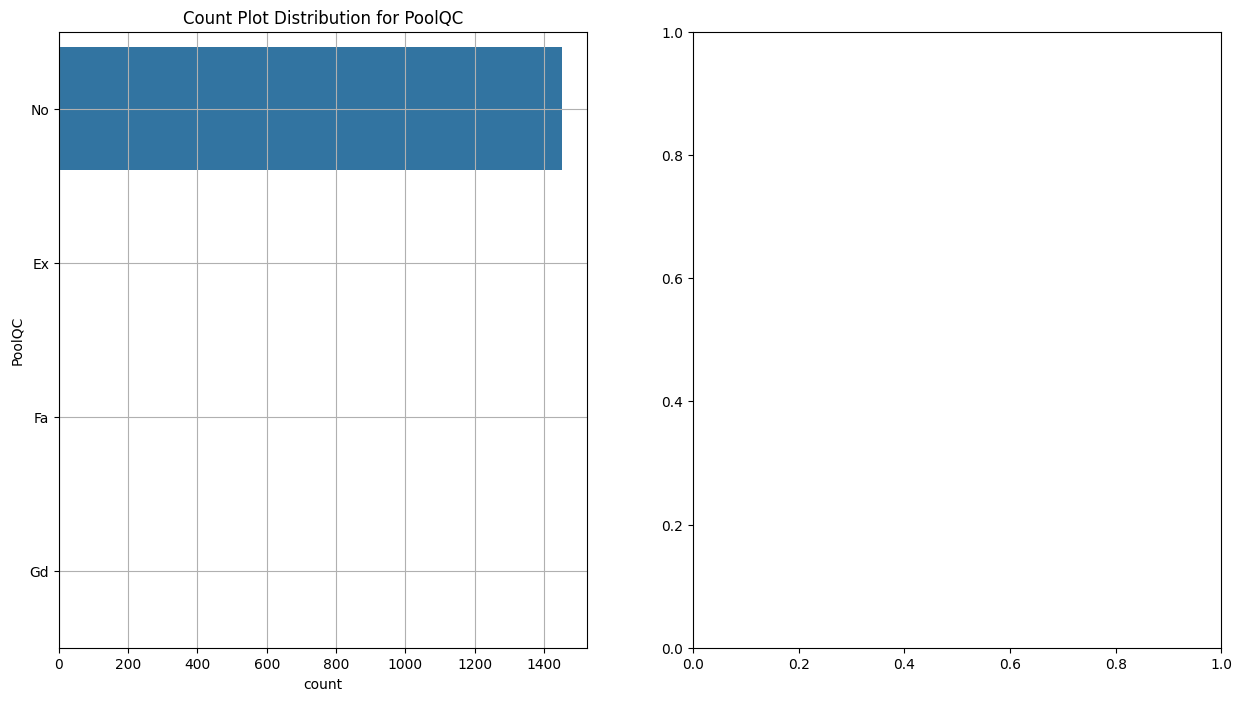

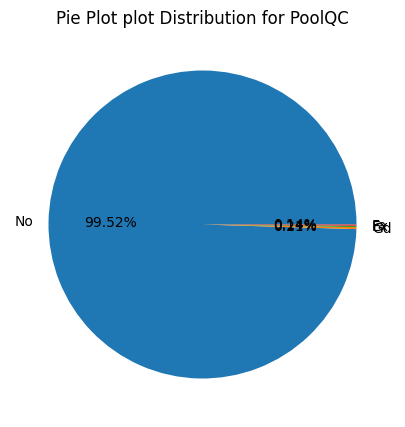

**************************************************
**************************************************
Logs for Fence


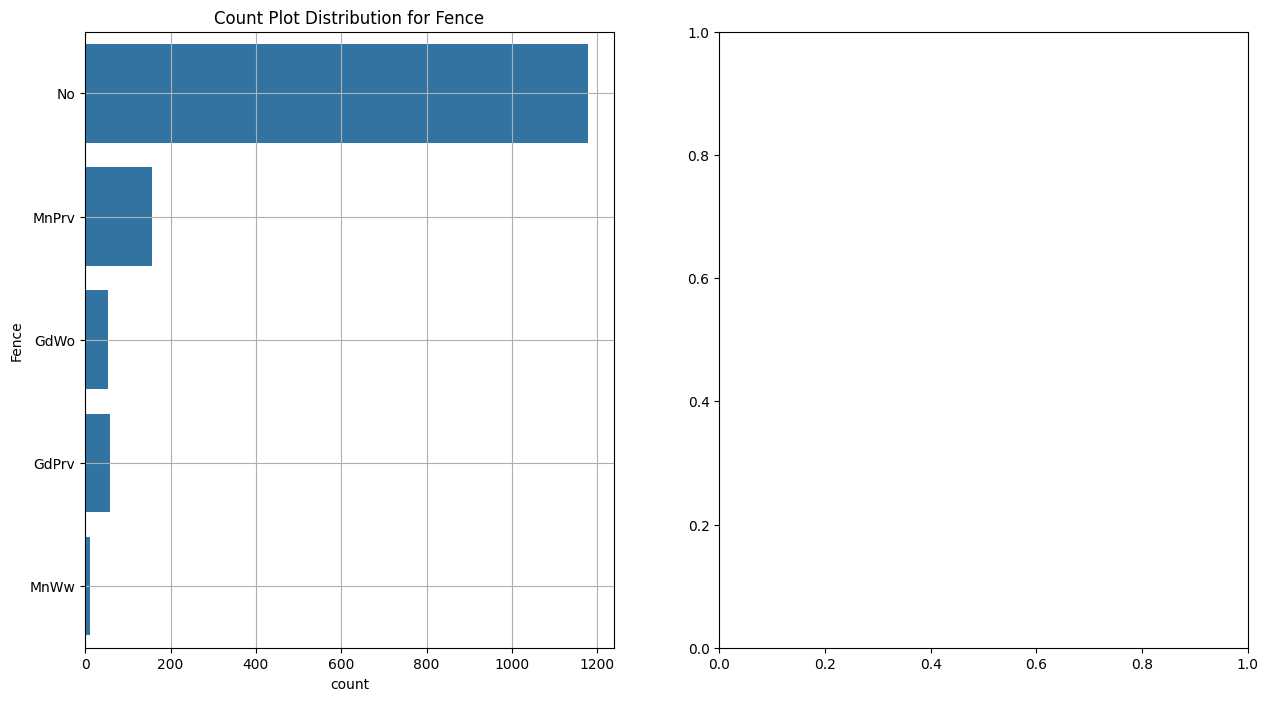

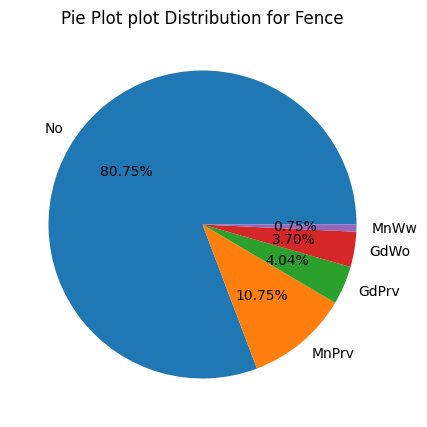

**************************************************
**************************************************
Logs for MiscFeature


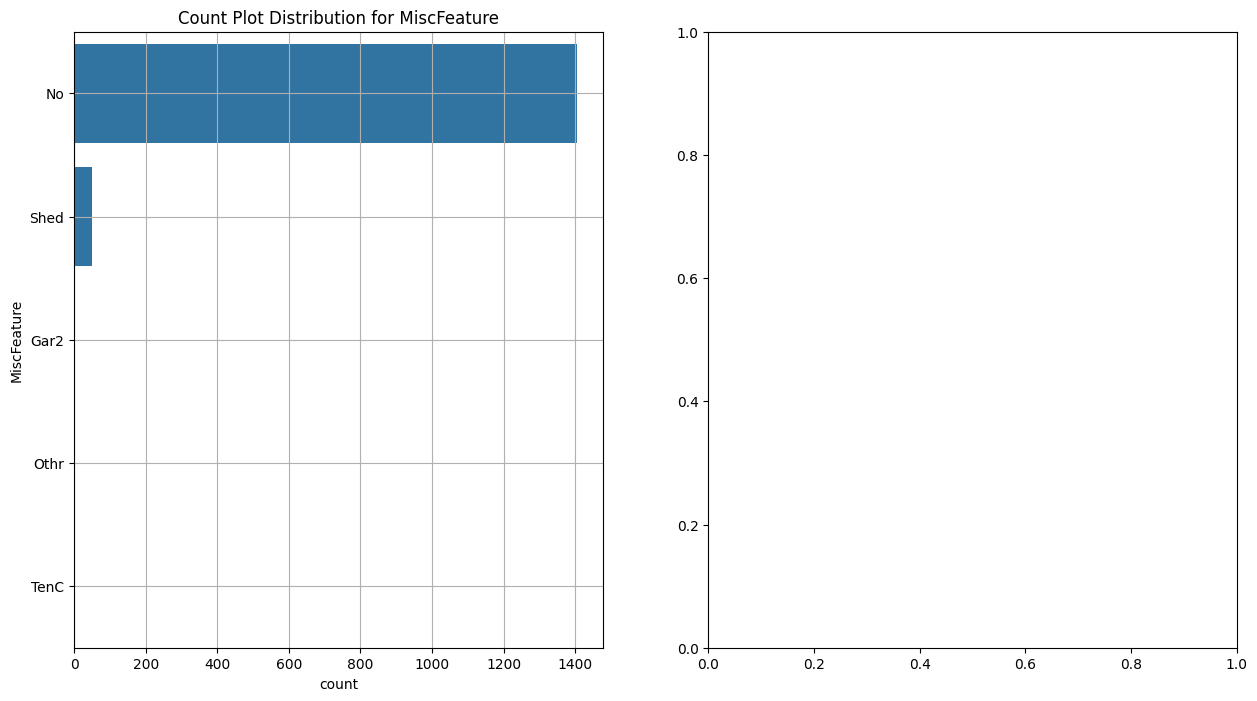

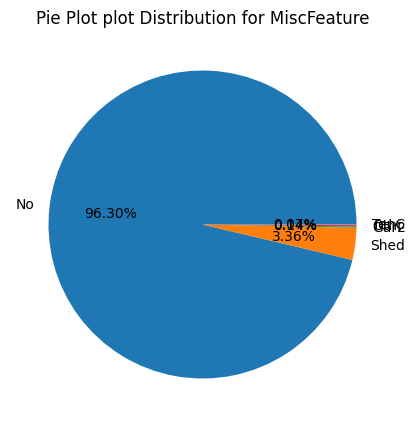

**************************************************
**************************************************
Logs for MoSold


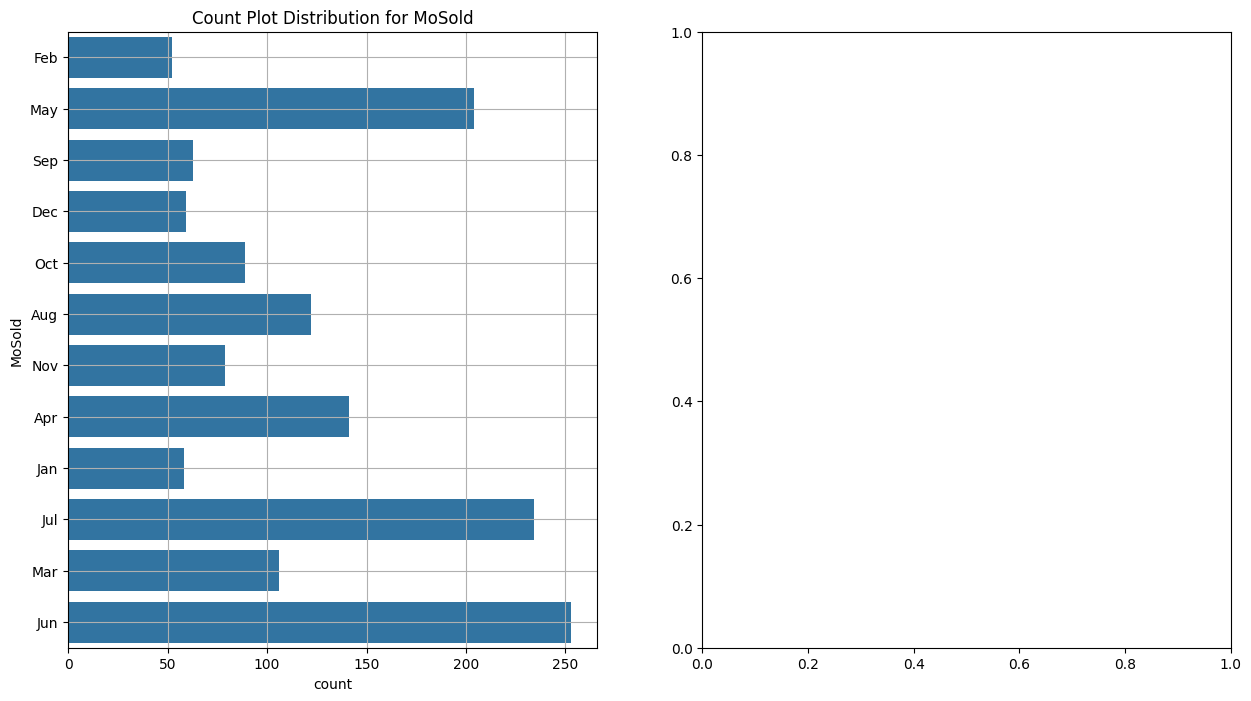

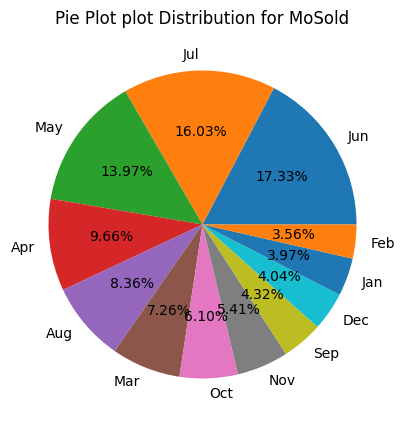

**************************************************
**************************************************
Logs for SaleType


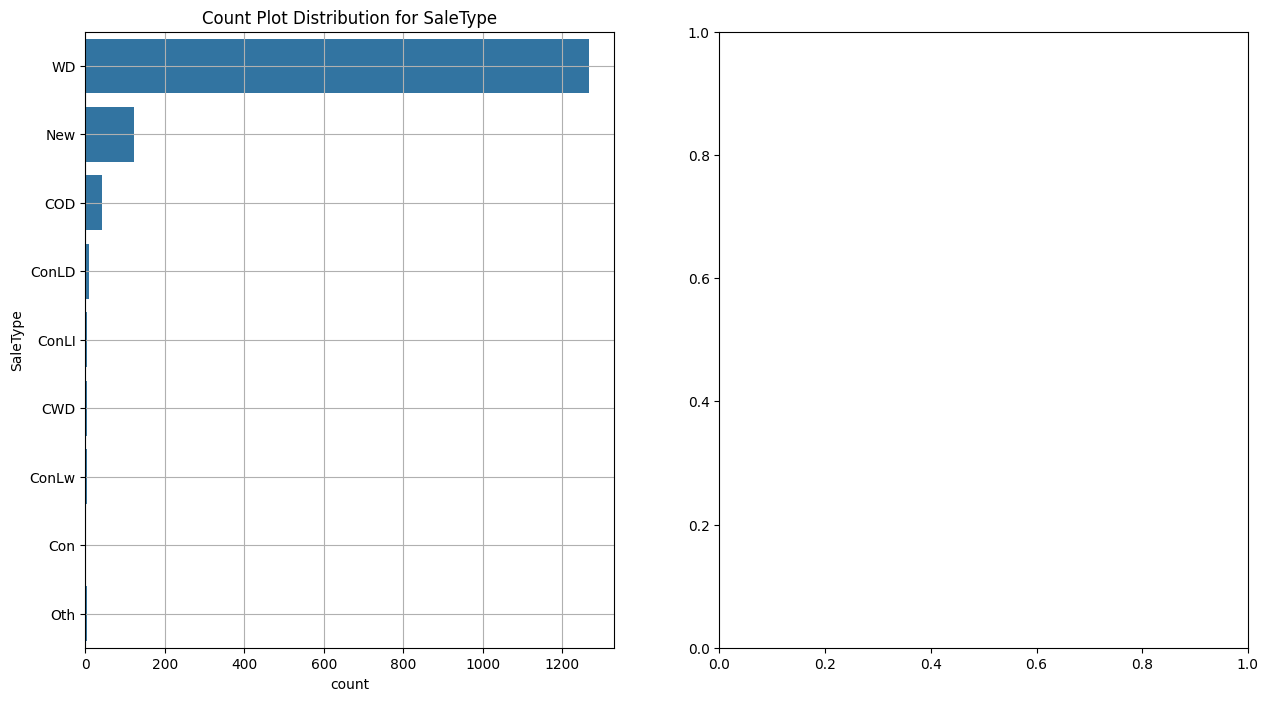

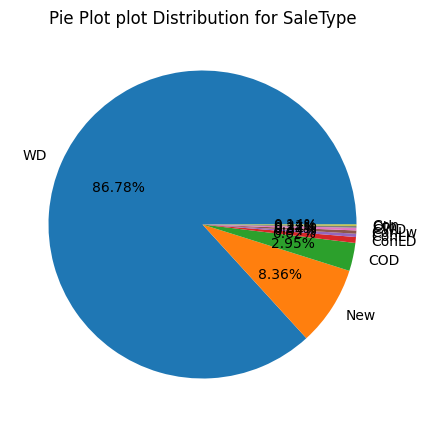

**************************************************
**************************************************
Logs for SaleCondition


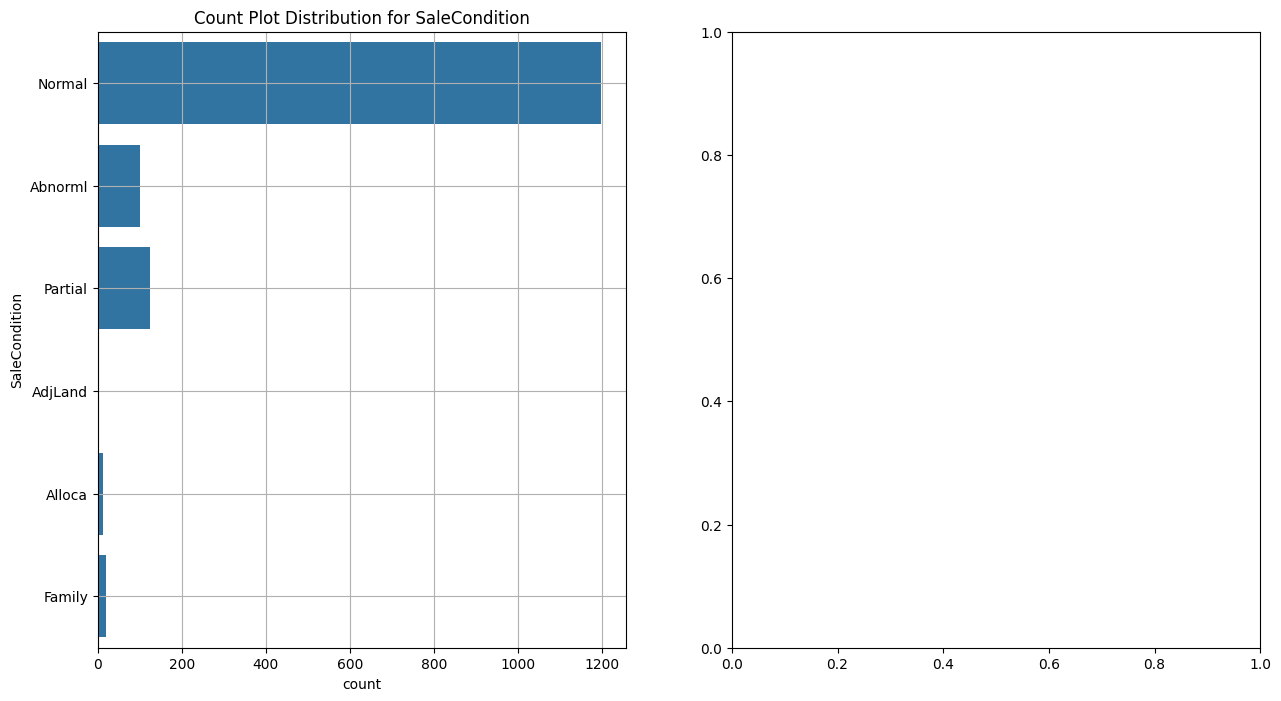

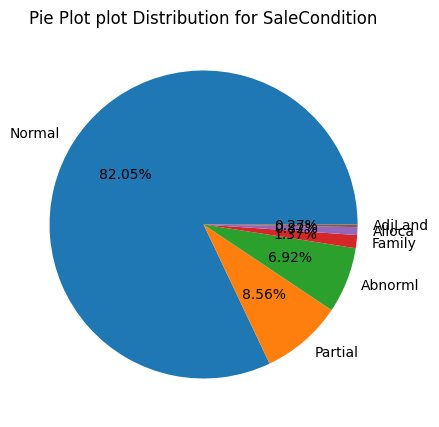

**************************************************


In [ ]:
for col in categorical_list:
    print("*"*50)
    print(f"Logs for {col}")
    plt.figure(figsize= [15,8])
    plt.subplot(1,2,1)
    sns.countplot(data= df, y =col)
    plt.grid()
    plt.title(f"Count Plot Distribution for {col}")
    plt.subplot(1,2,2)
    index = df[col].value_counts().index
    values = df[col].value_counts().values
    plt.figure(figsize= [20,5])
    plt.pie(x=values,labels=index, autopct='%1.2f%%')
    # plt.pie(df[col], color='darkblue')
    plt.grid()
    plt.title(f"Pie Plot plot Distribution for {col}")
    plt.savefig(f"{col}_univariate_analysis.PNG")
    plt.show()
    print("*"*50)

In [ ]:
df["SaleType"]

0       WD
1       WD
2       WD
3       WD
4       WD
        ..
1455    WD
1456    WD
1457    WD
1458    WD
1459    WD
Name: SaleType, Length: 1460, dtype: object

**Multivariate analysis to understand the correlations and dependencies between various features.**

In [8]:
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('O')]

In [9]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

Unnamed: 0  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0           0           65     8450            7            5       2003   
1           1           80     9600            6            8       1976   
2           2           68    11250            7            5       2001   
3           3           60     9550            7            5       1915   
4           4           84    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  GarageArea  \
0          2003         196         706           0  ...         548   
1          1976           0         978           0  ...         460   
2          2002         162         486           0  ...         608   
3          1970           0         216           0  ...         642   
4          2000         350         655           0  ...         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61              0          0            0         0   
1         298            0              0          0            0         0   
2           0           42              0          0            0         0   
3           0           35            272          0            0         0   
4         192           84              0          0            0         0   

   MiscVal  YrSold  SalePrice  
0        0    2008     208500  
1        0    2007     181500  
2        0    2008     223500  
3        0    2006     140000  
4        0    2008     250000  

[5 rows x 36 columns]

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

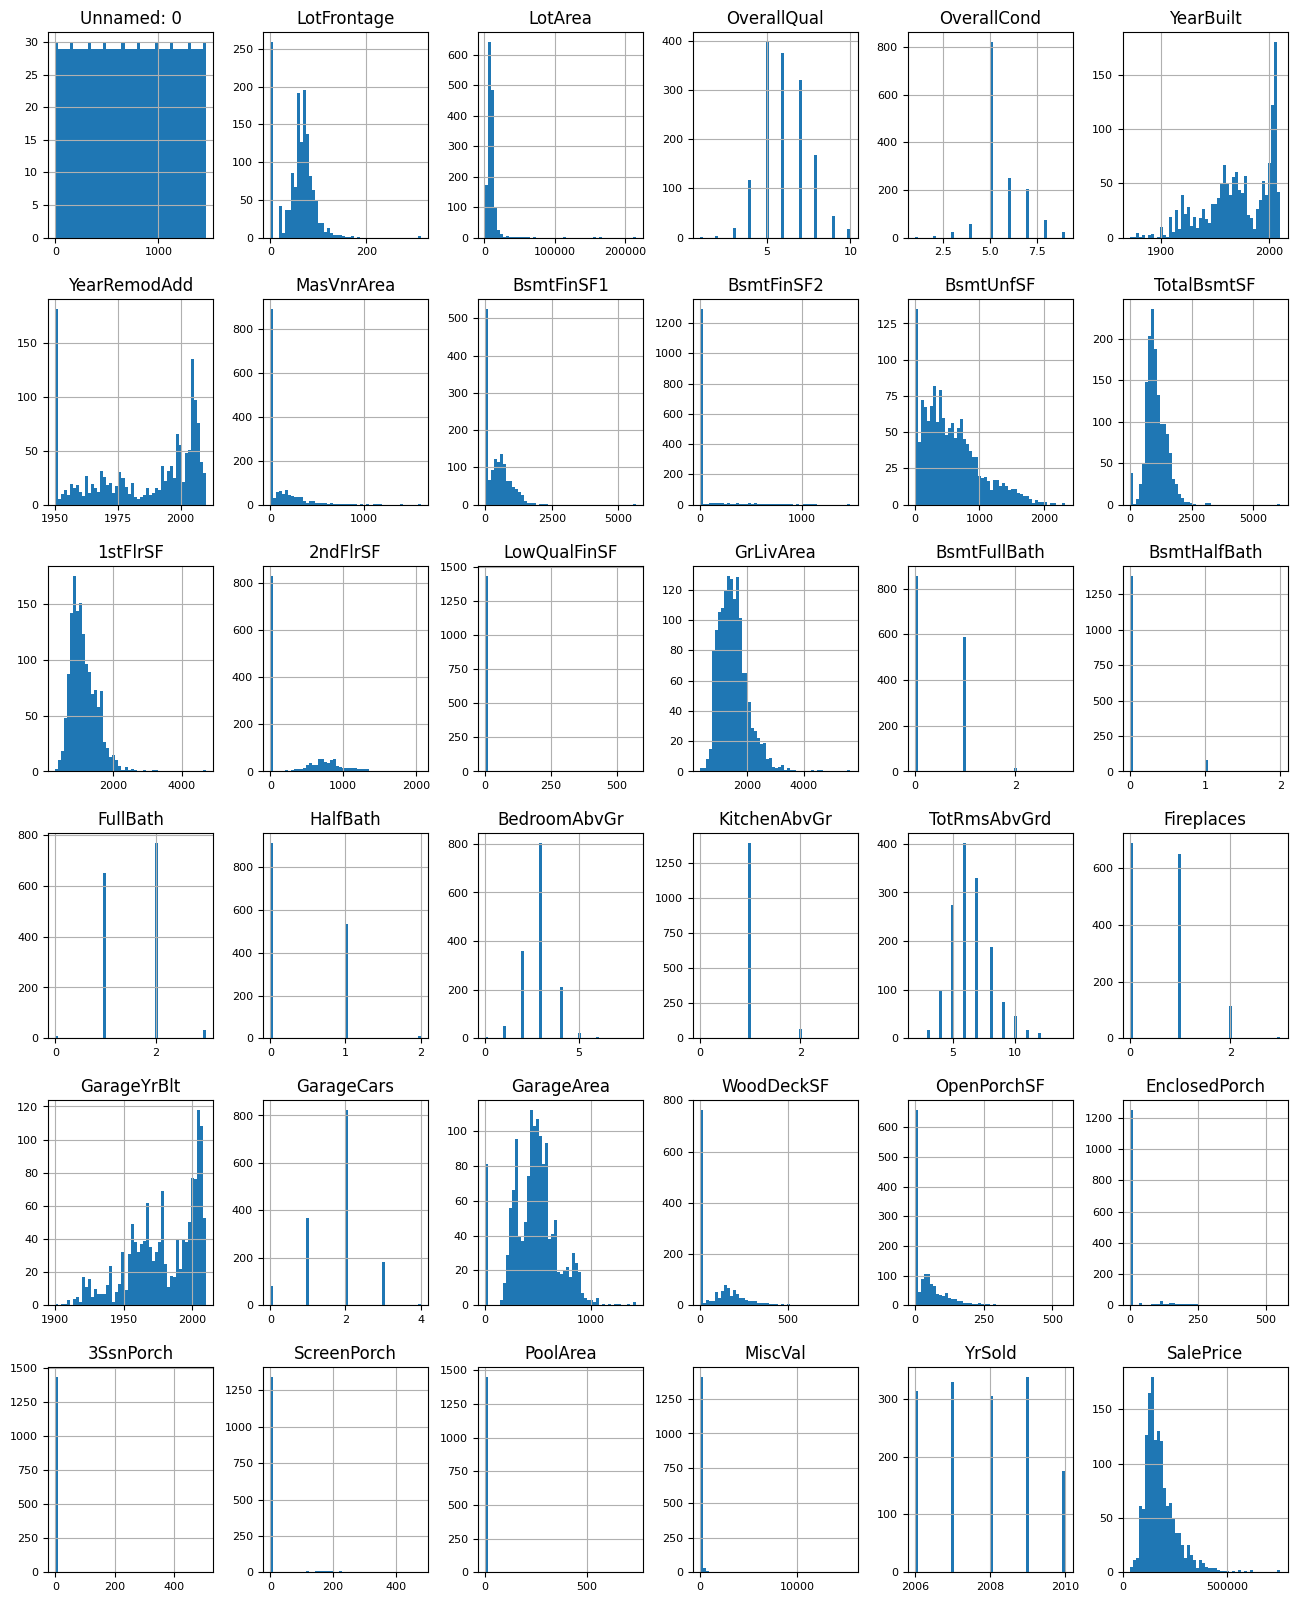

In [10]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

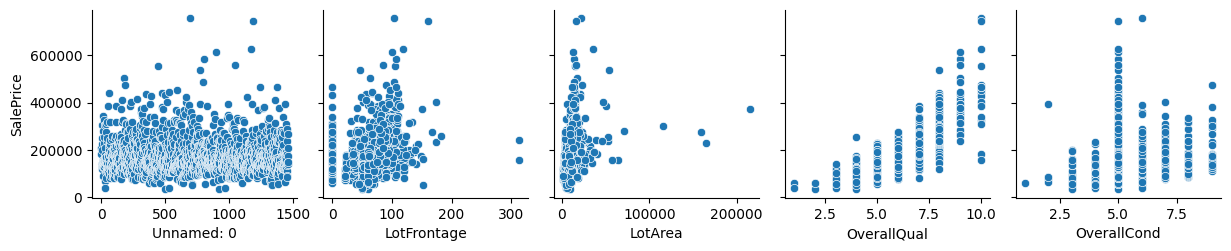

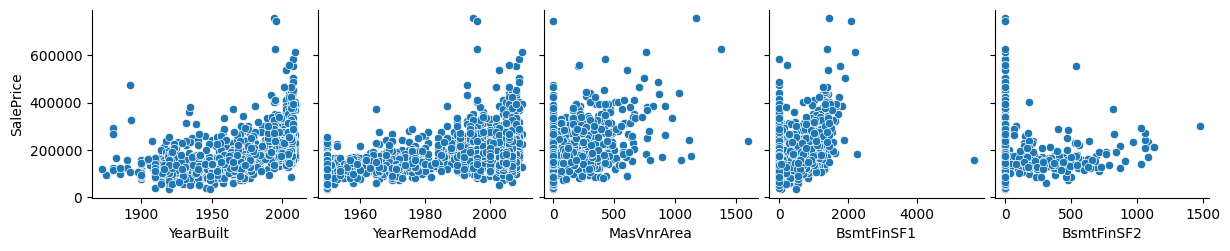

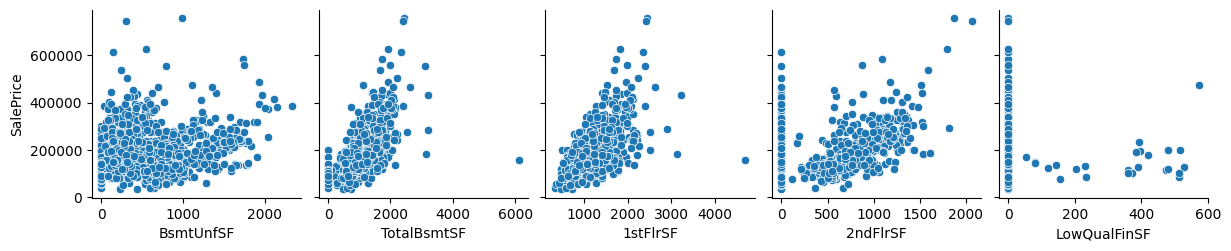

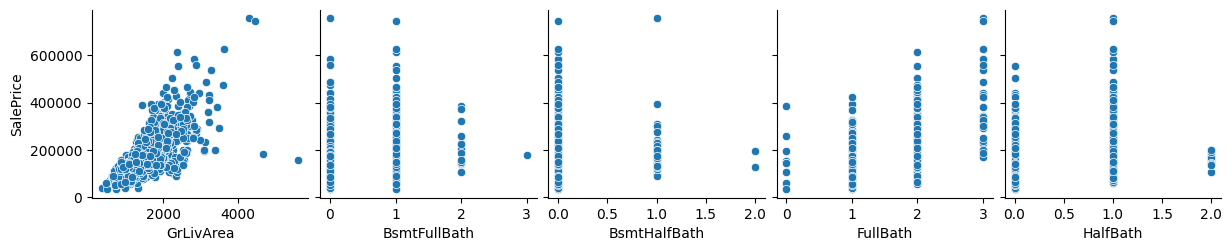

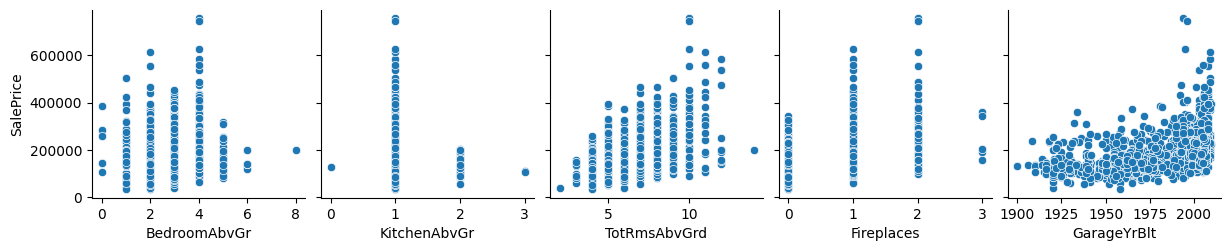

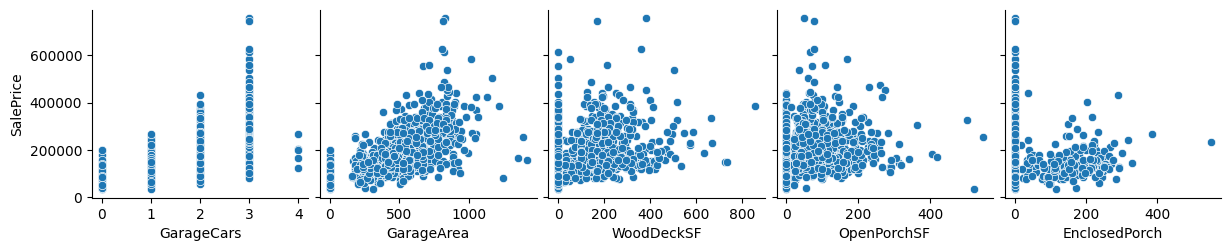

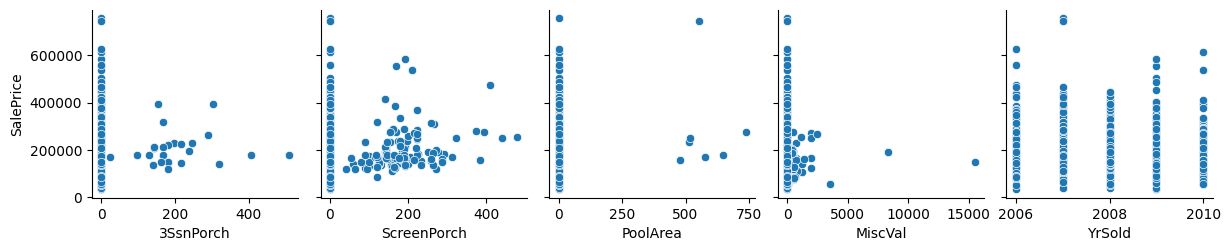

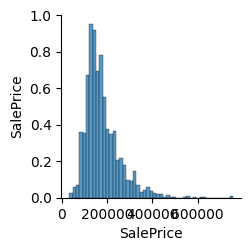

In [11]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['SalePrice'])

Removing 0 values and repeat the process of finding correlated values:

In [12]:
import operator

individual_features_df = []
for i in range(0, len(df_num.columns) - 1): # -1 because the last column is SalePrice
    tmpDf = df_num[[df_num.columns[i], 'SalePrice']]
    tmpDf = tmpDf[tmpDf[df_num.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['SalePrice'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

   KitchenAbvGr: -0.1392006921778576
       HalfBath: -0.08439171127179902
    OverallCond: -0.07785589404867797
         YrSold: -0.028922585168736813
   BsmtHalfBath: -0.02883456718548182
     Unnamed: 0: -0.021527739154237214
       PoolArea: -0.014091521506356765
   BsmtFullBath: 0.011439163340408606
      3SsnPorch: 0.06393243256889088
    OpenPorchSF: 0.08645298857147718
        MiscVal: 0.08896338917298921
     Fireplaces: 0.12166058421363891
      BsmtUnfSF: 0.16926100049514173
   BedroomAbvGr: 0.18093669310848806
     WoodDeckSF: 0.1937060123752066
     BsmtFinSF2: 0.19895609430836594
  EnclosedPorch: 0.24127883630117497
    ScreenPorch: 0.2554300795487841
        LotArea: 0.2638433538714051
   LowQualFinSF: 0.30007501655501323
    LotFrontage: 0.35179909657067737
     MasVnrArea: 0.43409021975689227
     BsmtFinSF1: 0.47169042652357296
    GarageYrBlt: 0.4863616774878596
   YearRemodAdd: 0.5071009671113866
      YearBuilt: 0.5228973328794967
   TotRmsAbvGrd: 0.533723155582028

C:\Users\asus\AppData\Local\Temp\ipykernel_11620\2680390793.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  all_correlations = {feature.columns[0]: feature.corr()['SalePrice'][0] for feature in individual_features_df}


In [13]:
features_list = [key for key, value in all_correlations if abs(value) >= 0.5]
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(features_list), features_list))

There is 11 strongly correlated values with SalePrice:
['YearRemodAdd', 'YearBuilt', 'TotRmsAbvGrd', 'FullBath', '1stFlrSF', 'GarageArea', 'TotalBsmtSF', 'GarageCars', '2ndFlrSF', 'GrLivArea', 'OverallQual']


# **Conclusion :**
 We've identified predictors highly correlated with SalePrice. In our upcoming feature engineering phase, we plan to introduce dummy variables. These binary values will indicate the presence (1) or absence (0) of certain features. For instance, considering 2ndFlrSF, we'll create a dummy variable representing its presence or absence and aggregate it with 1stFlrSF. This approach aims to enhance our predictive model by capturing nuanced relationships within the dataset.


 Upon examining the correlation between numerical values, we identified 11 features strongly associated with house prices. However, beyond correlation, no discernible patterns were observed in the data that pertained to features without notable correlation.

## **Feature Engineering and Size Impact:**

<Axes: >

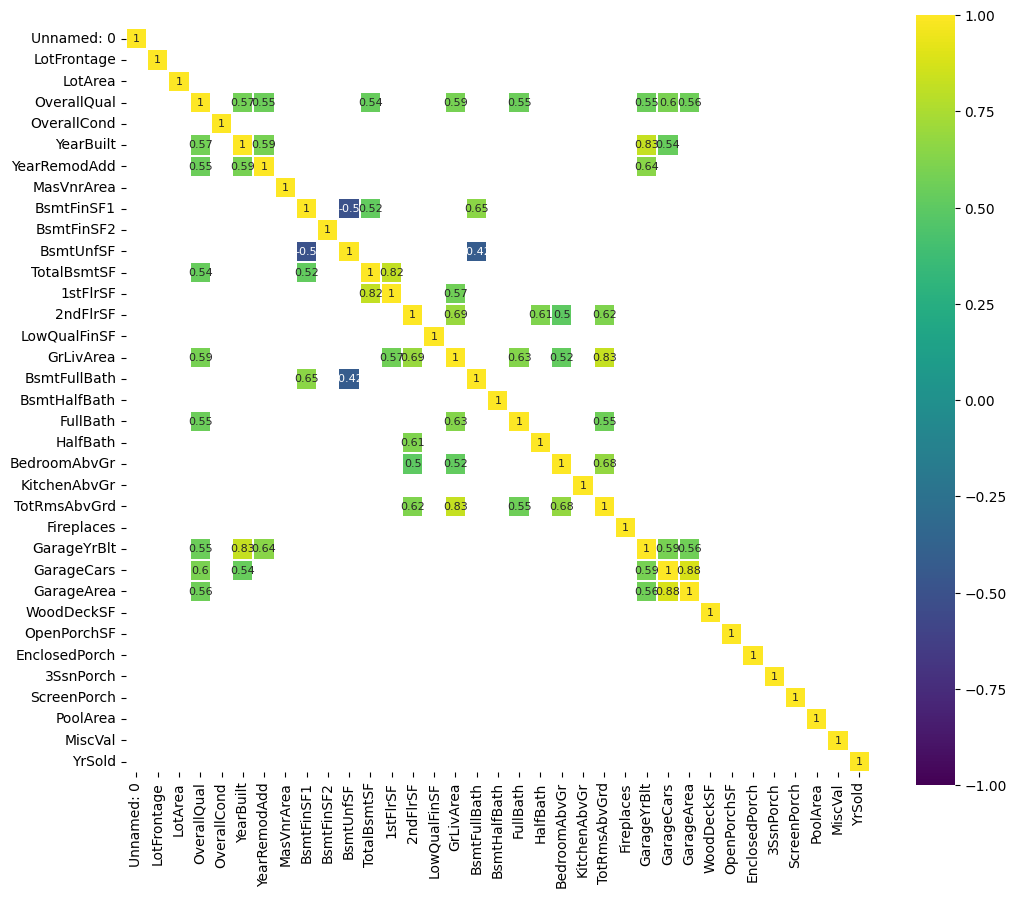

In [14]:
corr = df_num.drop('SalePrice', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

**Conclusion:**
 
 In essence, our analysis suggests that certain features could be consolidated to reduce redundancy, such as combining 1stFlrSF and TotalBsmtSF, or merging GarageCars and GarageArea. Additionally, it appears that certain features indicate an expectation among individuals that multiple attributes are packaged together in a cohesive manner.

In [15]:
quantitative_features_list = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
    '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']
df_quantitative_values = df[quantitative_features_list]
df_quantitative_values.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  \
0           65     8450         196         706           0          856   
1           80     9600           0         978           0         1262   
2           68    11250         162         486           0          920   
3           60     9550           0         216           0          756   
4           84    14260         350         655           0         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  ...  GarageCars  GarageArea  \
0       856       854             0       1710  ...           2         548   
1      1262         0             0       1262  ...           2         460   
2       920       866             0       1786  ...           2         608   
3       961       756             0       1717  ...           3         642   
4      1145      1053             0       2198  ...           3         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61              0          0            0         0   
1         298            0              0          0            0         0   
2           0           42              0          0            0         0   
3           0           35            272          0            0         0   
4         192           84              0          0            0         0   

   MiscVal  SalePrice  
0        0     208500  
1        0     181500  
2        0     223500  
3        0     140000  
4        0     250000  

[5 rows x 28 columns]

In [16]:
#features to analyse
features_to_analyse = [x for x in quantitative_features_list if x in features_list]
features_to_analyse.append('SalePrice')
features_to_analyse

['TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

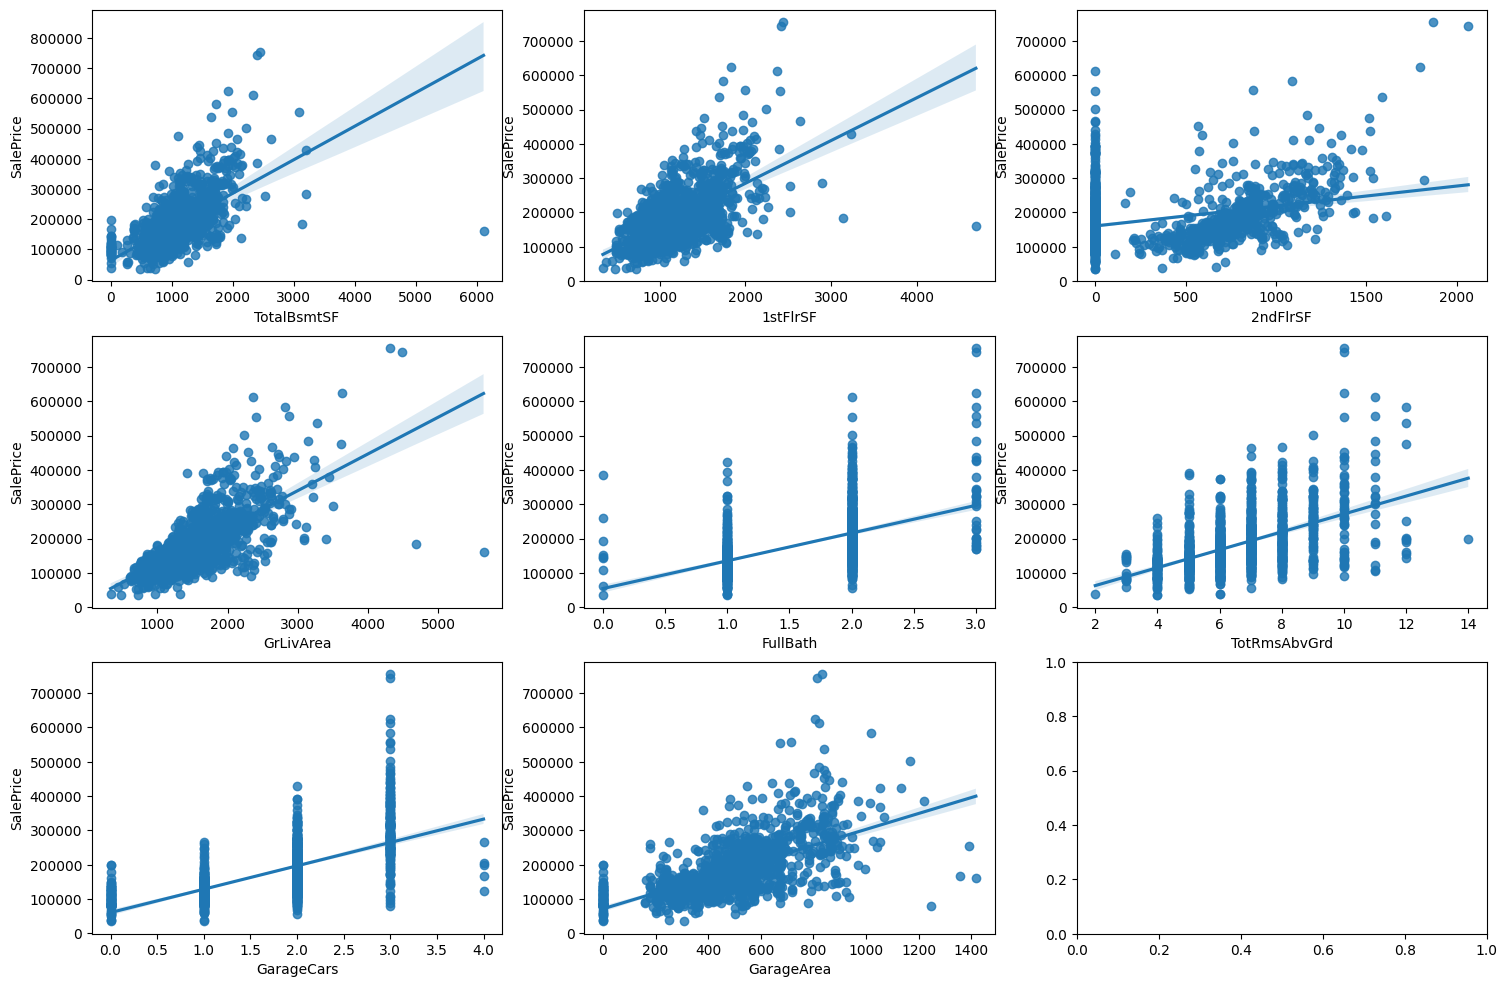

In [17]:
#Distribution 
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='SalePrice', data=df[features_to_analyse], ax=ax)

In [18]:
categorical_features = [a for a in quantitative_features_list[:-1] + df.columns.tolist() if (a not in quantitative_features_list[:-1]) or (a not in df.columns.tolist())]
df_categ = df[categorical_features]
df_categ.head()

Unnamed: 0 MSSubClass MSZoning Street Alley LotShape LandContour Utilities  \
0           0       SC60       RL   Pave   NaN      Reg         Lvl    AllPub   
1           1       SC20       RL   Pave   NaN      Reg         Lvl    AllPub   
2           2       SC60       RL   Pave   NaN      IR1         Lvl    AllPub   
3           3       SC70       RL   Pave   NaN      IR1         Lvl    AllPub   
4           4       SC60       RL   Pave   NaN      IR1         Lvl    AllPub   

  LotConfig LandSlope  ... GarageCond PavedDrive PoolQC Fence MiscFeature  \
0    Inside       Gtl  ...         TA          Y     No    No          No   
1       FR2       Gtl  ...         TA          Y     No    No          No   
2    Inside       Gtl  ...         TA          Y     No    No          No   
3    Corner       Gtl  ...         TA          Y     No    No          No   
4       FR2       Gtl  ...         TA          Y     No    No          No   

   MoSold  YrSold  SaleType  SaleCondition SalePrice  
0     Feb    2008        WD         Normal    208500  
1     May    2007        WD         Normal    181500  
2     Sep    2008        WD         Normal    223500  
3     Feb    2006        WD        Abnorml    140000  
4     Dec    2008        WD         Normal    250000  

[5 rows x 54 columns]

In [19]:
df_not_num = df_categ.select_dtypes(include = ['O'])
print('There is {} non numerical features including:\n{}'.format(len(df_not_num.columns), df_not_num.columns.tolist()))

There is 45 non numerical features including:
['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition']


([0, 1, 2, 3],
 [Text(0, 0, 'No'), Text(1, 0, 'Gd'), Text(2, 0, 'Mn'), Text(3, 0, 'Av')])

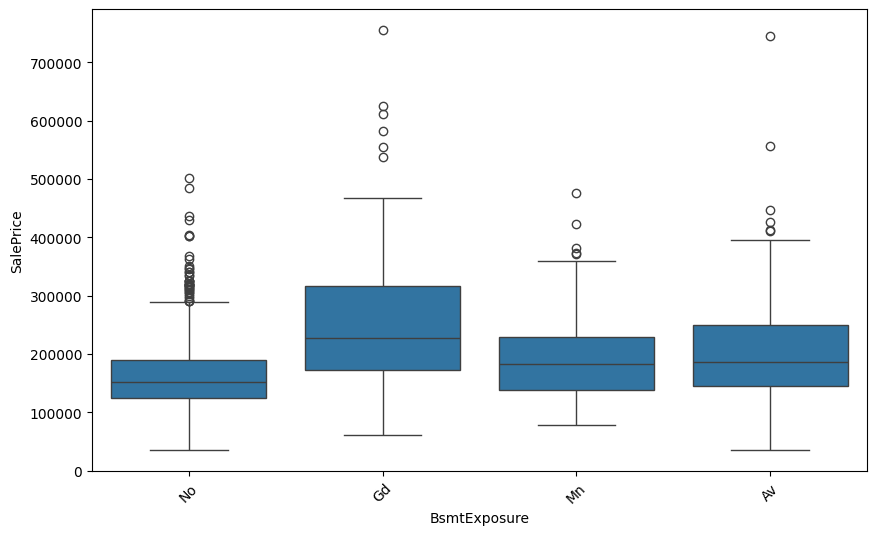

In [20]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='BsmtExposure', y='SalePrice', data=df_categ)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Normal'),
  Text(1, 0, 'Abnorml'),
  Text(2, 0, 'Partial'),
  Text(3, 0, 'AdjLand'),
  Text(4, 0, 'Alloca'),
  Text(5, 0, 'Family')])

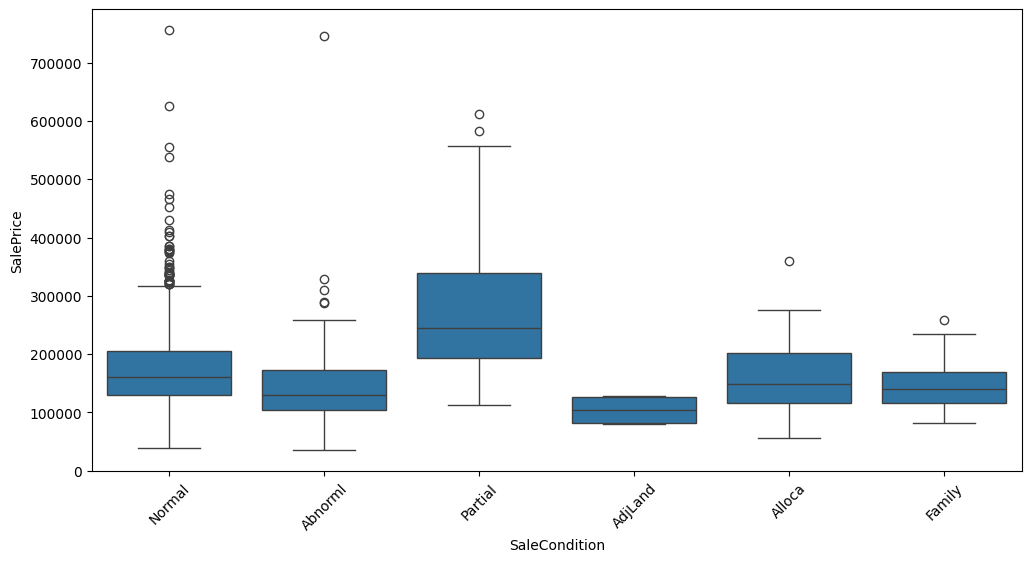

In [21]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='SaleCondition', y='SalePrice', data=df_categ)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

C:\Users\asus\AppData\Local\Temp\ipykernel_11620\650302845.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
C:\Users\asus\AppData\Local\Temp\ipykernel_11620\650302845.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
C:\Users\asus\AppData\Local\Temp\ipykernel_11620\650302845.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
C:\Users\asus\AppData\Local\Temp\ipykernel_11620\650302845.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.xaxis.

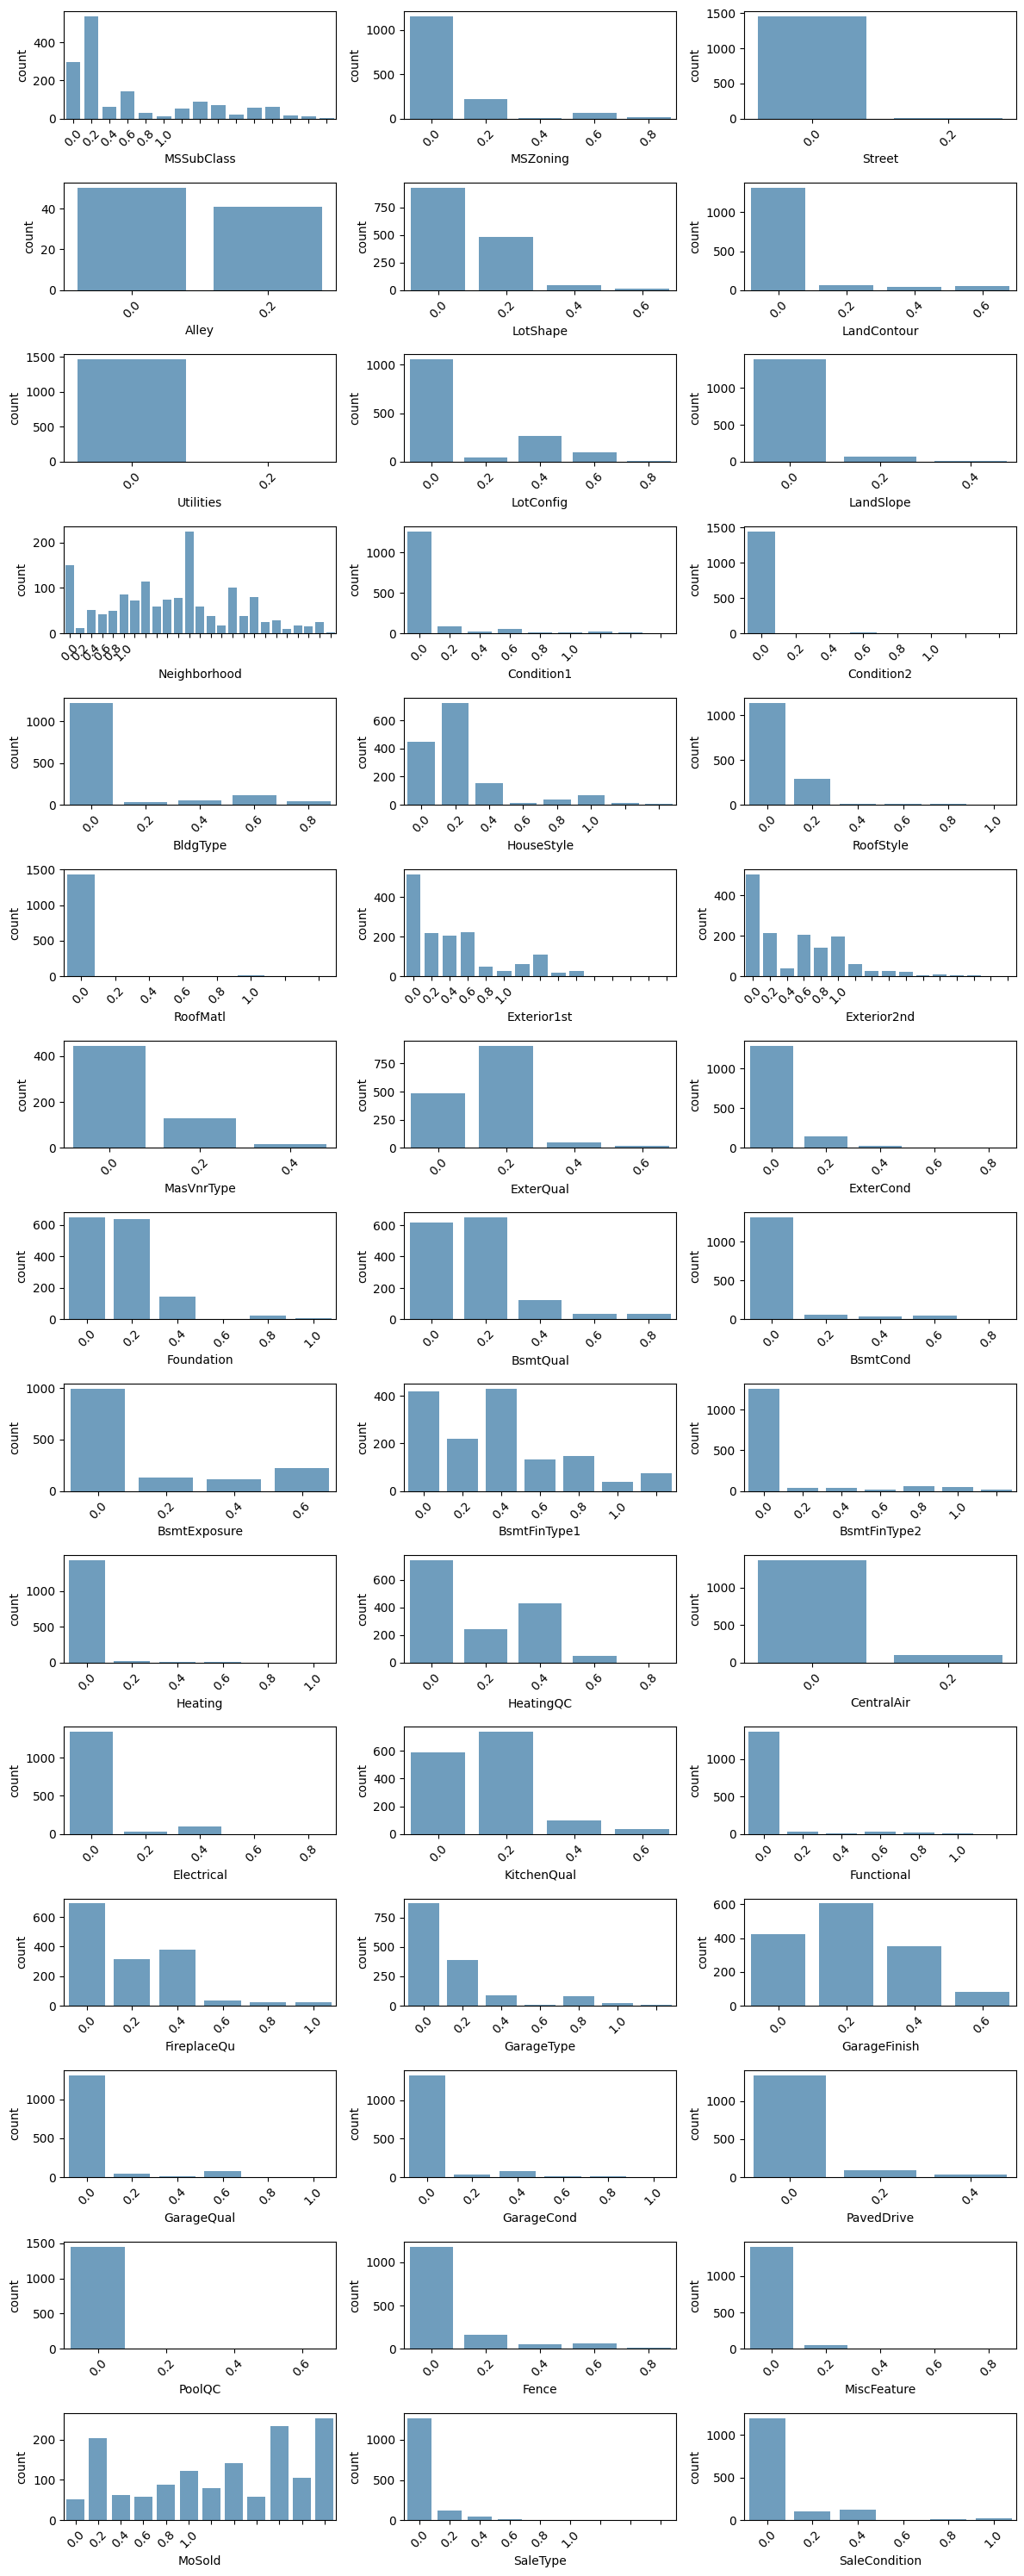

In [22]:
fig, axes = plt.subplots(round(len(df_not_num.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_not_num.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_not_num.columns[i], alpha=0.7, data=df_not_num, ax=ax)

fig.tight_layout()

In [43]:
df.to_csv("modified-data.csv", index= False)

## **Geospatial Analysis**

In [53]:

# Group by neighborhood and calculate average prices
neighborhood_stats = df.groupby('Neighborhood')['SalePrice'].mean().reset_index()

# Display the aggregated statistics
print(neighborhood_stats)

   Neighborhood      SalePrice
0       Blmngtn  194870.882353
1       Blueste  137500.000000
2        BrDale  104493.750000
3       BrkSide  124834.051724
4       ClearCr  212565.428571
5       CollgCr  197965.773333
6       Crawfor  210624.725490
7       Edwards  128219.700000
8       Gilbert  192854.506329
9        IDOTRR  100123.783784
10      MeadowV   98576.470588
11      Mitchel  156270.122449
12        NAmes  145847.080000
13      NPkVill  142694.444444
14       NWAmes  189050.068493
15      NoRidge  335295.317073
16      NridgHt  316270.623377
17      OldTown  128225.300885
18        SWISU  142591.360000
19       Sawyer  136793.135135
20      SawyerW  186555.796610
21      Somerst  225379.837209
22      StoneBr  310499.000000
23       Timber  242247.447368
24      Veenker  238772.727273


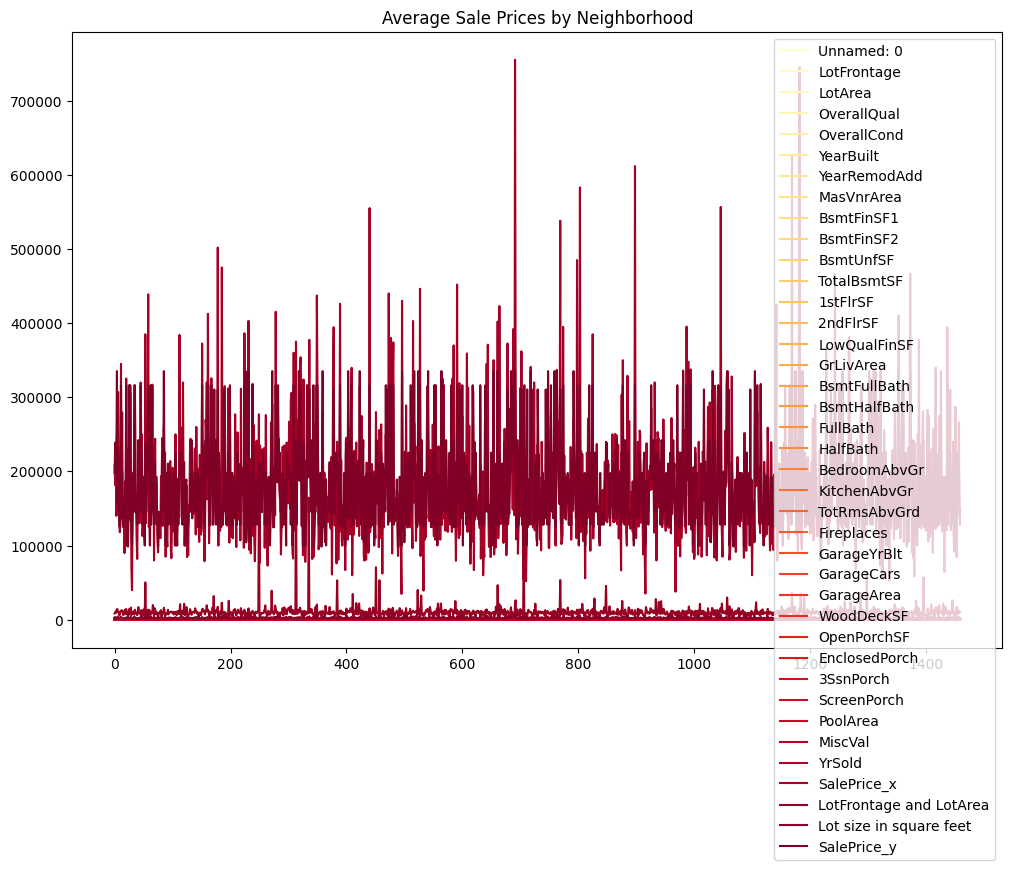

In [69]:

# Merge your neighborhood statistics with the GeoDataFrame
gdf_merged = pd.merge(df, neighborhood_stats, on='Neighborhood', how='left')

# Plot the choropleth map
gdf_merged.plot(column='SalePrice', cmap='YlOrRd', legend=True, figsize=(12, 8))
plt.title('Average Sale Prices by Neighborhood')
plt.show()



Text(0.5, 0, 'Neighborhood')

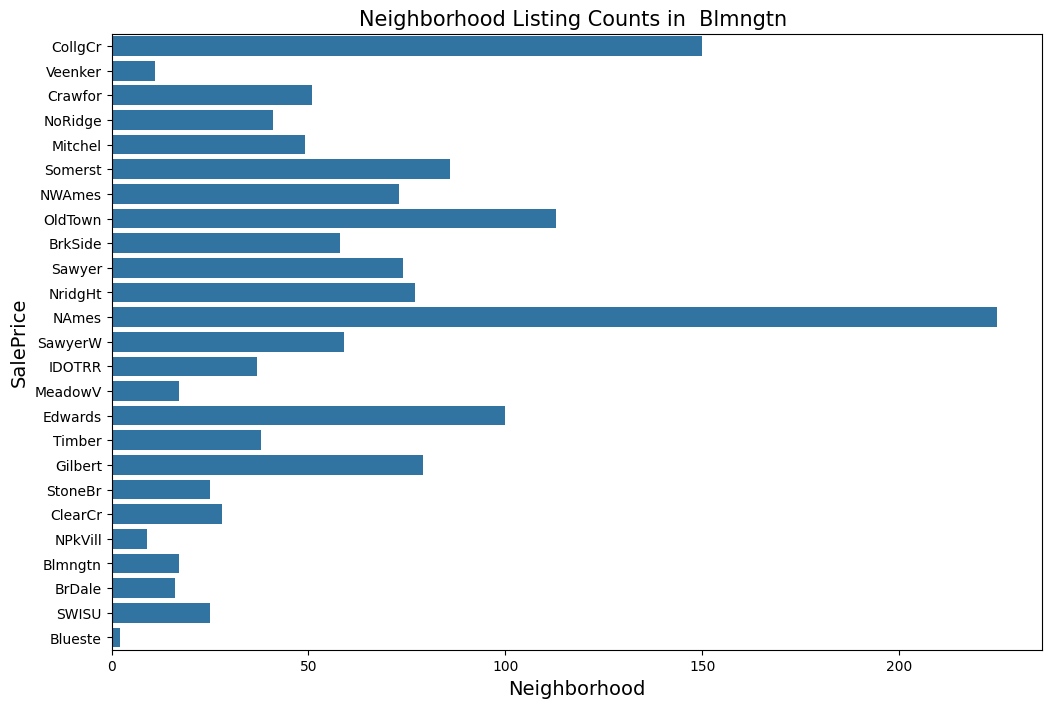

In [74]:
plt.figure(figsize=(12, 8))
plt.ylabel('SalePrice', fontsize=14)
# Create a countplot of the neighbourhood group data
sns.countplot(df['Neighborhood'])

# Set the title of the plot
plt.title('Neighborhood Listing Counts in  Blmngtn ', fontsize=15)

# Set the x-axis label
plt.xlabel('Neighborhood', fontsize=14)

## **Feature Engineering**

In [59]:
df.head()

Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0           0       SC60       RL           65     8450   Pave   NaN      Reg   
1           1       SC20       RL           80     9600   Pave   NaN      Reg   
2           2       SC60       RL           68    11250   Pave   NaN      IR1   
3           3       SC70       RL           60     9550   Pave   NaN      IR1   
4           4       SC60       RL           84    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0     No    No          No       0    Feb   
1         Lvl    AllPub  ...        0     No    No          No       0    May   
2         Lvl    AllPub  ...        0     No    No          No       0    Sep   
3         Lvl    AllPub  ...        0     No    No          No       0    Feb   
4         Lvl    AllPub  ...        0     No    No          No       0    Dec   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [63]:
df['LotFrontage and LotArea'] = df['LotFrontage']+df['LotArea']

In [64]:
df.head()

Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0           0       SC60       RL           65     8450   Pave   NaN      Reg   
1           1       SC20       RL           80     9600   Pave   NaN      Reg   
2           2       SC60       RL           68    11250   Pave   NaN      IR1   
3           3       SC70       RL           60     9550   Pave   NaN      IR1   
4           4       SC60       RL           84    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub  ...     No    No          No       0    Feb   2008   
1         Lvl    AllPub  ...     No    No          No       0    May   2007   
2         Lvl    AllPub  ...     No    No          No       0    Sep   2008   
3         Lvl    AllPub  ...     No    No          No       0    Feb   2006   
4         Lvl    AllPub  ...     No    No          No       0    Dec   2008   

  SaleType  SaleCondition  SalePrice  LotFrontage and LotArea  
0       WD         Normal     208500                     8515  
1       WD         Normal     181500                     9680  
2       WD         Normal     223500                    11318  
3       WD        Abnorml     140000                     9610  
4       WD         Normal     250000                    14344  

[5 rows x 82 columns]

In [66]:
df['Lot size in square feet'] = df['SalePrice']/df['LotFrontage']

In [67]:
df.head()

Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0           0       SC60       RL           65     8450   Pave   NaN      Reg   
1           1       SC20       RL           80     9600   Pave   NaN      Reg   
2           2       SC60       RL           68    11250   Pave   NaN      IR1   
3           3       SC70       RL           60     9550   Pave   NaN      IR1   
4           4       SC60       RL           84    14260   Pave   NaN      IR1   

  LandContour Utilities  ... Fence MiscFeature MiscVal MoSold YrSold SaleType  \
0         Lvl    AllPub  ...    No          No       0    Feb   2008       WD   
1         Lvl    AllPub  ...    No          No       0    May   2007       WD   
2         Lvl    AllPub  ...    No          No       0    Sep   2008       WD   
3         Lvl    AllPub  ...    No          No       0    Feb   2006       WD   
4         Lvl    AllPub  ...    No          No       0    Dec   2008       WD   

  SaleCondition  SalePrice  LotFrontage and LotArea  Lot size in square feet  
0        Normal     208500                     8515              3207.692308  
1        Normal     181500                     9680              2268.750000  
2        Normal     223500                    11318              3286.764706  
3       Abnorml     140000                     9610              2333.333333  
4        Normal     250000                    14344              2976.190476  

[5 rows x 83 columns]